# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

<font color='lightblue'>Los datos que creo que necesitaría para crear un modelo que me permita predecir el precio de una propiedad son los siguientes:
Caracteristicas de la propiedad:</font>
 <font color='lightblue'> 
1. Ubicación de la propiedad (este es uno de los principales factores que determina el precio del metro cuadrado de propiedad).

1. Valor del metro cuadrado según la ubicación de la propiedad.

1. Tipo de propiedad: CASA,PH, DEPARTAMENTO, etc.

1. Si es un DEPARTAMENTO:
  *  En que piso se encuentra.
   
  *  Valor expensas.
1.  Número de habitaciones.
2.  Si la propiedad tiene cochera o no.
  
1.  Número de baños. 
2.  Antiguedad de la propiedad.













---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



**0. Importa las librerías necesarias para trabajar en la consigna.**

In [5]:
import pandas as pd # Importo la a de pandas para poder importar los datos en formato DataFrame
import numpy as np # Importo numpy para operar sobre los datos
import matplotlib.pyplot as plt # Importo esta librería para graficar el comportamiento de los datos, como se relacionan entre ellos y cuales son los features más relevantes
import seaborn as sns #Importo esta librería para graficar el comportamiento de los datos, como se relacionan entre ellos y cuales son los features más relevantes

from sklearn.tree import DecisionTreeClassifier ##Impoto esta clase capaz de realizar una clasificación de varias clases en un conjunto de datosclase capaz de realizar una clasificación de varias clases en un conjunto de datos
from sklearn.metrics import accuracy_score #Importo este método para evaluar el desempeño del modelo y determinar cual es el mejor hiperparámetro 
from sklearn import tree #Impoto esta clase capaz de realizar una clasificación de varias clases en un conjunto de datosclase capaz de realizar una clasificación de varias clases en un conjunto de datos

**1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.**

In [6]:
Prop = pd.read_csv(r"C:\Users\Gabriel\Documents\DATA SCIENCE\PROYECTOS\Proyecto 2\DS_Proyecto_01_Datos_Properati.csv") # A través de la función de pandas genero un DataFrame a partir del archivo "Valores separados por comas".
print(Prop.shape) # Esta función de pandas me devuelve la forma del DataFrame (filas, columnas)  
Prop.head()# Esta función de pandas me devuelve las 5 primeras filas del DataFrame

(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [7]:
Prop.shape

(146660, 19)

**El dataset tiene 146660 instancias y 19 columnas.** 

**2. Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [8]:
print(Prop.isnull().sum()) # Esta función de pandas muestra el número de valores faltantes por columnas del DataFrame Prop. 

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [9]:
Prop.isna().sum()/Prop.shape[0]*100 # Calcula el porcentaje de valores faltantes de cada columna

start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                 6.767353
lon                 6.790536
l1                  0.000000
l2                  0.000000
l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           4.061776
surface_total      13.996318
surface_covered    14.737488
price               0.000000
currency            0.000000
title               0.000000
description         0.000000
property_type       0.000000
operation_type      0.000000
dtype: float64

**Adicionalmente observo cuantas intancias están duplicadas en el Dataset.**

In [10]:
duplicate_rows_df = Prop[Prop.duplicated()]
print('number of duplicate rows:', duplicate_rows_df.shape)

number of duplicate rows: (2358, 19)


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [11]:
Prop['property_type'].value_counts() # Esta función de pandas me devuelve el número de instancias por cada tipo de propiedad hay en el dataset. 

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

In [12]:
Prop['property_type'].value_counts(normalize=True) # Esta función me devuelve la frecuencia de cada tipo de propiedad que hay en el dataset. 

Departamento       0.731801
Casa               0.146741
PH                 0.097491
Lote               0.008946
Oficina            0.004487
Otro               0.002550
Local comercial    0.002216
Casa de campo      0.002196
Depósito           0.001807
Cochera            0.001766
Name: property_type, dtype: float64

Como podemos ver la mayoría de las propiedades se concentra en los tipos de propiedades: Departamento, Casa y PH

In [13]:
# Voy a crear una lista que contenga todas las propiedades clasificadas como Departamentos, Casas y PH, 
# las que no correspondan a estos tipo de propiedades serán clasificadas como "otras" 

X= Prop['property_type']
Propiedades= []

for i in X:
  if i== 'Departamento':
    Propiedades.append(i)
  elif i=='Casa':
    Propiedades.append(i)
  elif i=='PH':
    Propiedades.append(i)
 
  else:
    Propiedades.append('Otras')

In [14]:
# Para continuar con el análsis de los datos voy a pasar la nueva lista "Propiedades" a un dataframe para poder utilizar las funcionalidades de Pandas
dfprop = pd.DataFrame(Propiedades) 
dfprop

,0
0,Departamento
1,PH
2,PH
3,PH
4,PH
...,...
146655,Departamento
146656,Departamento
146657,Departamento
146658,Departamento


In [15]:
# Calculo el porcentaje de cada tipo de propiedad 
dfporcentajes=((dfprop.value_counts(normalize=True))*100) 
print(dfporcentajes)

Departamento    73.180145
Casa            14.674076
PH               9.749080
Otras            2.396700
dtype: float64


**Voy a crear un nuevo dataframe para graficar estos datos**

In [16]:
# Initialize data 
propiedad = ['Departamento', 'Casa', 'PH', 'Otras'] 
N_propiedades = [73.18, 14.67, 9.75, 2.40] 
  
# Create a pandas dataframe 
df = pd.DataFrame({"Tipo de propiedad": propiedad, 
                   "% de cada propiedad": N_propiedades}) 

Text(0, 0.5, '% de cada propiedad')

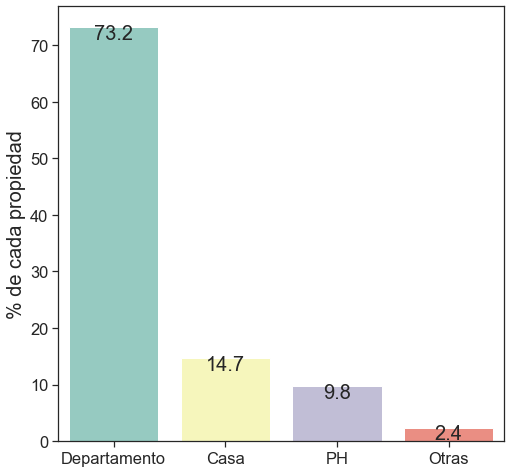

In [17]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5) 
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
splot=sns.barplot(x='Tipo de propiedad', y='% de cada propiedad',data=df, palette="Set3")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   size=20,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("", size=20)
plt.ylabel("% de cada propiedad", size=20)

**Conclusión: Como podemos ver en el gráfico el 97.6% de las propiedades se concentra en los tipos de propiedad: Departamento, Casa y PH.** 

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [18]:
Prop['l2'].value_counts() #Esta función de pandas me permite contar la cantidad de propiedades,
# en este caso, por distrito o zona del AMBA

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

In [19]:
Localidades=Prop['l3'].value_counts() #Esta función de pandas me permite contar la cantidad de propiedades, en este caso, 
# por barrio de Capital Federal o ciudad del Gran Buenos Aires 
Localidades.head(20)


Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
Villa Crespo        6494
Recoleta            5917
La Plata            4354
La Matanza          3757
Pilar               3709
Lomas de Zamora     3599
Villa Urquiza       3339
Vicente López       3251
Tres de Febrero     3240
Barrio Norte        3229
Balvanera           2992
Flores              2556
Morón               2312
San Isidro          2265
Nuñez               1978
Name: l3, dtype: int64

In [20]:
Prop['l3'].unique() # Esta función me permite visualizar el total de localidades cargadas en la comlumn l3

array(['San Cristobal', 'Boedo', 'Palermo', 'La Plata', 'Villa Crespo',
       'Parque Patricios', 'Villa Pueyrredón', 'Pilar', 'Tigre', 'Abasto',
       'Flores', 'Morón', 'Nuñez', 'Almagro', 'Belgrano', 'Floresta',
       'Recoleta', 'Balvanera', 'Caballito', 'Chacarita', 'San Telmo',
       'Colegiales', 'La Matanza', 'San Isidro', 'San Miguel',
       'Villa Luro', 'Barrio Norte', 'Las Cañitas', 'San Nicolás',
       'Villa Urquiza', 'Vicente López', 'Parque Centenario',
       'General San Martín', 'Villa General Mitre', 'Lanús', 'Ituzaingó',
       'Boca', 'Once', 'Retiro', 'Monserrat', 'Avellaneda',
       'San Fernando', 'Puerto Madero', 'Villa Ortuzar',
       'Parque Chacabuco', 'Centro / Microcentro', 'Tres de Febrero',
       'Liniers', 'Coghlan', 'Congreso', 'Paternal', 'Saavedra',
       'Villa Santa Rita', 'Barracas', 'Villa Lugano', 'Constitución',
       'Mataderos', 'Villa Devoto', 'Parque Avellaneda',
       'Villa del Parque', 'Esteban Echeverría', 'Lomas de Zamora'

In [21]:
Locporcentajes=(Prop['l3'].value_counts(normalize=True)*100)
Locporcentajes.head(20)

Palermo            8.913814
Tigre              5.944361
Almagro            5.132279
Belgrano           4.728624
Caballito          4.534297
Villa Crespo       4.427929
Recoleta           4.034502
La Plata           2.968771
La Matanza         2.561707
Pilar              2.528979
Lomas de Zamora    2.453975
Villa Urquiza      2.276694
Vicente López      2.216692
Tres de Febrero    2.209191
Barrio Norte       2.201691
Balvanera          2.040093
Flores             1.742806
Morón              1.576435
San Isidro         1.544388
Nuñez              1.348698
Name: l3, dtype: float64

**Voy a seleccionar las primeras 20 localidades que concentran el 65% del total de propiedades y graficarlas en un subplot.**

In [22]:
X= Prop['l3']
Localidad= []

for i in X:
  if i== 'Palermo':
    Localidad.append(i)
  elif i=='Tigre':
      Localidad.append(i)
  elif i=='Almagro':
        Localidad.append(i)
  elif i=='Belgrano':
          Localidad.append(i)
  elif i=='Caballito':
            Localidad.append(i)
  elif i=='Villa Crespo':
            Localidad.append(i)
  elif i=='Recoleta':
            Localidad.append(i)
  elif i=='La Plata':
            Localidad.append(i)
  elif i=='La Matanza':
            Localidad.append(i)
  elif i=='Pilar':
            Localidad.append(i)
  elif i=='Lomas de Zamora':
            Localidad.append(i)
  elif i=='Villa Urquiza':
            Localidad.append(i)
  elif i=='Vicente López':
            Localidad.append(i)
  elif i=='Tres de Febrero'  :
            Localidad.append(i)
  elif i=='Barrio Norte':
            Localidad.append(i)
  elif i=='Balvanera':
            Localidad.append(i)
  elif i=='Flores':
            Localidad.append(i)
  elif i=='Morón':
            Localidad.append(i)
  elif i=='San Isidro':
            Localidad.append(i)
  elif i=='Nuñez':
            Localidad.append(i)
  else:
    Localidad.append('Otras')

        

In [23]:

#Creo un dataframe nuevo a partir de la lista creada para poder graficar los datos con Seaborn
dfLocalidad=pd.DataFrame(Localidad,columns=['Localidades'])

C:\Users\Gabriel\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gabriel\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-24-7ab3a68b6a11>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


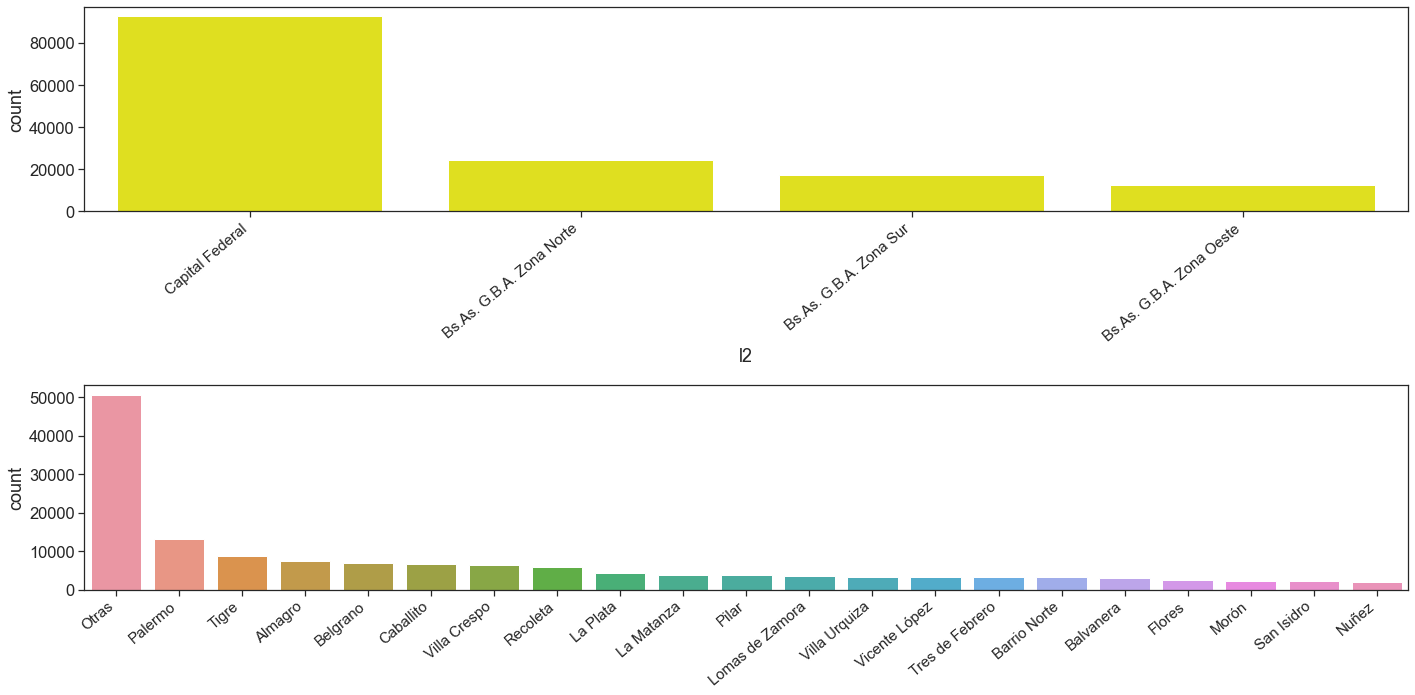

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import set
from matplotlib import pyplot

l2 = ['Capital Federal','Bs.As. G.B.A. Zona Norte','Bs.As. G.B.A. Zona Sur','Bs.As. G.B.A. Zona Oeste']

fig, ax =plt.subplots(2, figsize=(20,10))
bx= sns.countplot(Prop['l2'], ax=ax[0], color='yellow', order = Prop["l2"].value_counts().index)
bx.set_xticklabels(bx.get_xticklabels(), rotation=40, ha="right", size=15)
ax= sns.countplot(Localidad, ax=ax[1], order = dfLocalidad['Localidades'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=15)

plt.tight_layout()
fig.show()

**Voy analizar los porcentajes de cada grupo de datos**

In [25]:
Prop["l2"].value_counts(normalize=True)*100

Capital Federal             63.097641
Bs.As. G.B.A. Zona Norte    16.556662
Bs.As. G.B.A. Zona Sur      11.709396
Bs.As. G.B.A. Zona Oeste     8.636302
Name: l2, dtype: float64

In [26]:
dfLocalidad.value_counts(normalize=True)*100

Localidades    
Otras              34.614073
Palermo             8.913814
Tigre               5.944361
Almagro             5.132279
Belgrano            4.728624
Caballito           4.534297
Villa Crespo        4.427929
Recoleta            4.034502
La Plata            2.968771
La Matanza          2.561707
Pilar               2.528979
Lomas de Zamora     2.453975
Villa Urquiza       2.276694
Vicente López       2.216692
Tres de Febrero     2.209191
Barrio Norte        2.201691
Balvanera           2.040093
Flores              1.742806
Morón               1.576435
San Isidro          1.544388
Nuñez               1.348698
dtype: float64

**Conclusiones: Como podemos ver el 63% de propiedades en venta se concentra en la Ciudad de Buenos Aires. Cuando analizamos los barrios de la Ciudad de Buenos Aires y las ciudades del gran Buenos Aires vemos que la distribución es bastante uniforme, sin embargo, se destaca Palermo como la localidad que concentra el mayor número de propiedades en venta.** 

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [27]:
#Voy a realizar el filtrado utilizando una mascara para las propiedades ubicadas en Capital Federal. 
mask = Prop['l2'].values == 'Capital Federal'

# Voy a crear un nuevo dataset seleccionando las filas codificadas en booleanos, que cree anteriormente, con el método loc() 
df_new = Prop.loc[mask] 

# Creo una lista con las categóticas que me interesa seleccionar
li=['Departamento','Casa','PH'] 

#Ahora voy aplicar el método ISIN: Este método toma un iterable o una serie u otro dataframe como parámetro 
# y comprueba si existen elementos del dataframe en él. Las filas que se evalúen como verdaderas se consideran para el resultado.  

Filter= df_new[df_new.property_type.isin(li)]
Filter.shape

(91485, 19)

In [28]:
Filter.head(2)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta


In [29]:
# Voy a quitar comlunas que contienen información irrelevante.

Prop1 = Filter.drop(['lat', 'lon', 'l1', 'title', 'description'], axis=1)
Prop1.head(5)

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,PH,Venta


In [30]:
Prop1.shape

(91485, 14)

In [31]:
# En este bloque voy a imprimir las filas duplicadas
Duplicadas = Prop1[Prop1.duplicated()]
print('number of duplicate rows:', Duplicadas.shape)

number of duplicate rows: (4327, 14)


In [32]:
Prop1.count() # Con este método voy a ver la cantidad de filas por comlumna en Prop1

start_date         91485
end_date           91485
created_on         91485
l2                 91485
l3                 91485
rooms              91485
bedrooms           91485
bathrooms          89314
surface_total      82568
surface_covered    82250
price              91485
currency           91485
property_type      91485
operation_type     91485
dtype: int64

In [33]:
# Los datos en bathrooms, surface_total ysurface_covered se deben a los datos nulos o faltantes (Ver más arriba)

In [34]:
# En este bloque voy a quitar del dataframe las filas duplicadas
Prop2 = Prop1.drop_duplicates()
Prop2.shape

(87158, 14)

In [35]:
Prop2.count()  # Con este método voy a ver la cantidad de filas por comlumna en Prop2

start_date         87158
end_date           87158
created_on         87158
l2                 87158
l3                 87158
rooms              87158
bedrooms           87158
bathrooms          85163
surface_total      79299
surface_covered    78997
price              87158
currency           87158
property_type      87158
operation_type     87158
dtype: int64

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

**DATOS ATIPICOS**

In [36]:
#Para ver los parametros estadísticos de mi Dataset aplico la función de Pandas "Describe"

Prop2.describe()



,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,87158.000000,87158.000000,85163.000000,79299.000000,78997.000000,8.715800e+04
mean,2.975194,1.969171,1.557989,113.505668,95.568262,2.587893e+05
std,1.323143,1.076500,0.856817,1000.600730,794.192959,3.192493e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.210000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Según los datos estadísticos obtenidos, las variables surface_total, surface_covered y price presentan una std muy grande (valores muy alejados de la media), además, presentan  valores min. y max. irracionales. En el caso de rooms, bedrooms y bathrooms presentan valores máximos muy alejados de la media.

Del análsis de  y ver si son errores o si son datos que me puedan aportar información. cada variable surgen valores que resultan atípicos:

**rooms:** El valor máximo de 26 es atípico, podría tratarse de un hotel, la media arroja un valor de 3.

**bedrooms:** Aquí también destaca el valor máximo de 15 dormitorios que podría tratarse de un hotel.

**bathrooms:** Sucede lo mismo que con bedrooms

**surface_total y surface_covered:** Tienen valores máximos y mínimos atípicos. En el caso de surface_covered el valor mínimo de 1 mtr2 es un error en la carga de los datos,este valor no es lógico para ningún tipo de propiedad. 

**price:** En el caso del valor mínimo se trata de un error ya que no existe propiedad por más pequeña que sea con ese valor de venta. Es muy probable que haya sido un error de carga y se hayan confundido con el precio por metro cuadrado, ya que en la Ciudad de Buenos Aires, hay barrios como Puerto Madero donde los precios alcanzan ese valor por metro cuadrado. En el caso del valor máximo está dos ordenes por arriba del 75% de los datos, es un valor muy extremo el cual puede ser un error de carga de datos o un outlier real. 

Voy a explorar cuantas instancias hay de estos valores atípicos y ver si son errores o si son datos que me puedan aportar información. 

HABITACIONES

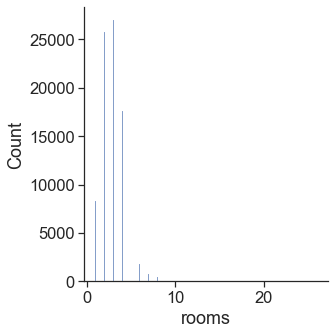

In [37]:
# Vemos como  es la distribución de los datos de la variable habitaciones
sns.displot(data=Prop2['rooms'])

Esta variable tiene una distribución muy cercana a la normal un poco corrida hacia la izquierda. Esto se puede deber a que los valores extremos sobre la derecha 

In [38]:
# Veamos cuantas instancias cumplen con el valor máximo de habitaciones.

rooms_outlier=(Prop2[Prop2['rooms']>=26])
rooms_outlier.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
31583,2020-01-06,2020-01-25,2020-01-06,Capital Federal,Boca,26.0,15.0,7.0,845.0,835.0,750000.0,USD,Casa,Venta
111651,2020-01-24,2020-02-05,2020-01-24,Capital Federal,Boca,26.0,15.0,7.0,845.0,835.0,750000.0,USD,Casa,Venta


Por lo que se puede ver es solo una propiedad que está repetida. Sin embargo, el número de habitaciones no parece ser un error ya que es proporcional a otras variables como número de dormitorios, baños y superficie cubierta. La propiedad podría tratarse de un hospedaje tanto por sus características como por la zona donde está ubicada. Si embargo, este valor puede ser considerado outlier porque se aleja mucho de la media. Recordemos que el objetivo del modelo es predecir viviendas no alojamientos por este motivo voy a eliminar estas instancias del dataset. 

In [39]:
rooms_sin_outliers_1=Prop2.drop([31583],axis=0)

In [40]:
rooms_sin_outliers_2=rooms_sin_outliers_1.drop([111651],axis=0)

In [41]:
# Chequeo que si se eliminaron las instancias 

rooms_outlier=(rooms_sin_outliers_2[rooms_sin_outliers_2['rooms']>=26])
rooms_outlier.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type


DORMITORIOS

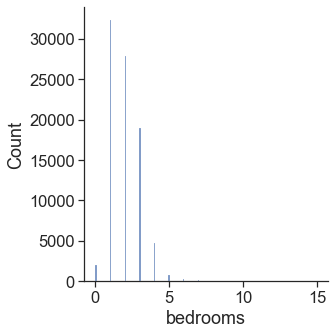

In [42]:
# Vemos como  es la distribución de los datos de la variable dormitorios
sns.displot(data=rooms_sin_outliers_2['bedrooms'])

Esta variable tiene una distribución muy cercana a la normal con una pequeña cola que se extiende hacia la derecha.

In [43]:
# Veamos cuantas instancias cumplen con el valor máximo de dormitorios.Retomo del dataframe que cree para eliminer outliers de rooms

bedrooms_outlier=(rooms_sin_outliers_2[rooms_sin_outliers_2['bedrooms']>=15])
bedrooms_outlier.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
8843,2019-11-03,2019-12-23,2019-11-03,Capital Federal,Boca,2.0,15.0,1.0,47.0,44.0,100000.0,USD,Departamento,Venta
34580,2020-01-02,2020-01-16,2020-01-02,Capital Federal,Belgrano,16.0,15.0,4.0,476.0,297.0,500000.0,USD,PH,Venta
44167,2020-01-16,2020-01-19,2020-01-16,Capital Federal,Belgrano,16.0,15.0,4.0,476.0,297.0,500000.0,USD,PH,Venta
69101,2019-10-19,2020-01-02,2019-10-19,Capital Federal,Belgrano,16.0,15.0,4.0,476.0,297.0,500000.0,USD,PH,Venta


De las 4 propiedades detectadas con 15 dormitorios 3 están repetidas. Por su superficie también podría tratarse de un alojamiento aunque está catalogado como PH y también la trataría como outlier por encontrarse muy alejada de la media. Recordemos que el objetivo del modelo es predecir viviendas no alojamientos.  
Por último, puedo afirmar que la instancia 8843 está mal cargada, una propiedad con 2 habitaciones y 15 dormitorios no puede tener un baño y una superficie total de 47 mtrs2. A continuación voy a eliminar estas instancias. 

In [44]:
index0 = rooms_sin_outliers_2[rooms_sin_outliers_2['bedrooms']==15 ].index

In [45]:
bedrooms_sin_estremos=rooms_sin_outliers_2.drop(index0)

In [46]:
#Chequeo si las eliminé

bedrooms_outlier=bedrooms_sin_estremos[bedrooms_sin_estremos['bedrooms']>=15]
bedrooms_outlier.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type


BAÑOS

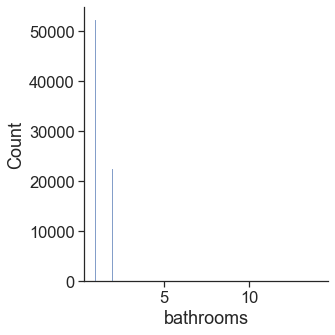

In [47]:
# Vemos como  es la distribución de los datos de la variable baños
sns.displot(data=bedrooms_sin_estremos['bathrooms'])

En este caso la mayoría de los valores se concentran en 1 o 2 baños.

In [48]:
# Veamos cuantas instancias cumplen con el valor máximo de Baños

bathrooms_extremos=bedrooms_sin_estremos[bedrooms_sin_estremos['bathrooms']>=14]
bathrooms_extremos.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
35960,2019-01-11,2019-02-04,2019-01-11,Capital Federal,Palermo,2.0,1.0,14.0,50.0,50.0,225000.0,USD,Departamento,Venta
132709,2019-02-13,2019-06-23,2019-02-13,Capital Federal,Recoleta,2.0,1.0,14.0,45.0,45.0,159000.0,USD,Departamento,Venta
136930,2019-07-31,2020-01-17,2019-07-31,Capital Federal,Recoleta,2.0,1.0,14.0,45.0,45.0,159000.0,USD,Departamento,Venta


En este caso podemos afirmar que se tratan de errores ya que es irracional tener 14 baños en 45 o 50 mtrs2. Voy a eliminar estas instancias

In [49]:
index1 = bedrooms_sin_estremos[bedrooms_sin_estremos['bathrooms']==14 ].index

In [50]:
bathrooms_sin_extremos=bedrooms_sin_estremos.drop(index1)

In [51]:
# Chequeo que se hayan eliminado las instancias

bathrooms_outlier=(bathrooms_sin_extremos[bathrooms_sin_extremos['bathrooms']>=14])
bathrooms_outlier.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type


SUPERFICIE TOTAL 

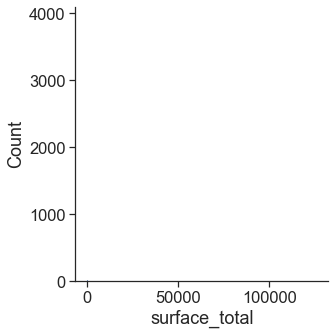

In [52]:
# Vemos como  es la distribución de los datos de la variable superficie total
sns.displot(data=bathrooms_sin_extremos['surface_total'])

Aparentemente los datos extremos máximos hacen que no se visualicen los datos en el gráfico. Voy aprobar otra opción de gráfico

<AxesSubplot:xlabel='surface_total', ylabel='Count'>

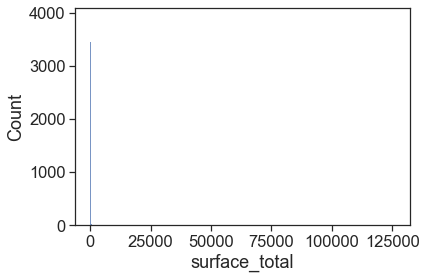

In [53]:
# Vemos como  es la distribución de los datos de la variable superficie total
sns.histplot(data=bathrooms_sin_extremos['surface_total'])

En este tipo de gráfico (histograma) se viesualizan datos pero no aporta una información relevante. Los datos de superficie total se ven muy cera de cero.

In [54]:
# Veamos cuantas instancias cumplen con el valor máximo de superficie total. 
surface_total_outlier=bathrooms_sin_extremos[(bathrooms_sin_extremos['surface_total']>=126062)]
surface_total_outlier.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
13243,2019-08-05,2019-10-08,2019-08-05,Capital Federal,Caballito,5.0,4.0,3.0,126062.0,126062.0,220000.0,USD,PH,Venta
35231,2019-04-18,2019-05-02,2019-04-18,Capital Federal,Caballito,5.0,4.0,3.0,126062.0,126.0,240000.0,USD,PH,Venta
90235,2019-03-10,2019-07-15,2019-03-10,Capital Federal,Caballito,5.0,4.0,3.0,126062.0,126062.0,215000.0,USD,PH,Venta


Para los valores máximos vemos que hay un error de carga. La cantidad de metros cuadrados es irracional. Es posible que el valor correcto sea 126 mtrs2 como figura en la instancia 35231 en superficie cubierta. Los valores de habitaciones, dormitorios, baños y el precio son razonables para una propiedad de 126 mtrs2 en la zona de Caballito. En este caso podría corregir los valores de superficie que estén mal ya que el valor 126 no se aleja tanto del promedio. Por otro lado, es claro que se trata de la misma propiedad repetida 3 veces por lo cual debería eliminar 2 de ellas y quedarme con la tiene un precio intermedio. 

A continucación voy a corregir los valores máximos y mínimos 

In [55]:
# Reemplazo el valor 126062.0 por 126.0
bathrooms_sin_extremos.replace(126062.0,126.0, inplace=True)

Chequeo que si produjo el cambio en cada instancias.

In [56]:
bathrooms_sin_extremos.loc[[13243]]

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
13243,2019-08-05,2019-10-08,2019-08-05,Capital Federal,Caballito,5.0,4.0,3.0,126.0,126.0,220000.0,USD,PH,Venta


In [57]:
bathrooms_sin_extremos.loc[[35231]]

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
35231,2019-04-18,2019-05-02,2019-04-18,Capital Federal,Caballito,5.0,4.0,3.0,126.0,126.0,240000.0,USD,PH,Venta


In [58]:
bathrooms_sin_extremos.loc[[90235]]

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
90235,2019-03-10,2019-07-15,2019-03-10,Capital Federal,Caballito,5.0,4.0,3.0,126.0,126.0,215000.0,USD,PH,Venta


Elimino las instancias repetidas y me quedo con la que tiene un precio interedio. 

In [59]:
bathrooms_sin_extremos.drop([35231],axis=0, inplace=True)

In [60]:
bathrooms_sin_extremos.drop([90235],axis=0, inplace=True)

In [61]:
 # Veamos cuantas instancias  cumplen con el valor mínimo de superficie total. 
surface_total_outlier=bathrooms_sin_extremos[(bathrooms_sin_extremos['surface_total']<=10)]
surface_total_outlier.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
73182,2019-03-21,2019-10-18,2019-03-21,Capital Federal,Villa Lugano,2.0,1.0,1.0,10.0,45.0,220000.0,USD,PH,Venta
132438,2019-10-27,2020-01-31,2019-10-27,Capital Federal,Belgrano,3.0,2.0,1.0,10.0,78.0,160000.0,USD,Departamento,Venta


En este caso es claro que hubo un error en la carga de los valores de superficie total ya que no puede ser menor que la superficie cubierta. Se podrían corregir igualando superficie total a superficie cubierta. 
A continucación voy a corregir los valores mínimos 

In [62]:
# Reemplazo el valor 10.0 por el valor de superficie total más alto (78)
bathrooms_sin_extremos['surface_total'].replace(10.0,78.0, inplace=True)

In [63]:
#CHequeo que se haya producido el cambio
bathrooms_sin_extremos.loc[[73182]]

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
73182,2019-03-21,2019-10-18,2019-03-21,Capital Federal,Villa Lugano,2.0,1.0,1.0,78.0,45.0,220000.0,USD,PH,Venta


In [64]:
#CHequeo que se haya producido el cambio
bathrooms_sin_extremos.loc[[132438]]

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
132438,2019-10-27,2020-01-31,2019-10-27,Capital Federal,Belgrano,3.0,2.0,1.0,78.0,78.0,160000.0,USD,Departamento,Venta


SUPERFICIE CUBIERTA

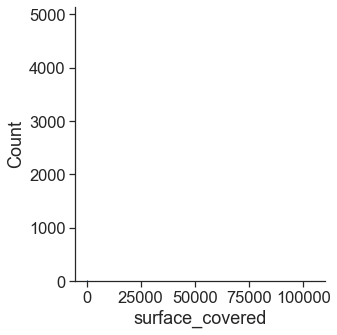

In [65]:
# Vemos como  es la distribución de los datos de la variable superficie cuebierta
sns.displot(data=bathrooms_sin_extremos['surface_covered'])

In [66]:
# Veamos cuantas instancias cumplen con el valor máximo de superficie cubierta. 
surface_covered_outlier=bathrooms_sin_extremos[(bathrooms_sin_extremos['surface_covered']>=126062)]
surface_covered_outlier.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type


Al corregir el valor máximo en superficie total, también lo corrige en superficie cubierta. Ahora veamos los valores mínimos para superficie cuebierta. 

In [67]:
# Veamos cuantas instancias cumplen con el valor mínimo de superficie cubierta. 
surface_covered_outlier=bathrooms_sin_extremos[bathrooms_sin_extremos['surface_covered']==1]
surface_covered_outlier.count()

start_date         46
end_date           46
created_on         46
l2                 46
l3                 46
rooms              46
bedrooms           46
bathrooms          45
surface_total       3
surface_covered    46
price              46
currency           46
property_type      46
operation_type     46
dtype: int64

In [68]:
surface_covered_outlier.head(46)

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
2506,2019-09-21,2019-12-23,2019-09-21,Capital Federal,Palermo,3.0,2.0,1.0,NaN,1.0,236000.0,USD,Departamento,Venta
4608,2019-03-17,9999-12-31,2019-03-17,Capital Federal,Villa Urquiza,5.0,4.0,5.0,NaN,1.0,598000.0,USD,Departamento,Venta
6202,2019-04-12,2019-06-23,2019-04-12,Capital Federal,Almagro,5.0,4.0,3.0,NaN,1.0,380000.0,USD,PH,Venta
9730,2019-11-17,2019-12-23,2019-11-17,Capital Federal,Belgrano,2.0,1.0,1.0,NaN,1.0,159900.0,USD,Departamento,Venta
16612,2019-12-24,2019-12-27,2019-12-24,Capital Federal,Villa del Parque,3.0,2.0,3.0,NaN,1.0,197000.0,USD,PH,Venta
20168,2019-11-08,2019-11-10,2019-11-08,Capital Federal,Caballito,4.0,3.0,3.0,NaN,1.0,360000.0,USD,Departamento,Venta
21949,2019-12-18,2019-12-19,2019-12-18,Capital Federal,Villa Urquiza,3.0,2.0,2.0,NaN,1.0,240000.0,USD,PH,Venta
25061,2019-08-01,2019-08-14,2019-08-01,Capital Federal,Villa Urquiza,2.0,1.0,1.0,NaN,1.0,94900.0,USD,Departamento,Venta
26173,2019-08-01,2019-08-14,2019-08-01,Capital Federal,Villa Urquiza,3.0,2.0,1.0,NaN,1.0,285000.0,USD,Departamento,Venta
26523,2019-08-01,2019-08-14,2019-08-01,Capital Federal,Palermo,4.0,3.0,2.0,125.0,1.0,800000.0,USD,Departamento,Venta


Claramente este valor mínimo en superfiie cubierta es un error. Los datos entre las otras variables y la variable precios (a predecir por el modelo) son coherentes, sin embargo, las variables superficie total y curbierta son importantes para el modelo de predicción, al no tener estos datos es filas no aportan demasiada información por eso las voy a eliminar

In [69]:
index = bathrooms_sin_extremos[bathrooms_sin_extremos['surface_covered']==1 ].index

In [70]:
bathrooms_sin_extremos.drop(index , inplace=True)

Chequeo que se hayan eliminado las filas que contienen el valor superficie total igual a 1

In [71]:
Chequeo=bathrooms_sin_extremos[(bathrooms_sin_extremos['surface_covered']==1)]
Chequeo.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type


PRECIO

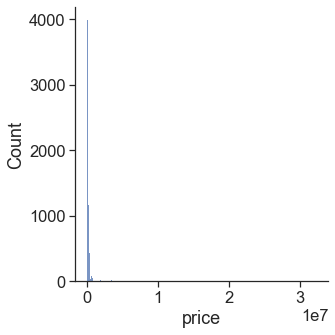

In [72]:
# Vemos como  es la distribución de los datos de la variable PRECIO
sns.displot(data=bathrooms_sin_extremos['price'])

Como podemos ver, en este variable, hay datos extremos y atípicos que aplastan los datos cerca de cero. 

In [73]:
# Veamos cuantas instancias cumplen con el valor máximo de la variable precio.  
price_outlier=bathrooms_sin_extremos[(bathrooms_sin_extremos['price']>=3.243423e+07)]
price_outlier.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
76894,2019-10-25,2019-11-06,2019-10-25,Capital Federal,Palermo,1.0,1.0,4.0,43.0,43.0,32434232.0,USD,Departamento,Venta


Claramente esta propiedad está mal cargada. Los valores son irracionales. Voy a eliminar esta instancia

In [74]:
bathrooms_sin_extremos.drop([76894],axis=0, inplace=True)

In [75]:
# Veamos cuantas instancias cumplen con el valor mínimo de la variable precio.  
price_outlier=bathrooms_sin_extremos[(bathrooms_sin_extremos['price']== 6.000000e+03)]
price_outlier.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
62989,2019-03-28,2019-03-30,2019-03-28,Capital Federal,Palermo,5.0,4.0,4.0,340.0,320.0,6000.0,USD,Departamento,Venta
96337,2019-11-06,2019-12-23,2019-11-06,Capital Federal,Puerto Madero,5.0,3.0,3.0,195.0,195.0,6000.0,USD,Departamento,Venta
102589,2019-04-30,2019-05-11,2019-04-30,Capital Federal,Recoleta,3.0,2.0,2.0,340.0,200.0,6000.0,USD,Departamento,Venta
117012,2019-03-15,2019-06-23,2019-03-15,Capital Federal,Puerto Madero,3.0,2.0,3.0,275.0,220.0,6000.0,USD,Departamento,Venta


El precio está mal cargado para estas instancias. El precio que figura es el precio por metro cuadrado en promedio para estos barrios de la capital federal. Voy a corregir este error multiplicando el valor del mtr2 por la superficie cubierta promedio.

In [76]:
bathrooms_sin_extremos['price'].replace(6000.0, (6000*229), inplace=True)  

In [77]:
#Chequeo que se hayan producido los cambios
bathrooms_sin_extremos.loc[[96337]]

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
96337,2019-11-06,2019-12-23,2019-11-06,Capital Federal,Puerto Madero,5.0,3.0,3.0,195.0,195.0,1374000.0,USD,Departamento,Venta


In [78]:
#Chequeo que se hayan producido los cambios
bathrooms_sin_extremos.loc[[62989]]

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
62989,2019-03-28,2019-03-30,2019-03-28,Capital Federal,Palermo,5.0,4.0,4.0,340.0,320.0,1374000.0,USD,Departamento,Venta


**Voy analizar los estadisticos para var como va la eliminación de valores extremos.**

In [79]:
bathrooms_sin_extremos.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,87100.000000,87100.000000,85106.000000,79284.000000,78939.000000,8.710000e+04
mean,2.974179,1.968209,1.557223,108.710850,92.408670,2.584745e+05
std,1.316506,1.071122,0.852908,633.329196,478.695844,3.002148e+05
min,1.000000,0.000000,1.000000,11.000000,2.000000,7.500000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.210000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,21.000000,14.000000,12.000000,108960.000000,104890.000000,6.500000e+06


Como podemos ver, las otras variables siguen con valores mínimos y máximos muy alejados de la media

In [80]:
# Chequeo los valores nulos
print(bathrooms_sin_extremos.isnull().sum())

start_date            0
end_date              0
created_on            0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1994
surface_total      7816
surface_covered    8161
price                 0
currency              0
property_type         0
operation_type        0
dtype: int64


In [81]:
# Comparo valores nulos antes de eliminar valores extremos

print(Prop2.isnull().sum())

start_date            0
end_date              0
created_on            0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1995
surface_total      7859
surface_covered    8161
price                 0
currency              0
property_type         0
operation_type        0
dtype: int64


**A continuación voy a graficar la distribución de valores en gráficos de Boxplots para visualizar los datos atípicos y luego filtrarlos a mano.**

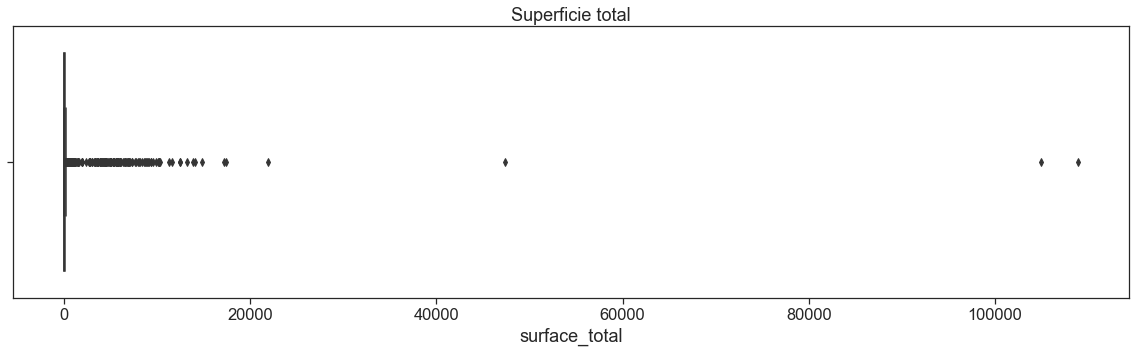

In [82]:
# Comienzo por superficie total
plt.figure(figsize=(20,5)) 
sns.boxplot(data = bathrooms_sin_extremos, x = 'surface_total', palette = "viridis")
plt.title('Superficie total')
plt.show()

**Por lo que puedo observar en el boxplote es que la mayoría de las instancias están por debajo de los 25.000 mtrs2**

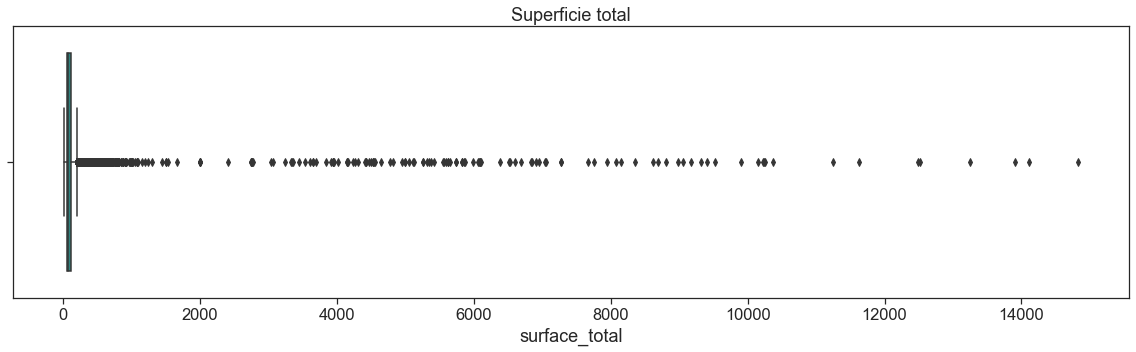

count    79278.000000
mean       104.710979
std        267.470857
min         11.000000
25%         49.000000
50%         71.000000
75%        111.000000
max      14834.000000
Name: surface_total, dtype: float64

In [83]:
#Vuelvo a realizar un filtrado en este caso propiedades por debajo de 25 mil mtrs2

filtro_sup_total_1= bathrooms_sin_extremos[(bathrooms_sin_extremos['surface_total'] < 15000)]

plt.figure(figsize=(20,5)) 
sns.boxplot(data = filtro_sup_total_1, x = 'surface_total', palette = "viridis")
plt.title('Superficie total')
plt.show()

filtro_sup_total_1.surface_total.describe()

**Sigo observando muchos outliers,voy a seleccioar las instancias por debajo de 2000 mtrs2**

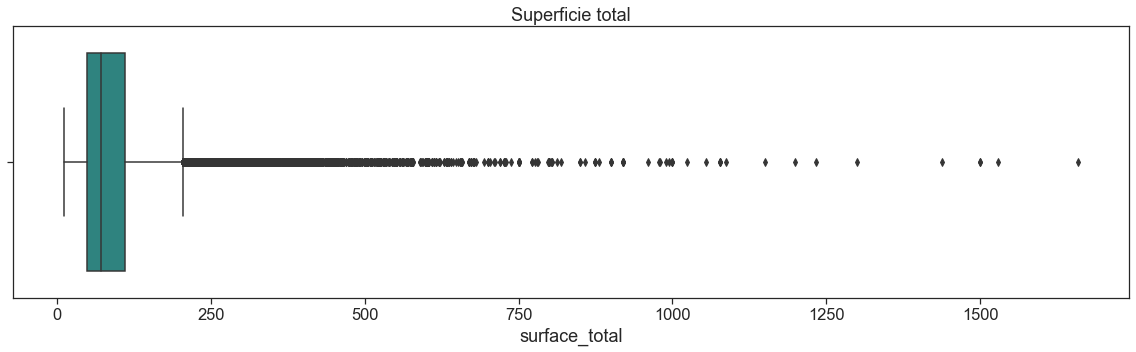

count    79159.000000
mean        95.733094
std         79.432459
min         11.000000
25%         49.000000
50%         71.000000
75%        111.000000
max       1660.000000
Name: surface_total, dtype: float64

In [84]:
filtro_sup_total_2= filtro_sup_total_1.loc[(filtro_sup_total_1['surface_total'] < 2000)]

plt.figure(figsize=(20,5)) 
sns.boxplot(data = filtro_sup_total_2, x = 'surface_total', palette = "viridis")
plt.title('Superficie total')
plt.show()

filtro_sup_total_2.surface_total.describe()

count    79132.000000
mean        95.487565
std         77.554779
min         14.000000
25%         49.000000
50%         71.000000
75%        111.000000
max        995.000000
Name: surface_total, dtype: float64

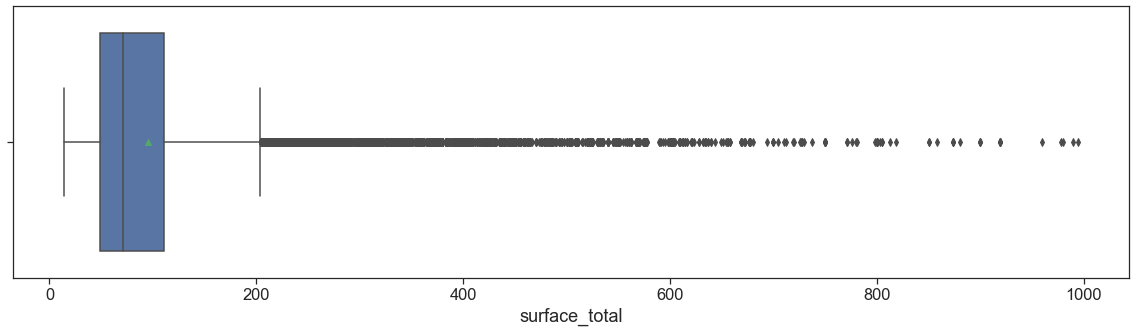

In [85]:
# Para reducir el número de outliers voy a seleccionar como límite máximo 1000 mtrs2. 
# Buscando en Properati observé que no hay propiedades menores a 14 mtrs2 así que voy a tomar este valor como valor mínimo. 

filtro_sup_total_3= filtro_sup_total_2.loc[(filtro_sup_total_2['surface_total'] < 1000) & (filtro_sup_total_2['surface_total'] >13)]

plt.figure(figsize=(20,5))

sns.boxplot(data=filtro_sup_total_3, x="surface_total", showmeans=True)

filtro_sup_total_3.surface_total.describe()

In [86]:
filtro_sup_total_3.shape #Cuantas filas mequedaron luego del  filtrado

(79132, 14)

**Filtrado por superficie cubierta**

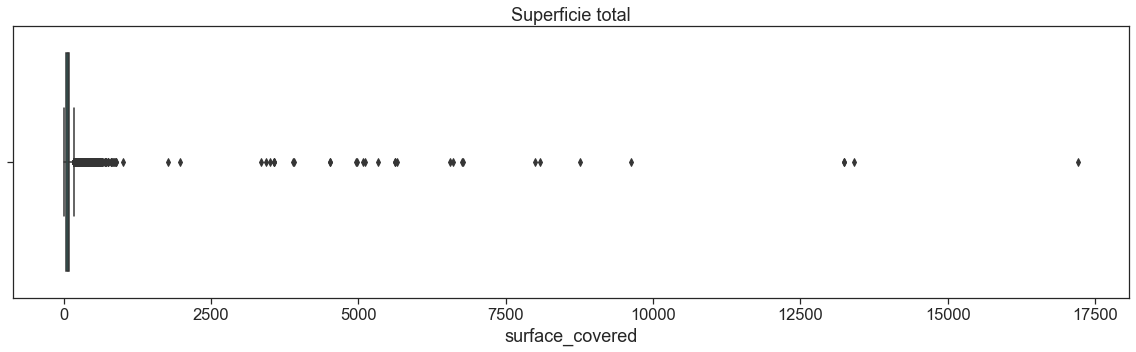

In [87]:
# Superficie cubierta
plt.figure(figsize=(20,5)) 
sns.boxplot(data = filtro_sup_total_3, x = 'surface_covered', palette = "viridis")
plt.title('Superficie total')
plt.show()

El gráfico está totalmente aplastado sobre la izquierda lo que indica que los valores atípicos están muy alejados de la media.
voy filtrar por valores hasta 1000 mtrs2 como valor máximo y 14 mtrs2 como valor mínimo al igual que en superficie total. La superficie cubierta no puede ser mayor que la total.

count    78579.000000
mean        82.593606
std         62.934483
min         14.000000
25%         44.000000
50%         63.000000
75%         96.000000
max        891.000000
Name: surface_covered, dtype: float64

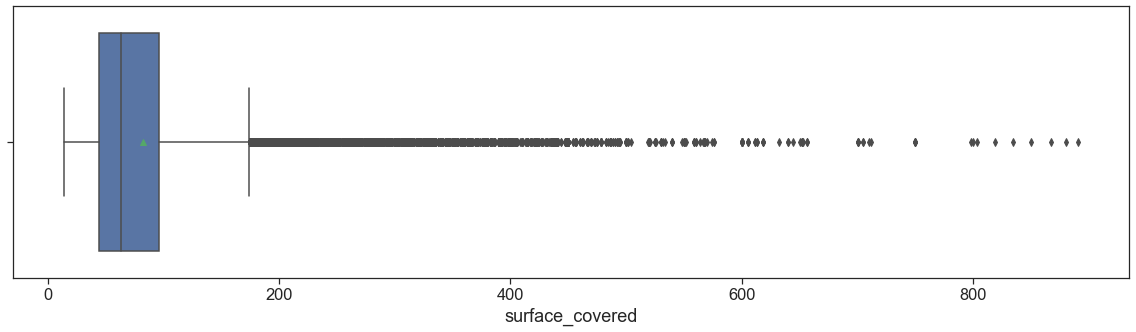

In [88]:
filtro_4= filtro_sup_total_3.loc[(filtro_sup_total_3['surface_covered'] < 1000) & (filtro_sup_total_3['surface_covered'] >13)]

plt.figure(figsize=(20,5))

sns.boxplot(data=filtro_4, x="surface_covered", showmeans=True)

filtro_4.surface_covered.describe()

Comparando los boxplots luego del filtrado final para "surface_total" y "surface_covered" se puede observar que este último tiene menos ouliers. 

**Hay propiedades registradas con superficie cubierta mayor a la superficie total, a continucación voy a corregir ese error:**

In [89]:
filtro_4['Sup_correg'] =filtro_4['surface_total'] -filtro_4['surface_covered']
filtro_4.head()

<ipython-input-89-be538e4e50b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_4['Sup_correg'] =filtro_4['surface_total'] -filtro_4['surface_covered']


,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type,Sup_correg
0,2019-10-17,2019-12-23,2019-10-17,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,Departamento,Venta,0.0
1,2019-10-17,2019-11-21,2019-10-17,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,PH,Venta,12.0
2,2019-10-17,2019-11-01,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,PH,Venta,0.0
3,2019-10-17,2019-12-23,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,PH,Venta,35.0
5,2019-10-17,2019-11-01,2019-10-17,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,PH,Venta,0.0


In [90]:
filtro_4.shape # Chequeo cuantas filas y columnas tengo

(78579, 15)

In [91]:
#Genero un nueo dataframe que excluya las propiedades con superficie cubierta superior a la superficie total.
filtro_5 = filtro_4[filtro_4["Sup_correg"] >= 0]
filtro_5.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type,Sup_correg
0,2019-10-17,2019-12-23,2019-10-17,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,Departamento,Venta,0.0
1,2019-10-17,2019-11-21,2019-10-17,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,PH,Venta,12.0
2,2019-10-17,2019-11-01,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,PH,Venta,0.0
3,2019-10-17,2019-12-23,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,PH,Venta,35.0
5,2019-10-17,2019-11-01,2019-10-17,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,PH,Venta,0.0


In [92]:
filtro_5.shape# Chequeo cuantas filas y columnas tengo

(77865, 15)

**Voy a ver la distribución de los precios visualizandolos en un gráfico de boxplot**

count    7.786500e+04
mean     2.638500e+05
std      3.081693e+05
min      7.500000e+03
25%      1.250000e+05
50%      1.799000e+05
75%      2.800000e+05
max      6.500000e+06
Name: price, dtype: float64

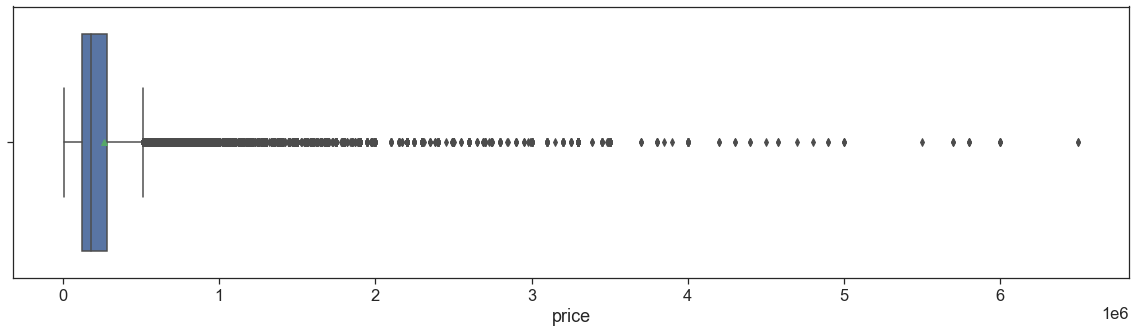

In [93]:
plt.figure(figsize=(20,5))

sns.boxplot(data=filtro_5, x="price", showmeans=True)

filtro_5.price.describe()

**Podemos observar que la mayoria de los precios están por debajo de 4 millones de dolares.**

count    7.782500e+04
mean     2.615049e+05
std      2.897849e+05
min      7.500000e+03
25%      1.250000e+05
50%      1.799000e+05
75%      2.800000e+05
max      3.900000e+06
Name: price, dtype: float64

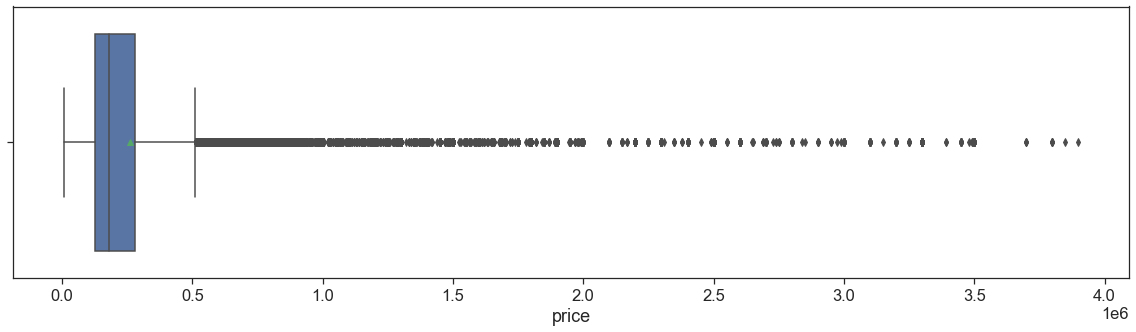

In [94]:
#Voy a filtrar las propiedades por debajo de 4 millones de dolares y realizar el gráfico de boxplot. 
filtro_6= filtro_5[(filtro_5['price'] < 4000000)]
             
plt.figure(figsize=(20,5))

sns.boxplot(data=filtro_6, x="price", showmeans=True)

filtro_6.price.describe()

**Ahora, en este gráfico de boxplot puedo observar que la mayoria de los precios atípicos están arriba de 2 millones de dolares. Voy a tomar este valor como límite superior para filtrar el dataset**

count    7.740200e+04
mean     2.492782e+05
std      2.295524e+05
min      3.300000e+04
25%      1.250000e+05
50%      1.790000e+05
75%      2.800000e+05
max      2.000000e+06
Name: price, dtype: float64

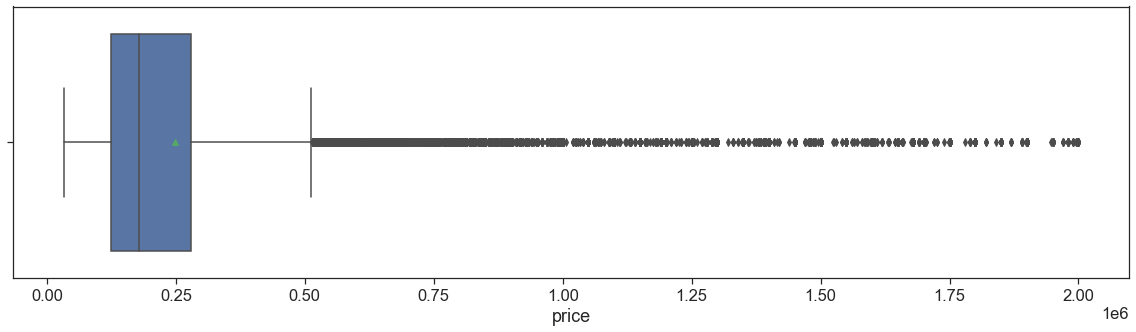

In [95]:
# Buscando en Properati observé que la mayoría de las propiedades con una superficie de 13 mtrs2 tienen un valor de aprox. USD 33000. 
#Así que tomo este valor como valor inferior. 

filtro_7=filtro_6[(filtro_6['price'] <= 2000000) & (filtro_6['price'] >=33000)]

plt.figure(figsize=(20,5))

sns.boxplot(data=filtro_7, x="price", showmeans=True)

filtro_7.price.describe()

In [96]:
filtro_7.shape

(77402, 15)

**Habitaciones**

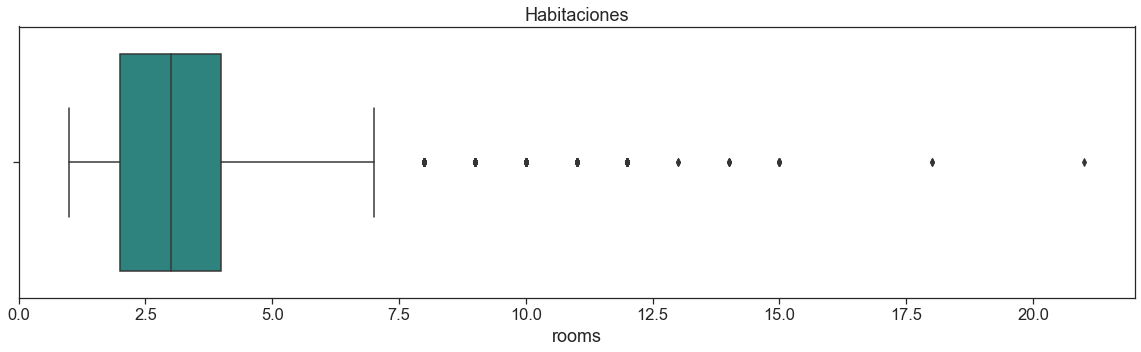

count    77402.000000
mean         2.998656
std          1.288641
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         21.000000
Name: rooms, dtype: float64

In [97]:
# Ahora voy a estudiar la distribución de valores para la variable rooms (habitaciones)
plt.figure(figsize=(20,5)) 
sns.boxplot(data = filtro_7, x = 'rooms', palette = "viridis")
plt.title('Habitaciones')
plt.show()
filtro_7.rooms.describe()

Como se puede ver en el gráfico hay 10 outliers con valores superiores a 7 habiataciones así que tomaré este valor como valor de corte. 

count    76835.000000
mean         2.954773
std          1.179052
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: rooms, dtype: float64

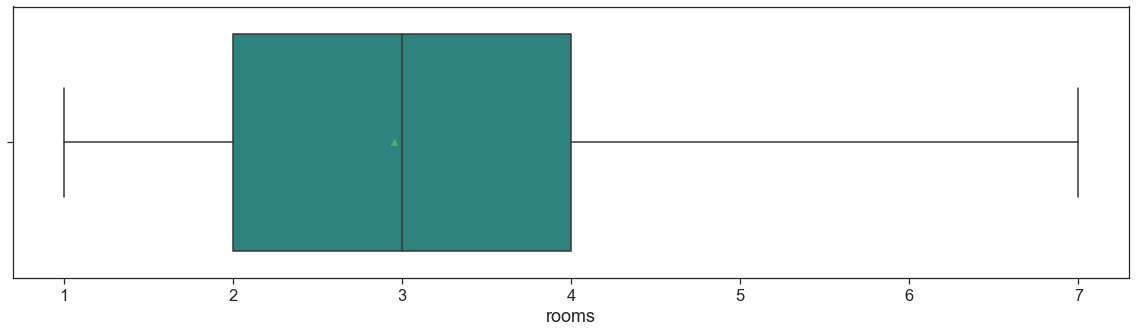

In [98]:
filtro_8= filtro_7[(filtro_7['rooms'] <= 7)]

plt.figure(figsize=(20,5))

sns.boxplot(data=filtro_8, x='rooms', showmeans=True, palette = "viridis")

filtro_8.rooms.describe()

**Dormitorios**

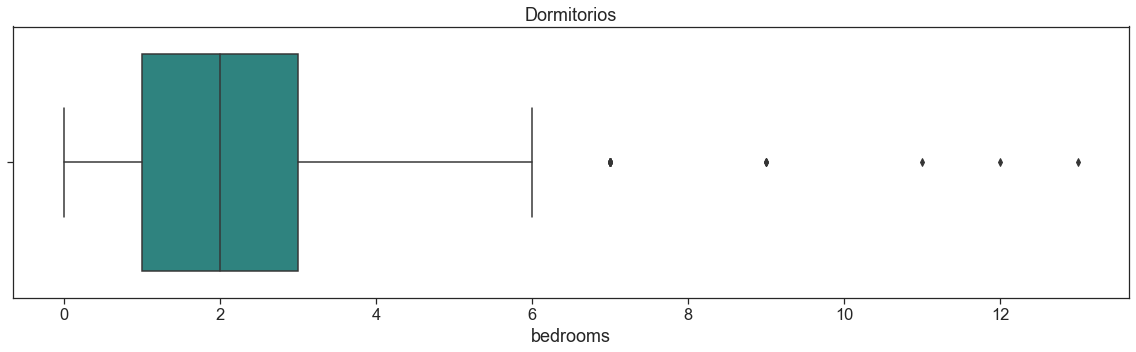

count    76835.000000
mean         1.965641
std          0.973029
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: bedrooms, dtype: float64

In [99]:
# Ahora voy a estudiar la distribución de valores para la variable bedrooms (dormitorios)
plt.figure(figsize=(20,5)) 
sns.boxplot(data =filtro_8, x = 'bedrooms', palette = "viridis")
plt.title('Dormitorios')
plt.show()
filtro_8.bedrooms.describe()

Como se puede ver en el gráfico hay 5 outliers con valores superiores a 6 dormitorios así que tomaré este valor como valor de corte. Por otro lado, es importante destacar que el valor más extremo de los outliers (15) no es suficientemente extremo como para aplastar el gráfico hacia la izquierda. A continuación voy a eliminar los datos outliers. 

count    76817.000000
mean         1.964188
std          0.968068
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: bedrooms, dtype: float64

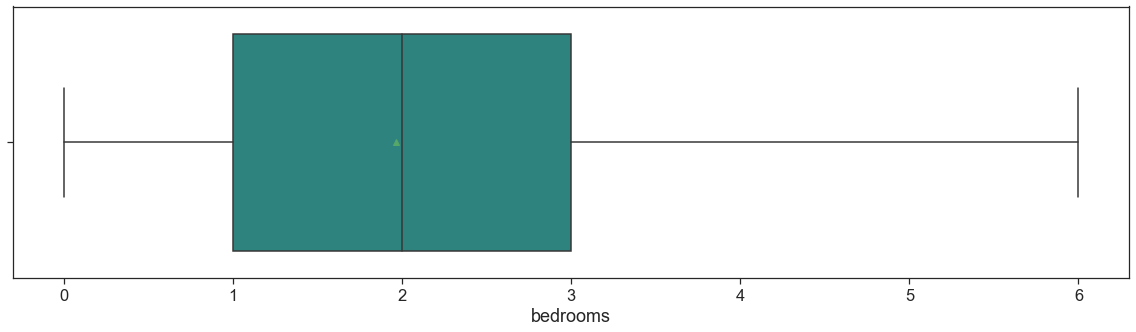

In [100]:
filtro_9= filtro_8[(filtro_8['bedrooms'] <= 6)]

plt.figure(figsize=(20,5))

sns.boxplot(data=filtro_9, x='bedrooms', showmeans=True, palette = "viridis")

filtro_9.bedrooms.describe()

**Baños**

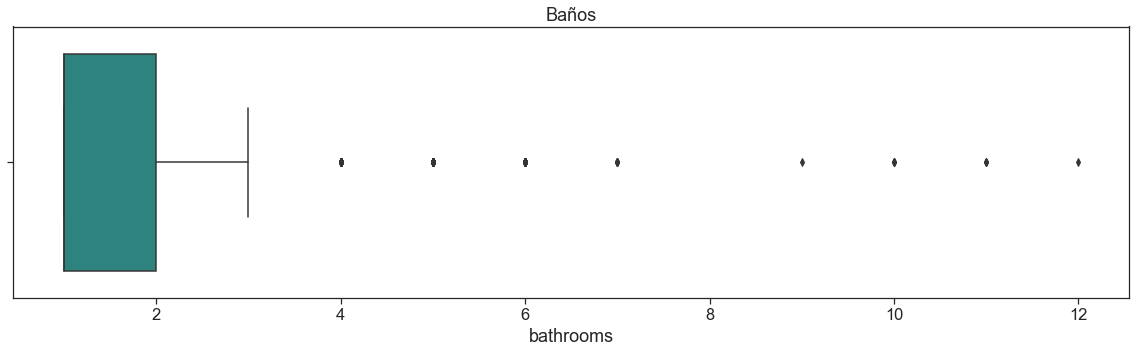

count    76016.000000
mean         1.523758
std          0.796254
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         12.000000
Name: bathrooms, dtype: float64

In [101]:
# Ahora voy a estudiar la distribución de valores para la variable bathrooms (baños)
plt.figure(figsize=(20,5)) 
sns.boxplot(data = filtro_9, x = 'bathrooms', palette = "viridis")
plt.title('Baños')
plt.show()
filtro_9.bathrooms.describe()

Como se puede ver en el gráfico hay 8 outliers con valores superiores a 3 baños así que tomaré este valor como valor de corte. Por otro lado, es importante destacar que el valor más extremo de los outliers (14) no es suficientemente extremo como para aplastar el gráfico hacia la izquierda. A continuación voy a eliminar los datos outliers. 

count    73817.000000
mean         1.442771
std          0.643961
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: bathrooms, dtype: float64

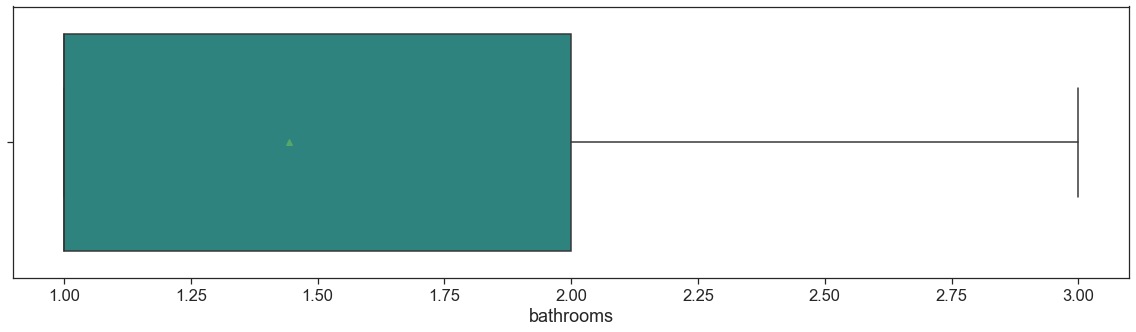

In [102]:
filtro_10= filtro_9[(filtro_9['bathrooms'] <= 3)]

plt.figure(figsize=(20,5))

sns.boxplot(data=filtro_10, x='bathrooms', showmeans=True, palette = "viridis")

filtro_10.bathrooms.describe()

In [103]:
#Luego de realizar todos los filtrados para eliminar outliers visualizo la cantidad de instancias y columnas
filtro_10.shape

(73817, 15)

In [104]:
#Instancias por variable.
filtro_10.count()

start_date         73817
end_date           73817
created_on         73817
l2                 73817
l3                 73817
rooms              73817
bedrooms           73817
bathrooms          73817
surface_total      73817
surface_covered    73817
price              73817
currency           73817
property_type      73817
operation_type     73817
Sup_correg         73817
dtype: int64

In [105]:
# Veo si hay valores nulos
print(filtro_10.isnull().sum())

start_date         0
end_date           0
created_on         0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
property_type      0
operation_type     0
Sup_correg         0
dtype: int64


Como podemos ver, al filtrar los outliers, también filtramos las instancias con datos faltantes.

In [106]:
filtro_10.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Sup_correg
count,73817.000000,73817.000000,73817.000000,73817.000000,73817.000000,7.381700e+04,73817.000000
mean,2.903721,1.920994,1.442771,87.982538,75.716976,2.306370e+05,12.265562
std,1.140864,0.934329,0.643961,63.362428,49.475345,1.922699e+05,26.989268
min,1.000000,0.000000,1.000000,14.000000,14.000000,3.300000e+04,0.000000
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.220000e+05,0.000000
50%,3.000000,2.000000,1.000000,70.000000,61.000000,1.750000e+05,5.000000
75%,4.000000,3.000000,2.000000,103.000000,90.000000,2.650000e+05,10.000000
max,7.000000,6.000000,3.000000,980.000000,891.000000,2.000000e+06,853.000000


**BÚSQUEDA Y ELIMINACIÓN DE OUTLIERS POR OTROS MÉTODOS**

**Local Outlier Factor (LOF)**

In [107]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

In [108]:
Prop2.shape # Comenzamos a partir del dataframe Prop2 al igual que en el filtrado y correción manual. 

(87158, 14)

In [109]:
# Veo si hay valores nulos
print(Prop2.isnull().sum())

start_date            0
end_date              0
created_on            0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1995
surface_total      7859
surface_covered    8161
price                 0
currency              0
property_type         0
operation_type        0
dtype: int64


In [110]:
#Debo eliminar los valores nulos para poder aplicar este modelo

Prop_sin_nan= Prop2.dropna() 

In [111]:
Prop_sin_nan.shape

(77981, 14)

In [112]:
# Elimino las comlumnas con datos categóricos
prop_numerico= Prop_sin_nan.drop(['start_date', 'end_date', 'created_on', 'l2', 'l3', 'currency', 'property_type', 'operation_type'], axis = 1)
prop_numerico.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [113]:
# APLICO EL MODELO
#Setting up the model. K is set by passing the n_neighbors parameter with integer. 20 is often considered good already to detect an outlier. By default the distance metric is Euclidean distance.
lof = LocalOutlierFactor(n_neighbors = 20)
#Training the model, I drop few columns that was not a continuous variable
prop_numerico['lof'] = lof.fit_predict(prop_numerico)
#Getting the negative LOF score
prop_numerico['negative_outlier_factor'] = lof.negative_outlier_factor_
prop_numerico

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,lof,negative_outlier_factor
0,7.0,7.0,2.0,140.0,140.0,153000.0,-1,-3.782141e+00
1,2.0,1.0,2.0,70.0,58.0,159000.0,1,-1.432182e+00
2,2.0,1.0,1.0,45.0,45.0,125000.0,1,-1.000000e+00
3,2.0,1.0,1.0,85.0,50.0,295000.0,-1,-1.162851e+11
5,2.0,1.0,1.0,56.0,56.0,150000.0,1,-1.022114e+00
...,...,...,...,...,...,...,...,...
146551,4.0,3.0,2.0,103.0,98.0,660000.0,1,-1.078122e+00
146552,4.0,2.0,3.0,159.0,98.0,539000.0,-1,-1.893390e+01
146554,4.0,3.0,3.0,175.0,111.0,570000.0,-1,-1.642544e+00
146555,3.0,2.0,2.0,144.0,134.0,480000.0,1,-1.207960e+00


Reduje 13 columnas y las filas son las mismas luego de reducir las instacias con datos nulos.
Veo cuantos outliers detectó el método (lof= -1)

In [114]:
outliers= prop_numerico[(prop_numerico['lof'] <= -1)] 
outliers.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,lof,negative_outlier_factor
0,7.0,7.0,2.0,140.0,140.0,153000.0,-1,-3.782141e+00
3,2.0,1.0,1.0,85.0,50.0,295000.0,-1,-1.162851e+11
6,2.0,1.0,1.0,70.0,70.0,159500.0,-1,-9.192388e+09
37,2.0,1.0,1.0,39.0,39.0,120000.0,-1,-6.556817e+09
63,2.0,1.0,1.0,57.0,46.0,196100.0,-1,-2.489369e+00


In [115]:
outliers.shape # El número de filas es igual al número de outliers

(17488, 8)

In [116]:
sin_outliers= prop_numerico[(prop_numerico['lof'] >= 1)] # Filtro los outliers y veo cuantas instancia me quedan 
sin_outliers.shape

(60493, 8)

In [117]:
sin_outliers.describe() # Verifico si el método filtró los valores extremos

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,lof,negative_outlier_factor
count,60493.000000,60493.000000,60493.000000,60493.000000,60493.000000,6.049300e+04,60493.0,60493.000000
mean,2.978989,1.974691,1.523747,89.462847,79.142132,2.578913e+05,1.0,-1.067132
std,1.221246,0.991052,0.810228,67.111549,55.957322,2.994079e+05,0.0,0.118029
min,1.000000,0.000000,1.000000,13.000000,13.000000,2.550000e+04,1.0,-1.499984
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05,1.0,-1.098397
50%,3.000000,2.000000,1.000000,69.000000,62.000000,1.750000e+05,1.0,-1.009102
75%,4.000000,3.000000,2.000000,105.000000,94.000000,2.790000e+05,1.0,-0.997947
max,18.000000,12.000000,11.000000,2000.000000,1400.000000,6.000000e+06,1.0,-0.892969


Lo que se puede observar del resumen estadístico es que este método se acerca mucho al filtrado realizado a mano para las variables "surface_total", "surface_covered" y "price" pero deja valores máximos extremos para las variables "rooms","bedrooms" y "bathrooms". La cantidad de instancias del dataset filtrado a mano es de 73817, con valores máximos y mínimos cercanso a la media, sin embargo, cuando aplicamos el método LOF, quedan 60493 (menos información) con valores máximos y mínimos alejados de la media. En conclusión, por los motivos mensionados anteriormente el filtrado a mano es mejor que método LOF. A continuación voy a detectar y filtrar outliers por el método de Z-Score o 3 sigmas.

**Método Z-Score para remoción de outliers**

Indica qué tan lejos están los datos de la desviación estándar. Se calcula restando la media de los datos a cada dato y dividiéndolo por la desviación estándar. Los datos que cae fuera de 3 desviaciones estándar son considerados outliers.

In [118]:
Prop2.shape # Chequeo la forma del dataframe con el que venia trabajando 

(87158, 14)

**Habitaciones**

In [119]:
from scipy import stats # importamos el paquete estadístico que nos permite calcular el Z-Score desde la librería Scipy
z=np.abs(stats.zscore(Prop2.rooms)) #Calculo en el Z-Score
print(z) #Imprimo algunos valores

[3.04187005 0.73703309 0.73703309 ... 0.77452816 0.01874754 0.77452816]


In [120]:
df=Prop2[(z< 3)] # Establesco 3 desviaciones estandares para filtrar a los outliers. Los valores más alla de 3 dev. stand. son consideredos outlier.
df.describe() # Veo cuantas instancias me quedaron en esa variable y si se modificó el valor máximo. 

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,85801.000000,85801.000000,83823.000000,77982.000000,77683.000000,8.580100e+04
mean,2.895502,1.916633,1.531250,109.707368,92.387022,2.505259e+05
std,1.147680,0.973511,0.818004,1008.260780,800.315573,3.018781e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,70.000000,62.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,108.000000,94.000000,2.700000e+05
max,6.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


**Se filtraron las 1357 instancias detectadas como outliers por Z-Score en la  variable rooms**

**Dormitorios**

In [121]:
from scipy import stats # importamos el paquete estadístico que nos permite calcular el Z-Score desde la librería Scipy
z1=np.abs(stats.zscore(df.bedrooms))  #Calculo en el Z-Score
print(z1) #Imprimo algunos valores

[0.94157961 0.94157961 0.94157961 ... 1.11285209 0.08563624 0.08563624]


In [122]:
df1=df[(z1< 3)] # Establesco 3 desviaciones estandares para filtrar a los outliers. Los valores más alla de 3 dev. stand. son consideredos outlier.
df1.describe()  # Veo cuantas instancias me quedaron en esa variable y si se modificó el valor máximo. 

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,85246.000000,85246.000000,83283.000000,77490.000000,77196.000000,8.524600e+04
mean,2.876065,1.895878,1.521751,108.657143,91.487176,2.483945e+05
std,1.125070,0.940408,0.805615,1011.309257,802.706777,2.985788e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,70.000000,62.000000,1.738500e+05
75%,4.000000,3.000000,2.000000,107.000000,93.000000,2.700000e+05
max,6.000000,4.000000,14.000000,126062.000000,126062.000000,3.243423e+07


**Se filtraron las 555 instancias detectadas como outliers por Z-Score en la  variable bedrooms**

**Baños**

In [123]:
from scipy import stats
z2=np.abs(stats.zscore(df1.bathrooms))
print(z2)

[nan nan nan ... nan nan nan]


Los datos faltantes me impiden calcular el Z-Score

In [124]:
print(df1.isnull().sum())

start_date            0
end_date              0
created_on            0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1963
surface_total      7756
surface_covered    8050
price                 0
currency              0
property_type         0
operation_type        0
dtype: int64


In [125]:
df2=df1.dropna()

In [126]:
print(df2.isnull().sum())

start_date         0
end_date           0
created_on         0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
property_type      0
operation_type     0
dtype: int64


In [127]:
from scipy import stats
z3=np.abs(stats.zscore(df2.bathrooms))
print(z3)

[0.60842625 0.64516148 0.64516148 ... 1.86201397 0.60842625 0.60842625]


In [128]:
df3=df2[(z3< 3)]
df3.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,74059.000000,74059.000000,74059.000000,74059.000000,74059.000000,7.405900e+04
mean,2.868713,1.893436,1.434235,105.435666,88.406109,2.317301e+05
std,1.087347,0.890164,0.639285,1033.694351,818.737864,2.224382e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,48.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,69.000000,60.000000,1.725000e+05
75%,4.000000,3.000000,2.000000,102.000000,90.000000,2.650000e+05
max,6.000000,4.000000,3.000000,126062.000000,126062.000000,6.500000e+06


**Se filtraron las 4400 instancias  de las cuales 1963 son datos flatantes y 2437 son outliers detectados por Z-Score en la  variable bathrooms**

**Superficie total**

In [129]:
from scipy import stats # importamos el paquete estadístico que nos permite calcular el Z-Score desde la librería Scipy
z4=np.abs(stats.zscore(df3.surface_total))  #Calculo en el Z-Score
print(z4) #Imprimo algunos valores

[0.03428083 0.0584661  0.01976968 ... 0.06729727 0.03730754 0.20466955]


In [130]:
df4=df3[(z4< 2.6)] # Establesco 3 desviaciones estandares para filtrar a los outliers. Los valores más alla de 3 dev. stand. son consideredos outlier.

df4.describe()  # Veo cuantas instancias me quedaron en esa variable y si se modificó el valor máximo. 

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,73943.000000,73943.000000,73943.000000,73943.000000,73943.000000,7.394300e+04
mean,2.869048,1.893675,1.434564,86.879840,77.690153,2.318195e+05
std,1.087444,0.890217,0.639434,66.384998,158.629156,2.225424e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,48.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,69.000000,60.000000,1.730000e+05
75%,4.000000,3.000000,2.000000,102.000000,90.000000,2.650000e+05
max,6.000000,4.000000,3.000000,2773.000000,17220.000000,6.500000e+06


**Tuve que ajustar el umbral a 2.6 para obtener un valor similar al obtenido al filtrar a mano. Se filtraron las 116 instancias detectadas como outliers por Z-Score en la variable surface total**

**Voy a filtrar los valores mínimos**

In [131]:
from scipy import stats # importamos el paquete estadístico que nos permite calcular el Z-Score desde la librería Scipy
zmin=np.abs(stats.zscore(df4.surface_total))  #Calculo en el Z-Score
print(zmin) #Imprimo algunos valores

[0.25427362 0.63086727 0.02831743 ... 1.32741972 0.86044359 3.46647167]


In [132]:
dfmin=df4[(zmin> -3)] # Establesco 3 desviaciones estandares para filtrar a los outliers. Los valores más alla de 3 dev. stand. son consideredos outlier.

dfmin.describe()  # Veo cuantas instancias me quedaron en esa variable y si se modificó el valor máximo. 

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,73943.000000,73943.000000,73943.000000,73943.000000,73943.000000,7.394300e+04
mean,2.869048,1.893675,1.434564,86.879840,77.690153,2.318195e+05
std,1.087444,0.890217,0.639434,66.384998,158.629156,2.225424e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,48.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,69.000000,60.000000,1.730000e+05
75%,4.000000,3.000000,2.000000,102.000000,90.000000,2.650000e+05
max,6.000000,4.000000,3.000000,2773.000000,17220.000000,6.500000e+06


**No funcinó para filtrar los outliers de valores mínimos, voy aprobar con un umbral más bajo**

In [133]:
dfmin=df4[(zmin> -1)] # Establesco 3 desviaciones estandares para filtrar a los outliers. Los valores más alla de 3 dev. stand. son consideredos outlier.

dfmin.describe()  # Veo cuantas instancias me quedaron en esa variable y si se modificó el valor máximo. 

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,73943.000000,73943.000000,73943.000000,73943.000000,73943.000000,7.394300e+04
mean,2.869048,1.893675,1.434564,86.879840,77.690153,2.318195e+05
std,1.087444,0.890217,0.639434,66.384998,158.629156,2.225424e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,48.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,69.000000,60.000000,1.730000e+05
75%,4.000000,3.000000,2.000000,102.000000,90.000000,2.650000e+05
max,6.000000,4.000000,3.000000,2773.000000,17220.000000,6.500000e+06


**No funcinó, voy aplicar el método de los 3 sigmas para filtrar los outliers de valores mínimos**

In [134]:
lower = df4.surface_total.mean() -1.1*df4.surface_total.std()

In [135]:
new_df= df4[df4.surface_total>lower]
new_df.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,73933.000000,73933.000000,73933.000000,73933.000000,73933.000000,7.393300e+04
mean,2.869098,1.893715,1.434583,86.890036,77.692046,2.318260e+05
std,1.087444,0.890222,0.639454,66.383697,158.639275,2.225519e+05
min,1.000000,0.000000,1.000000,14.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,48.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,69.000000,60.000000,1.730000e+05
75%,4.000000,3.000000,2.000000,102.000000,90.000000,2.650000e+05
max,6.000000,4.000000,3.000000,2773.000000,17220.000000,6.500000e+06


**Tuve que ajustar el umbral a -1.1 para obtener un valor similar al obtenido al filtrar a mano. Se filtraron las 10 instancias detectadas como outliers por Z-Score en la variable surface total**

**Superficie cubierta**

In [136]:
from scipy import stats # importamos el paquete estadístico que nos permite calcular el Z-Score desde la librería Scipy
z5=np.abs(stats.zscore(new_df.surface_covered))  #Calculo en el Z-Score
print(z5) #Imprimo algunos valores

[0.1241318  0.20607927 0.17456101 ... 0.20996175 0.35494574 0.41167861]


In [137]:
df5=new_df[(z5< 3)] # Establesco 3 desviaciones estandares para filtrar a los outliers. Los valores más alla de 3 dev. stand. son consideredos outlier.

df5.describe()  # Veo cuantas instancias me quedaron en esa variable y si se modificó el valor máximo. 

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,73874.000000,73874.000000,73874.000000,73874.000000,73874.000000,7.387400e+04
mean,2.868736,1.893548,1.434388,86.520210,74.610864,2.311901e+05
std,1.086951,0.890137,0.639239,61.576004,47.384355,2.147300e+05
min,1.000000,0.000000,1.000000,14.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,48.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,69.000000,60.000000,1.730000e+05
75%,4.000000,3.000000,2.000000,102.000000,89.000000,2.650000e+05
max,6.000000,4.000000,3.000000,1660.000000,550.000000,4.900000e+06


**Se filtraron las 59 instancias detectadas como outliers por Z-Score en la  variable surface_covered. Este filtrado también afecta el valor máximo de la variable surface_covered**

**Voy a filtrar los outliers con valores mínimos**

In [138]:
lower = df5.surface_covered.mean() -1.3*df5.surface_covered.std()

In [139]:
new_df1= df5[df5.surface_covered>lower]
new_df1.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,73849.000000,73849.000000,73849.000000,73849.000000,73849.000000,7.384900e+04
mean,2.868813,1.893594,1.434400,86.522025,74.634849,2.311981e+05
std,1.086929,0.890098,0.639241,61.578544,47.374418,2.147486e+05
min,1.000000,0.000000,1.000000,14.000000,14.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,48.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,69.000000,60.000000,1.730000e+05
75%,4.000000,3.000000,2.000000,102.000000,89.000000,2.650000e+05
max,6.000000,4.000000,3.000000,1660.000000,550.000000,4.900000e+06


**Tuve que ajustar el umbral a -1.3 para obtener un valor similar al obtenido al filtrar a mano. Se filtraron las 25 instancias detectadas como outliers por Z-Score en la variable surface total**

**Precio**

In [140]:
from scipy import stats # importamos el paquete estadístico que nos permite calcular el Z-Score desde la librería Scipy
z6=np.abs(stats.zscore(new_df1.price))  #Calculo en el Z-Score
print(z6) #Imprimo algunos valores

[0.33620065 0.49452637 0.29710226 ... 1.57767799 1.15858048 1.39141243]


In [141]:
df6=new_df1[(z6< 8.5)] # Establesco 3 desviaciones estandares para filtrar a los outliers. Los valores más alla de 3 dev. stand. son consideredos outlier.

df6.describe()  # Veo cuantas instancias me quedaron en esa variable y si se modificó el valor máximo. 

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,73725.000000,73725.000000,73725.000000,73725.000000,73725.000000,7.372500e+04
mean,2.865948,1.891638,1.432011,86.097579,74.263655,2.268609e+05
std,1.084878,0.889272,0.636867,60.647670,46.464791,1.854135e+05
min,1.000000,0.000000,1.000000,14.000000,14.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,48.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,69.000000,60.000000,1.720000e+05
75%,4.000000,3.000000,2.000000,102.000000,89.000000,2.630000e+05
max,6.000000,4.000000,3.000000,1660.000000,550.000000,2.000000e+06


**Para llegar al valor máximo seleccionado a mano tengo que extenderme hasta 8.5 desviaciones estandar. Se filtraron las 124 instancias detectadas como outliers por Z-Score en la  variable surface_covered**

**Voy a filtrar los outliers con valores mínimos**

In [142]:
lower = df6.price.mean() -1.05*df6.price.std()

In [143]:
new_df2= df6[df6.price>lower]
new_df2.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,73689.000000,73689.000000,73689.000000,73689.000000,73689.000000,7.368900e+04
mean,2.866412,1.891870,1.432113,86.104208,74.273745,2.269600e+05
std,1.084647,0.889299,0.636876,60.630879,46.458693,1.854045e+05
min,1.000000,0.000000,1.000000,14.000000,14.000000,3.300000e+04
25%,2.000000,1.000000,1.000000,48.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,69.000000,60.000000,1.720000e+05
75%,4.000000,3.000000,2.000000,102.000000,89.000000,2.635500e+05
max,6.000000,4.000000,3.000000,1660.000000,550.000000,2.000000e+06


**Tuve que ajustar el umbral a -1.05 para obtener un valor similar al obtenido al filtrar a mano. Se filtraron las 36 instancias detectadas como outliers por Z-Score en la variable surface total**

CONCLUSIÓN FINAL DE LOS MÉTODOS PARA DETECTAR Y FILTRAR OUTLIERS

Z-SCORE:El método de Z-score funciona bien para las varibles que tienen valores bajos y desviación estandar baja, para valores de 3 cifras o màs y con mucha variación en los datos (desviación estandar alta) no funciona bien. Si mi objetivo es tener ciertos valores máximos y míminos, quizás no es el mejor método, ya que para llegar a esos valores hay que probar varios valores de umbral de desviación estandar. Además, hay que aplicar el umbral variable por variable, lo cual lleva bastante tiempo. Por otro lado, no puede filtrar los valores mínimos con este método, tuve que aplicar el método de las 3 sigma. Un problema de este método es que el filtrar por variable me cambian los valores min y max de otras variables. 

Local Outlier Factor (LOF): Este método mostró funcionar mejor para varibles con valores muy extremos, con mucha variabilidad (desviación estandar alta). Tiene la ventaja que permite ahorrar mucho tiempo de procesamiento de datos manual, es más automático. Creo que es una buena opción para cuando tengo un dataset con muchas variables que no conozco mucho. Si tengo un dataset donde conozco bien las variables y se que valores quiero filtrar podría hacer una primera aproximación con este metodo y puedo terminar de ajustar las variables manualmente, esto me ahorarría tiempo, ya que algunas variables quedarían bien filtradas luego de aplicar LOF y no sería necesario filtrarlas a mano. 

En cuanto a la información que se pierde en filtrado de outliers es similar para el filtrado a mano (13341) y para el método de Z-Score (13346) y mayor con el método LOF (26665).

Para el proyecto voy a continuar con el resultado del filtrado manual utilizando los boxpplots. 

**CORRELACIONES**

7. Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [144]:
# Para hacer las correlaciones voy a eliminar la columna Sup_correg la cual no aporta información. 
Prop6 =filtro_10.drop(['Sup_correg'], axis=1)

Prop6.head(5)

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,PH,Venta


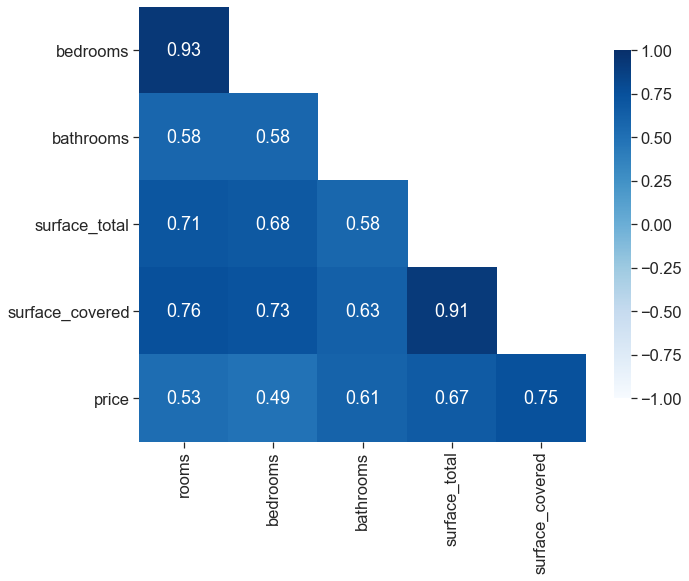

In [145]:
# Importo las librerías necesarias para realizar la matriz de correlaciones y graficarla a través de un heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
# Realizo las correlaciones y genero una máscara para que el gráfico me muestre los datos por debajo de la diagonal. 
Prop6_corr = Prop6.corr()
np.ones_like(Prop6_corr, dtype=np.bool)
mask = np.triu(np.ones_like(Prop6_corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(10, 8))
# Creo la máscara
mask = np.triu(np.ones_like(Prop6_corr, dtype=np.bool))
# ajusto la máscara al dataframe
mask = mask[1:, :-1]
corr = Prop6_corr.iloc[1:,:-1].copy()
# Grafico la matriz de correlaciones a través de un mapa de calor
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

**CONCLUSIONES:** Lo que podemos observar en este mapa de calor, es que la variable que me interes predecir "Precio" se correlaciona con todas las variables predictoras aunque en mayor magnitud con las variables "surface_covered", "surface_total" y "bathrooms".

**Ahora voy a realizar los filtrados para realizar la  matriz de correlaciones sobre cada tipo de propiedad.** 

In [146]:
Depto=['Departamento'] 
Casa=['Casa'] 
PH=['PH'] 
#Ahora voy aplicar el método ISIN: Este método toma un iterable o una serie u otro dataframe como parámetro 
# y comprueba si existen elementos del dataframe en él. Las filas que se evalúen como verdaderas se consideran para el resultado.  

prop_casa= Prop6[Prop6.property_type.isin(Casa)]
prop_depto= Prop6[Prop6.property_type.isin(Depto)]
prop_PH= Prop6[Prop6.property_type.isin(PH)]

In [147]:
prop_casa.head()


,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
336,2019-03-04,2019-06-09,2019-03-04,Capital Federal,San Cristobal,3.0,1.0,2.0,116.0,116.0,290000.0,USD,Casa,Venta
384,2019-03-04,2019-08-17,2019-03-04,Capital Federal,Mataderos,3.0,2.0,1.0,171.0,120.0,179900.0,USD,Casa,Venta
385,2019-03-04,2019-06-17,2019-03-04,Capital Federal,Villa Pueyrredón,3.0,2.0,1.0,71.0,68.0,174000.0,USD,Casa,Venta
454,2019-03-04,2019-03-13,2019-03-04,Capital Federal,Parque Avellaneda,6.0,5.0,1.0,210.0,189.0,225000.0,USD,Casa,Venta
625,2019-04-25,2019-09-14,2019-04-25,Capital Federal,Saavedra,2.0,1.0,1.0,151.0,108.0,300000.0,USD,Casa,Venta


In [148]:
prop_casa.shape

(1668, 14)

El filtrado se realizó correctamente y veo que hay 14109 casas luego de los filtrados realizados previamente.

In [149]:
prop_depto.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
11,2019-10-17,2019-10-26,2019-10-17,Capital Federal,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,USD,Departamento,Venta
12,2019-10-17,2019-12-19,2019-10-17,Capital Federal,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,USD,Departamento,Venta
20,2019-10-17,2019-10-24,2019-10-17,Capital Federal,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,USD,Departamento,Venta
21,2019-10-17,2019-10-28,2019-10-17,Capital Federal,Abasto,1.0,1.0,1.0,22.0,22.0,48000.0,USD,Departamento,Venta
22,2019-10-17,2019-11-13,2019-10-17,Capital Federal,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,USD,Departamento,Venta


In [150]:
prop_depto.shape

(63319, 14)

El filtrado se realizó correctamente y veo que hay 87280 departamentos luego de los filtrados realizados previamente.

In [151]:
prop_PH.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,PH,Venta


In [152]:
prop_PH.shape

(8830, 14)

El filtrado se realizó correctamente y veo que hay 13567 PHs luego de los filtrados realizados previamente.

**AHORA REALIZO LAS CORRELACIONES PARA CADA TIPO DE PROPIEDAD**

**PH**

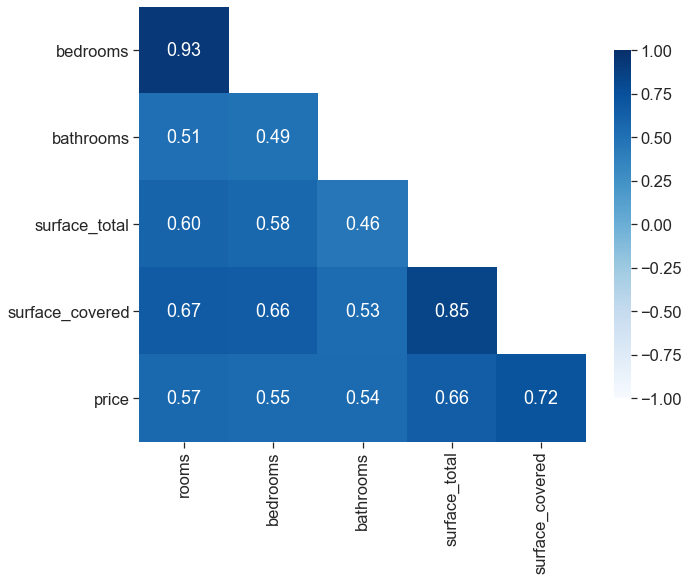

In [153]:
# Importo las librerías necesarias para realizar la matriz de correlaciones y graficarla a través de un heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
# Realizo las correlaciones y genero una máscara para que el gráfico me muestre los datos por debajo de la diagonal. 
prop_PH_corr = prop_PH.corr()
np.ones_like(prop_PH_corr, dtype=np.bool)
mask = np.triu(np.ones_like(prop_PH_corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(10, 8))
# Creo la máscara
mask = np.triu(np.ones_like(prop_PH_corr, dtype=np.bool))
# ajusto la máscara al dataframe
mask = mask[1:, :-1]
corr = prop_PH_corr.iloc[1:,:-1].copy()
# Grafico la matriz de correlaciones a través de un mapa de calor
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

En este caso todas las variables predictoras tienen una correlación por arriba del 0.5 con respecto a la variable precio, sin embargo, la que más correlaciona es la varaible "surface_covered", lo cual lógico ya que por lo general la superficie cubierta es donde está la construcción y esto impacta más significativamente en el precio. 

**DEPARTAMENTO**

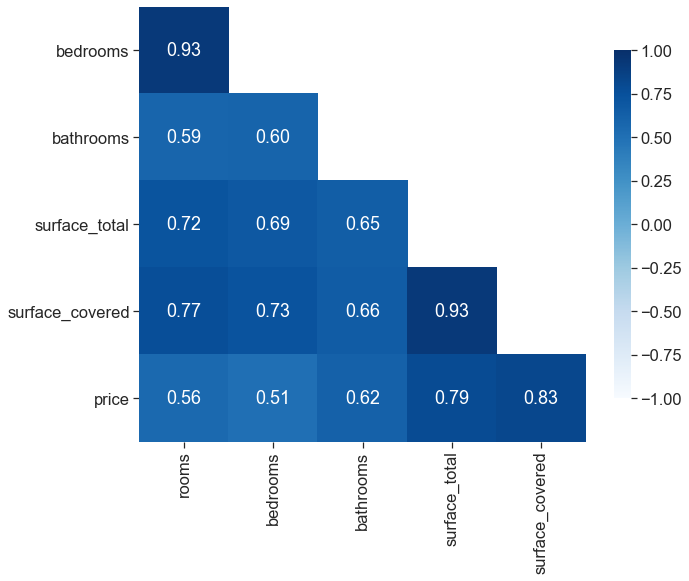

In [154]:
# Importo las librerías necesarias para realizar la matriz de correlaciones y graficarla a través de un heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
# Realizo las correlaciones y genero una máscara para que el gráfico me muestre los datos por debajo de la diagonal. 
prop_depto_corr = prop_depto.corr()
np.ones_like(prop_depto_corr, dtype=np.bool)
mask = np.triu(np.ones_like(prop_depto_corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(10, 8))
# Creo la máscara
mask = np.triu(np.ones_like(prop_depto_corr, dtype=np.bool))
# ajusto la máscara al dataframe
mask = mask[1:, :-1]
corr = prop_depto_corr.iloc[1:,:-1].copy()
# Grafico la matriz de correlaciones a través de un mapa de calor
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

En este caso todas las variables predictoras tienen una correlación por arriba del 0.5 con respecto a la variable precio, sin embargo, al igual que la correlación con PHs la que más correlaciona es la varaible "surface_covered" con una correlación más alta en este caso y, además, cobran más importancia las variables "surface_total" y "bathrooms".

**CASA**

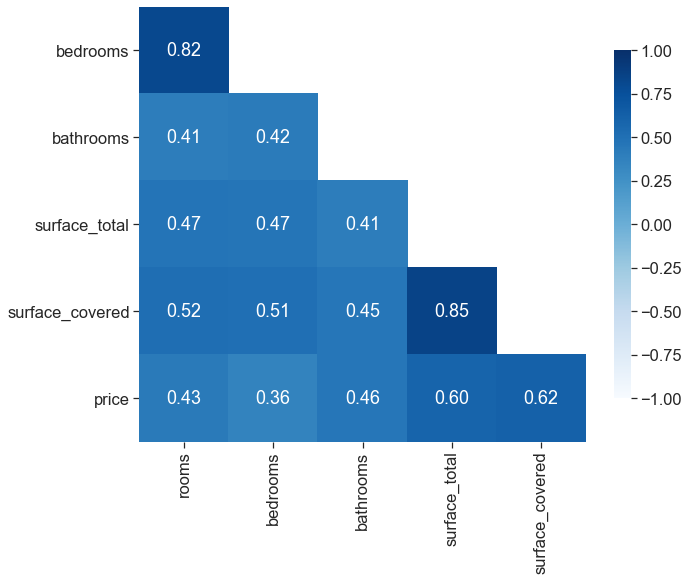

In [155]:
# Importo las librerías necesarias para realizar la matriz de correlaciones y graficarla a través de un heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
# Realizo las correlaciones y genero una máscara para que el gráfico me muestre los datos por debajo de la diagonal. 
prop_casa_corr = prop_casa.corr()
np.ones_like(prop_casa_corr, dtype=np.bool)
mask = np.triu(np.ones_like(prop_casa_corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(10, 8))
# Creo la máscara
mask = np.triu(np.ones_like(prop_casa_corr, dtype=np.bool))
# ajusto la máscara al dataframe
mask = mask[1:, :-1]
corr = prop_casa_corr.iloc[1:,:-1].copy()
# Grafico la matriz de correlaciones a través de un mapa de calor
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

Llamativamente en este caso las variables predictoras pierden influencia en el precio de este tipo de propiedad. Solo destacan con una correlanción por arriba de 0.5 las variables "bathrooms" y "surface_covered". 

**TABLA**

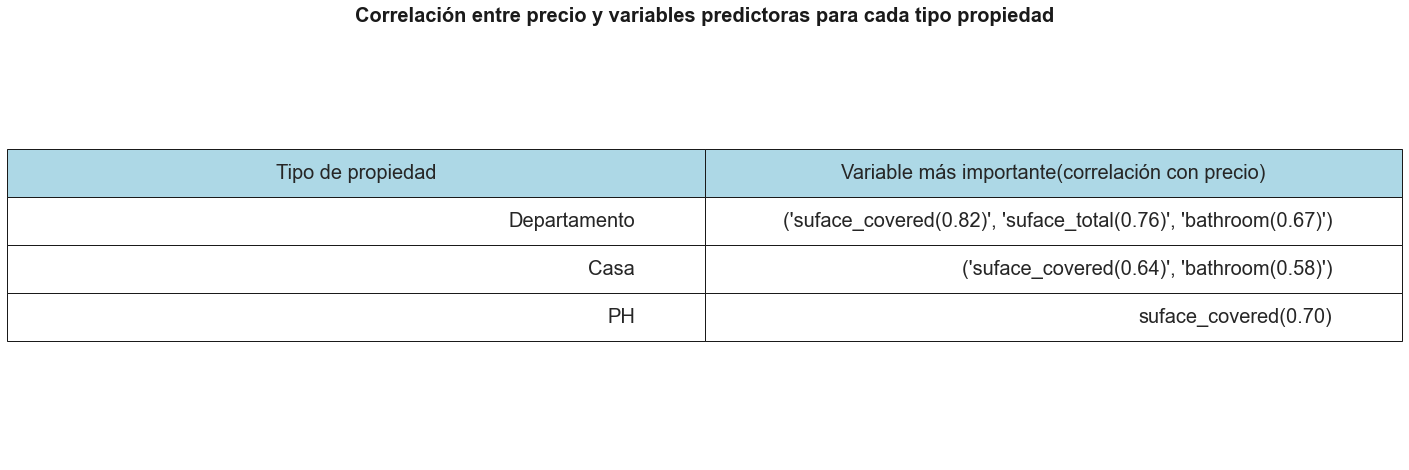

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,8))

data=[['Departamento', ('suface_covered(0.82)', 'suface_total(0.76)', 'bathroom(0.67)')],
      ['Casa', ('suface_covered(0.64)', 'bathroom(0.58)')],
      ['PH', 'suface_covered(0.70)']]
column_labels=['Tipo de propiedad', 'Variable más importante(correlación con precio)']
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values,
        colLabels=df.columns,       
        colColours =["lightblue"] * 3,
        loc="center")

table.scale(1, 4)
table.set_fontsize(20)
ax.axis('off')
title = "Correlación entre precio y variables predictoras para cada tipo propiedad"
ax.set_title(f'{title}', weight='bold', size=20, color='k')

plt.savefig("demo_table.png", dpi=200, bbox_inches='tight')
plt.show()

In [157]:
#Voy a chequear que no hayan quedado valores nulos.
print(Prop6.isnull().sum())

start_date         0
end_date           0
created_on         0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
property_type      0
operation_type     0
dtype: int64


**Para poder generar un modelo de clasificación por árbol de decisión voy a dividir los precios de las propiedades en rangos. Pero antes voy a eliminar las columnas que no aportan a la predicción del precio de la propiedad**

In [158]:
Prop7 = Prop6.drop(['start_date', 'end_date',	'created_on', 'l2',	'l3',	'currency',	'property_type', 'operation_type'], axis=1)
Prop7.head(5)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
6,2.0,1.0,1.0,70.0,70.0,159500.0


In [159]:
Prop7['Price_range'] = '320001-640000'
Prop7.loc[(Prop7['price'] > 33000) & (Prop7['price'] <= 80000), 'Price_range'] = '33000-80000'
Prop7.loc[(Prop7['price'] > 80000) & (Prop7['price'] <= 160000),'Price_range'] = '80001-1600000'
Prop7.loc[(Prop7['price'] > 160000) & (Prop7['price'] <= 320000), 'Price_range'] = '160001-320000'
Prop7.loc[(Prop7['price'] > 640000) & (Prop7['price'] <= 2000000), 'Price_range'] = '640001-2000000'

**Cuento cuantas propiedades quedan incluidas en estos rangos**

In [160]:
Prop7['Price_range'].value_counts()

80001-1600000     28913
160001-320000     28280
320001-640000      9706
33000-80000        4088
640001-2000000     2830
Name: Price_range, dtype: int64

**En pocentaje**

In [161]:
(Prop7['Price_range'].value_counts(normalize=True)*100)

80001-1600000     39.168484
160001-320000     38.310958
320001-640000     13.148733
33000-80000        5.538020
640001-2000000     3.833805
Name: Price_range, dtype: float64

**Como podemos ver el 74% de las propiedades tiene un precio entre 80 mil y 320 mil dolares**

**Voy a eliminar el rango de precios para propiedades entre 640 mil y 2 millones de dolares ya que este grupo de propiedades no es representativo del total (4 %). También voy a filtrar por precios menor igual a 33 mil dolares.**

In [162]:
Prop7['Price_range'] = '320001-640000'
Prop7.loc[(Prop7['price'] > 33000) & (Prop7['price'] <= 80000), 'Price_range'] = '33000-80000'
Prop7.loc[(Prop7['price'] > 80000) & (Prop7['price'] <= 160000),'Price_range'] = '80001-1600000'
Prop7.loc[(Prop7['price'] > 160000) & (Prop7['price'] <= 320000), 'Price_range'] = '160001-320000'


In [163]:
#Vuelvo a ver como quedaron los porcentajes
(Prop7['Price_range'].value_counts(normalize=True)*100)

80001-1600000    39.168484
160001-320000    38.310958
320001-640000    16.982538
33000-80000       5.538020
Name: Price_range, dtype: float64

In [164]:
#Chequeo como quedó el dataframe
Prop7.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Price_range
1,2.0,1.0,2.0,70.0,58.0,159000.0,80001-1600000
2,2.0,1.0,1.0,45.0,45.0,125000.0,80001-1600000
3,2.0,1.0,1.0,85.0,50.0,295000.0,160001-320000
5,2.0,1.0,1.0,56.0,56.0,150000.0,80001-1600000
6,2.0,1.0,1.0,70.0,70.0,159500.0,80001-1600000


In [165]:
#Total de propiedades contenidas en el rango de precios creado
Prop7['Price_range'].shape

(73817,)

In [166]:
#Dataframe original
Prop.shape

(146660, 19)

**Como podemos ver el número de propiedades comprandida en los rangos de precios que establecí representan el 78 % del total de las propiedades del dataset. Teniendo en cuenta que el dataframe Prop contiene filas duplicadas (7901) y nula (21614), si corregimos los porcentajes obtenemos que el rango de precios representa el 97 % de las propiedades.**   

### **En este punto sería interesante hacer un gráfico de pairplot para ver la distribución de las instancias en estos rangos de precios.**

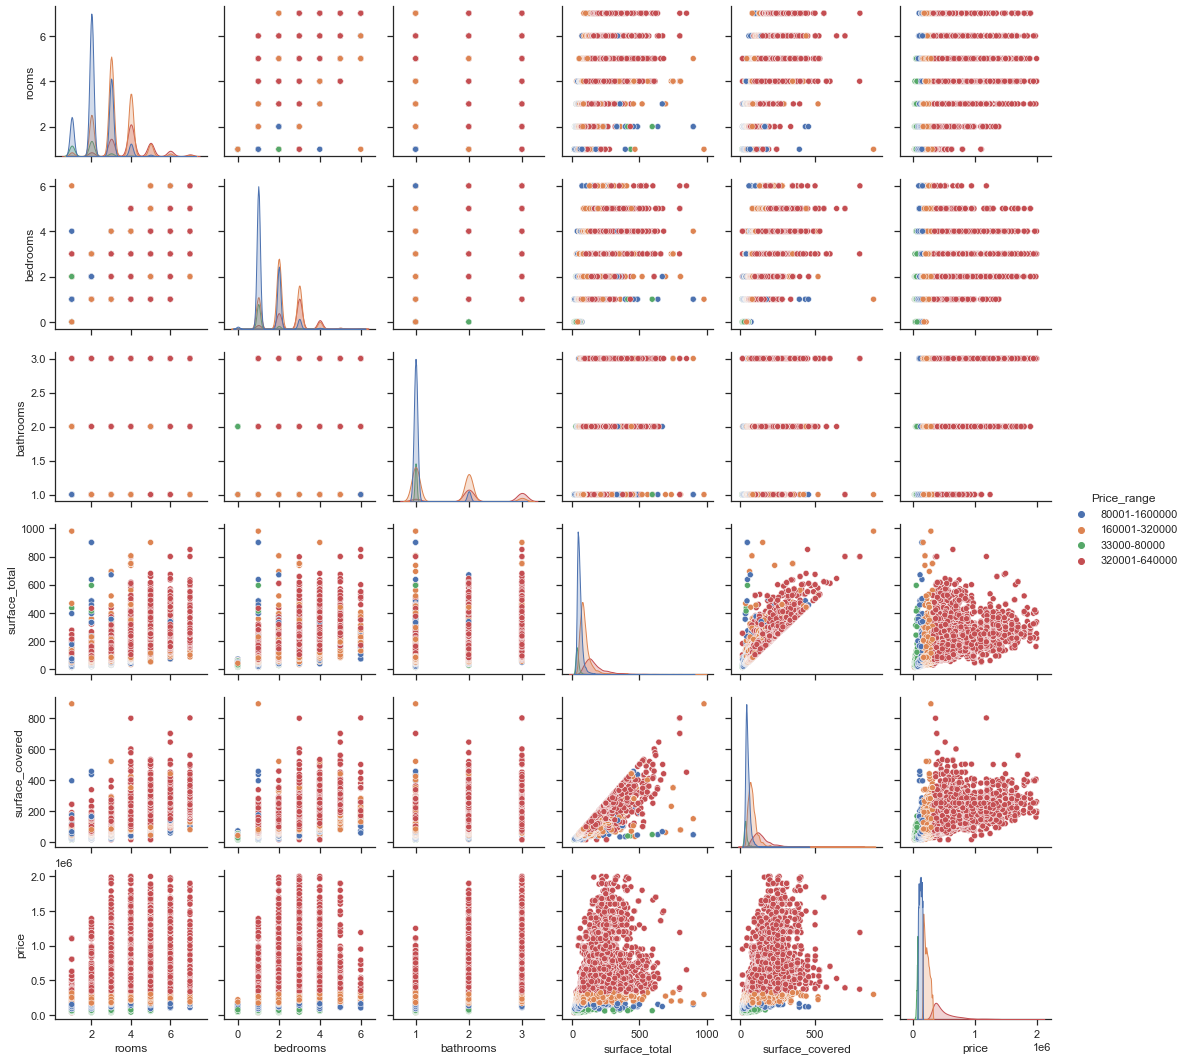

In [167]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(Prop7, hue='Price_range')

**CONCLUSIONES:** En este gráfico de disperción y distribuciones podemos ver lo siguiente (de izquierda a derecha):

El número de ambientes varia entre 1 y 10. La variable rooms pareciera correlacionar bastante bien con la variable bethrooms, lo cual coincide con lo observado en el mapa de calor más arriba. También se observa una correlación entre el número de ambientes. Pareciara haber propiedades de 2 a 10 ambientes en todo el rango de precios, excepto para para las de 1 ambiente las cuales son escasas o nulas a partir de 500 mil dolares. 

En el caso del número de habitaciones, si observamos el historama o densidades pareciera que en esta variable se diferencian mejor los rangos deprecios (picos del gráfico). Lo cual indica que esta variable tiene peso en la determinación del precio de la propiedad. El mayor número de propiedades tiene entre 1 y 6 habitaciones para todo el rango de precios, auque la mayoría se concentra en el rango entre 320 mil y 2 millones de dolares. 

En el caso de los baños puedo decir que la gran mayoría de las propiedades tiene entre 1 y 6 baños. 

En el caso de superficie total es llamativo que los datos comiencen en cero. Voy a ver si por error se cargaron en el dataset propiedades con superficie total igual a cero.



In [168]:
sup0 = Prop7[(Prop7['surface_covered'] >= 0.0) & (Prop7['surface_covered'] <= 0.0)]  
sup0.head(20)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Price_range


In [169]:
sup01 = Prop7[(Prop6['surface_total'] >= 0.0) & (Prop7['surface_total'] <= 0.0)]
sup01.head(20)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Price_range


como podemos ver no hay propiedes con superficie total igual a cero. 

Cuando comparamos con superficie cubierta podemos ver la gran mayoria de las propiedades tiene tiene una superficie cubierta inferior a la superfice total, lo cual es lógico, sin embargo, hay un grupo de propiedades en el coinciden la sup total con la sup cubierta, en el gráfico son los datos que se encuentran en la diagonal. Por último podemos decir que el grupo de propiedades entre 13 y 1000 mtrs2 abarca todo el rango de precios aunque la mayoría se encuentra entre 320 mil y 2 millones de dolares.

Para le caso de la variable superficie cubierta es similar a al analisis para para la variable superficie total. 

# **Modelos de clasificación benchmark para determinar la importancia de las variables predictoras**

En el marco del análsis exploratorio voy a realizar un modelo de predicción por clasificación y determinar según este análisis cuales son las mejores variables predictoras lo cual me aportará al modelo final.

## **Decision Tree**

In [170]:
#Importo las librerias, el tipo de modelo, la métrica, la función de sklearn para separar el dataset en grupo de entrenamientoy testeo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split

# Defino las variables predictoras y la variable a predecir para este modelo. 
X = Prop7.drop(['price','Price_range'], axis=1)
y = Prop7.Price_range
#Defino los grupos de entrenamiento y de testeo, en este caso el 30% de los datos será para testeo y el 70% restante para entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

#Creo el modelo y defino su hiperparámetro, en este caso elijo max_depth=3 para que el modelo sea gráficamente comprensible. 
clf = DecisionTreeClassifier(max_depth=3, random_state = 42) #Creo el objeto Decision Tree classifer 
# Entreno el modelo con los datos de entrenamiento.
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [171]:
#Chequeo la variable a predecir 
y.head()

1    80001-1600000
2    80001-1600000
3    160001-320000
5    80001-1600000
6    80001-1600000
Name: Price_range, dtype: object

In [172]:
# Realizo la predicción sobre el grupo de datos entrenado y testeado.
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

#Imprimola precición o accuracy de cada grupo.
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.6940643687948753
0.6925404136187122


**CONCLUSIONES:** La performance del modelo es baja pero no pareciera haber sobreajuste de datos ya que la precición del modelo es similar para el grupo entrenado y testeado. 

**MATRIZ DE CONFUSIÓN**

La matriz de confusión es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real., o sea en términos prácticos nos permite ver  qué tipos de aciertos y errores está teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos.

In [173]:
#Importo la función para generar la matriz de confusión. 
from sklearn.metrics import confusion_matrix
# Imprimo la matriz de confusión para los datos entrenados y testeados. 
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[13171  2951     4  3684]
 [ 2339  6352     3    37]
 [  105     5  1084  1655]
 [ 4049   210   766 15256]]
[[5564 1326    3 1577]
 [ 981 2799    2   23]
 [  44    1  484  710]
 [1685   67  390 6490]]


**CONCLUSIONES:** En la matriz de confusión se observa que el mayor número de verdaderos positivos se encuentran en los rangos de precios entre 160 mil y 320 mil dolares, y entre 320 mil y 640 mil doalres. Por lo tanto el modelo tendrá mayor precisión para predecir el precio de propiedades que entren dentro de ese rango. 

###**Árbol de decisión graficado**

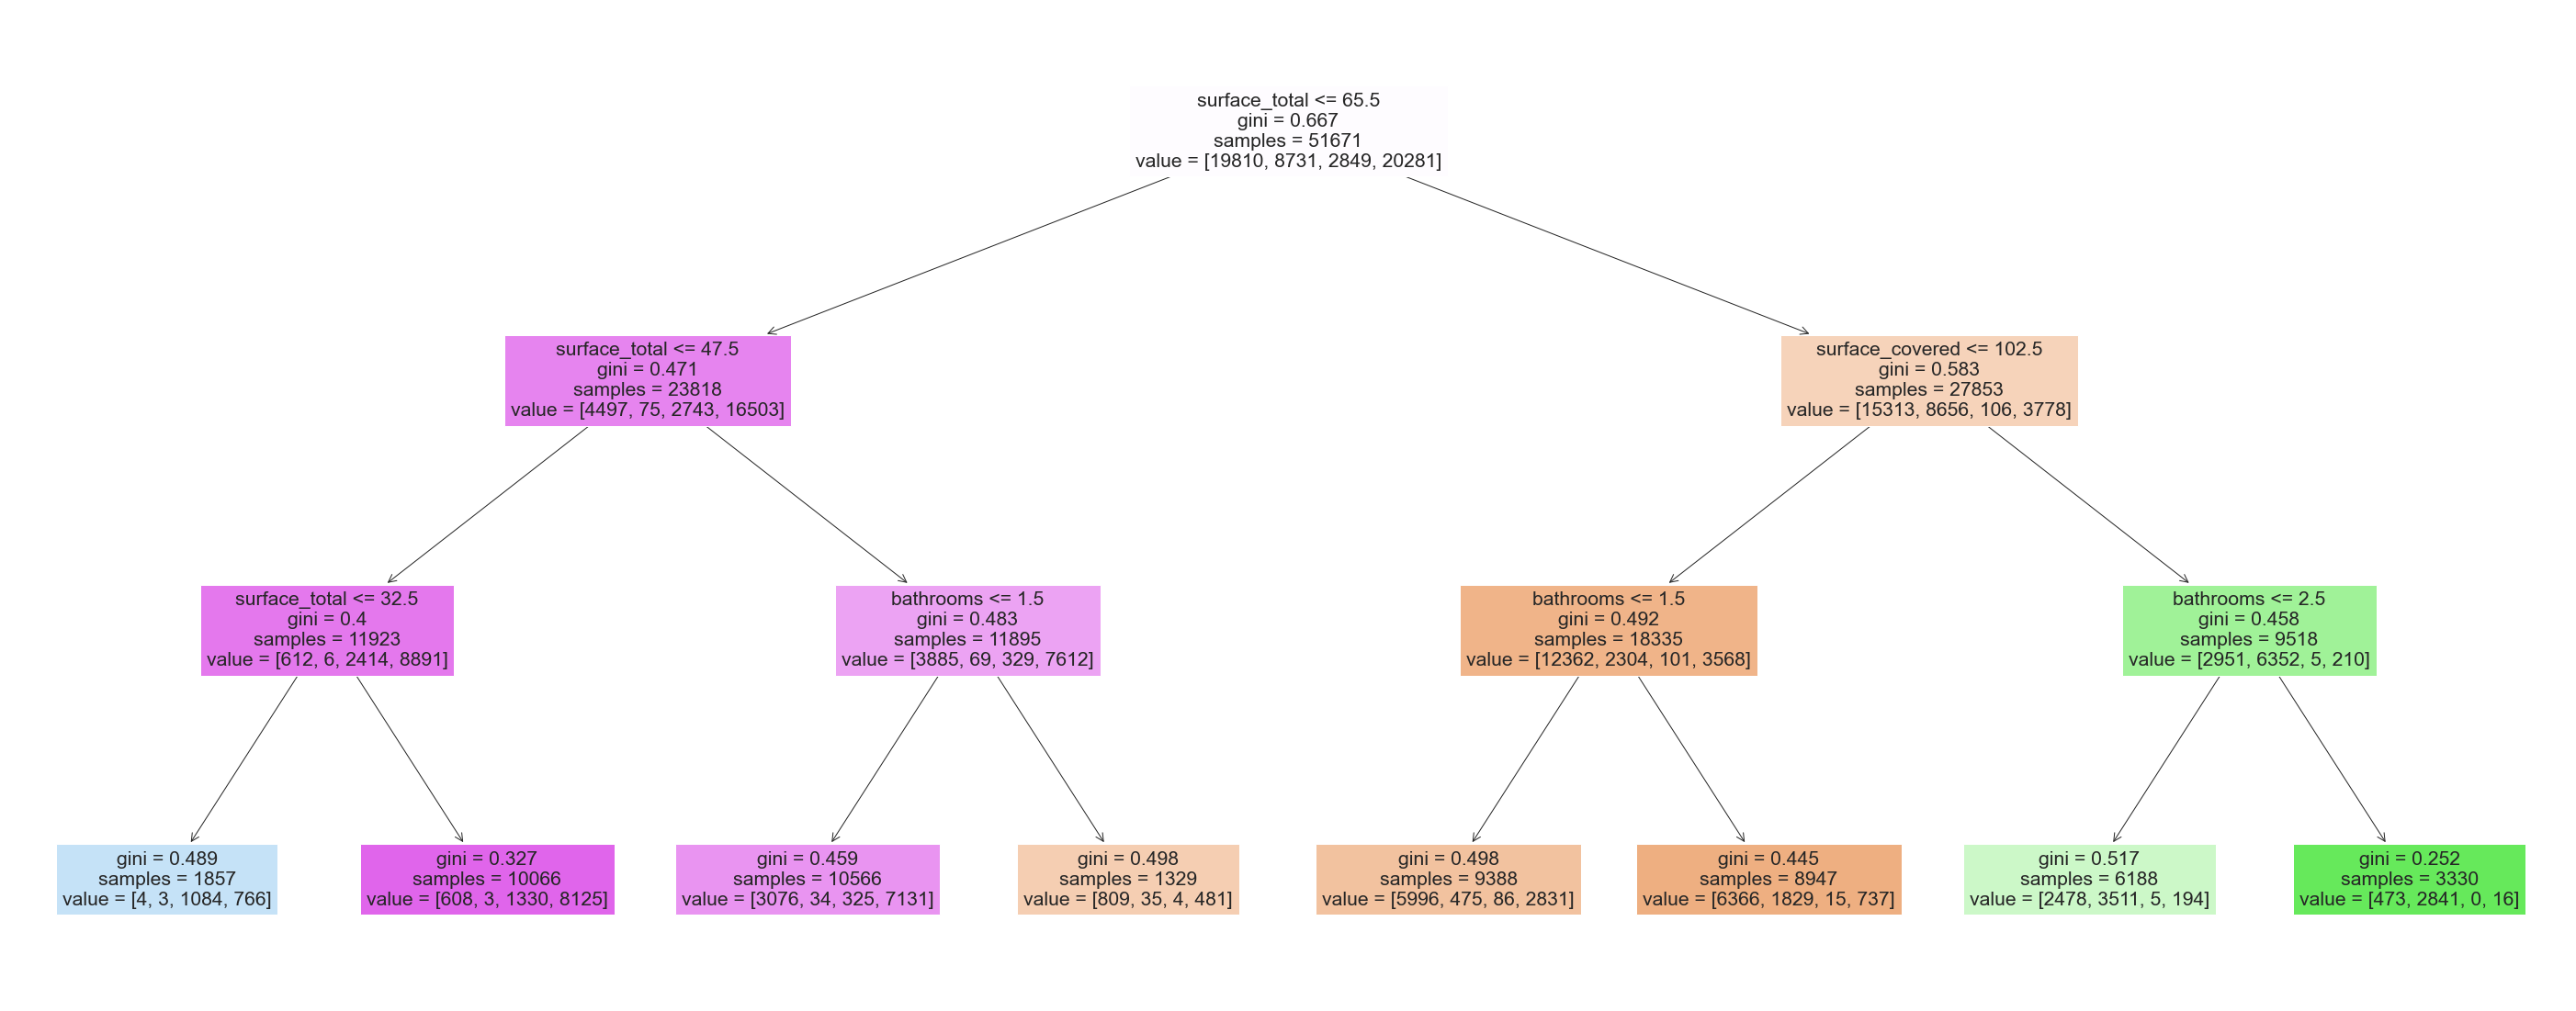

In [174]:
plt.figure(figsize = (50,20))
tree.plot_tree(clf, filled = True, feature_names= X_test.columns)
plt.show()

**Conclusión**: De acuerdo al cálculo de la impureza de gini podemos decir que las variables predictoras por orden de importancia son: "surface_covered","bathrooms" y "surface_total". En el caso de "surface_covered" es lógico que sea la más importante porque impacta más en el precio ya que estamos hablando de la superficie construída.  

### **A continuación graficaré la importancia de cada variable para predecir el precio**

C:\Users\Gabriel\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


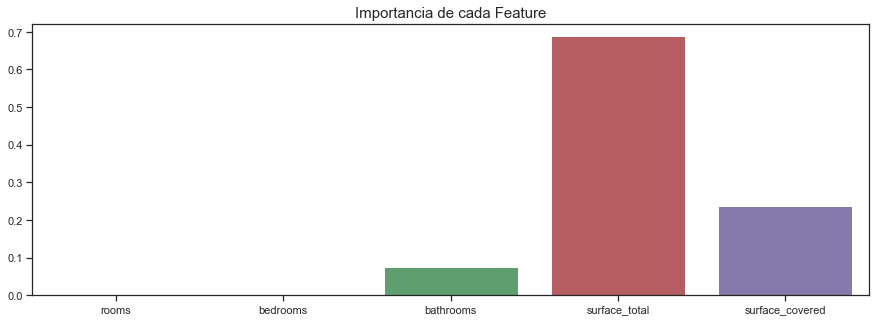

In [175]:
importances = clf.feature_importances_
columns = X_test.columns
plt.figure(figsize = (15,5))
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature', fontsize=15)
plt.show()

**CONCLUSIONES:** Como podemos ver el resultado coincide con el análisis hecho para el gráfico de árbol de decisión.

###**Selección del mejor hiperparámetro para el modelo de clasificación por árbol de decisión** 

Como vimos anteriormente la performance del modelo con una profundidad de árbol igual a 3 es baja. Por este motivo graficaré la precisión del modelo para los grupos entrenados y testeados en función de diferentes valores del hiperparámetro.  

Text(0, 0.5, 'Exactitud')

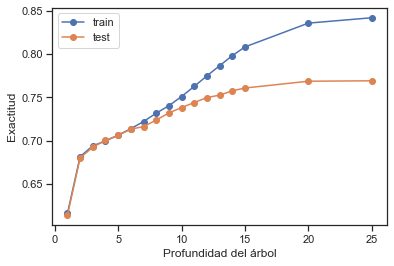

In [176]:
lista_accuracy_train = []
lista_accuracy_test = []

# Lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10, 11, 12, 13, 14, 15, 20, 25]

# Loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Se repite el siguiente bloque de código
    
    # Defino el modelo con el valor de profundidad
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state=42) 
    
    # Entreno el modelo
    clf.fit(X_train,y_train)
    
    # Predigo y evaluo sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predigo y evaluo sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agrego la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')

**CONCLUSIONES:** De acuerdo al gráfico de Exactitud, para una profundidad de arbol igual a 3 el grupo de datos entrenados y testeados tienen valores de exactitud no muy diferentes a valores de profundidad más altos y me permite la interpretación del arbol. Sin embargo, una profundidad de 3 podría dar un modelo muy simple (underfitting), para un modelo que no sea de clasificación la profundidad ideal seria 12 (daría un ajuste apropiado del modelo), ya el grupo  testeado alcanza el máximo valor con alejarse mucho del grupo entrenado. 

# **KNN**

**Para comparar voy a utilizar otro modelo de clasificación: Vecinos más cercanos o KNN**

**Voy a evaluar la precisión del modelo de KNN para las variables predictoras más importantes y para las 5 variables.**

In [177]:
# Con todas las variables predictoras
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
X = Prop7.drop(['price','Price_range'], axis=1)
y = Prop7.Price_range
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

from sklearn.neighbors import KNeighborsClassifier #Importo el clasificador
from sklearn.metrics import accuracy_score #Importo la métrica
knn = KNeighborsClassifier() #Creo el objeto KNeighborsClassifier 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [178]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.7813473708656693
0.7455522441975978


**Con todas las variables predictoras y con el hiperparámetro por default en 5, el modelo presenta un sobreajuste**

In [179]:
# Con la variable más importantes (obtenidas del modelo de Árbol de decisión más arriba)
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
X = Prop7.drop(['price','Price_range', 'rooms', 'bathrooms', 'bedrooms', 'surface_covered'], axis=1)
y = Prop7.Price_range
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [180]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.6405333746201931
0.6347421656281044


En este caso la performance del modelo baja siginificativamente y no se ven diferencias entre los grupos de datos. Esto indica un underfitting o subajuste del modelo. 

In [181]:
# Con las 3 variables más importantes (obtenidas del modelo de Árbol de decisión más arriba)
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
X = Prop7.drop(['price','Price_range', 'rooms', 'bedrooms'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [182]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.752743318302336
0.7251422378759144


**La performance mejora pero también aumenta el sobre ajuste a los datos entrenados**.

### **Resumen resultados**

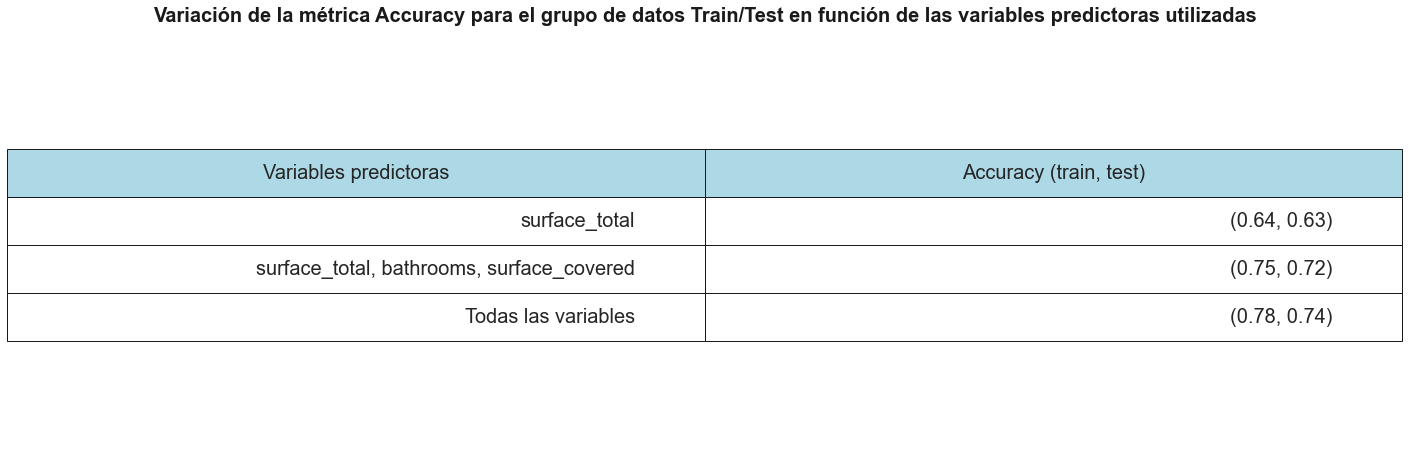

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,8))

data=[['surface_total',(0.64, 0.63)],
      ['surface_total, bathrooms, surface_covered',(0.75, 0.72)],
      ['Todas las variables',(0.78, 0.74)]]
column_labels=['Variables predictoras', 'Accuracy (train, test)']
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values,
        colLabels=df.columns,       
        colColours =["lightblue"] * 3,
        loc="center")

table.scale(1, 4)
table.set_fontsize(20)
ax.axis('off')
title = "Variación de la métrica Accuracy para el grupo de datos Train/Test en función de las variables predictoras utilizadas"
ax.set_title(f'{title}', weight='bold', size=20, color='k')

plt.savefig("demo_table.png", dpi=200, bbox_inches='tight')
plt.show()

**Conclusiones:** La precisión del modelo de KNN aumenta con el número de variables predictoras tanto para el grupo de datos de entrenamiento como para el de testeo, sin embargo, también aumenta el sobreajuste sobre los datos de entrenamiento.

**MATRIZ DE CONFUSIÓN**

In [184]:
# Imprimo la matriz de confusión para los datos entrenados y testeados. 
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[15341  1291    16  3162]
 [ 1889  6738     3   101]
 [  159     4  1176  1510]
 [ 3636   142   863 15640]]
[[6254  736    7 1473]
 [ 911 2837    4   53]
 [  64    1  471  703]
 [1652   57  426 6497]]


**CONCLUSIONES:** Al igual que sucede con el modelo de árboles, en la matriz de confusión para el modelo KNN se observa que el mayor número de verdaderos positivos se encuentran en los rangos de precios entre 160 mil y 320 mil dolares, y entre 320 mil y 640 mil doalres. Por lo tanto el modelo tendrá mayor precisión para predecir el precio de propiedades que entren dentro de ese rango. 

###**Selección del mejor número de vecinos para el modelo de KNN**

**Anteriormente pudimos observar que el hiperparámetro número de vecinos por default daba un sobreajuste del modelo, por este motivo vamos a realizar una curva de precisión en función de este hiperparámetro.** 

Text(0, 0.5, 'Exactitud')

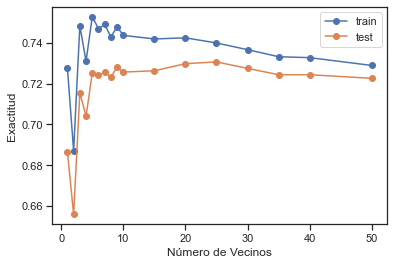

In [185]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Exactitud')

**CONCLUSIONES:** **De acuerdo al gráfico de Exactitud en función del número de vecinos veo que el grupo de datos entrenados y testeados se estabilizan en valores de exactitud (pero también empiezan a descender) a partir de 15 vecinos. Así que voy a selecionar este valor.** 

**Chequeo el desempeño del modelo con todas las variables y nùmero de vecinos igual a 15.**

In [186]:
# Con todas las variables predictoras
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
X = Prop7.drop(['price','Price_range'], axis=1)
y = Prop7.Price_range
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

from sklearn.neighbors import KNeighborsClassifier #Importo el clasificador
from sklearn.metrics import accuracy_score #Importo la métrica
knn = KNeighborsClassifier(n_neighbors=15) #Creo el objeto KNeighborsClassifier 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [187]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.7615103249404889
0.7403594328546916


**Conclusión:** La performance del modelo mejora y el sobreajuste se reduce. 

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


Una pregunta que podría ser respondida por el dataset es: 
**¿Que propiedades de 80 mtrs2, con dos baños, en  el barrio de Palermo están subvaluadas y pueden ser una buena oportunidad de inversión?**

Para responder a esta pregunta debería realizar varios filtrados sobre el dataset. Primero las propiedades que se encuentren en la ciudad de Buenos Aires, luego las que se encuentran en el barrio de Palermo, luego las que poseen 80 mtrs2 cubiertos y por último las que tienen 2 baños. 

Visualizar la descrición estadística de este filtrado con la función .describe() y luego filtrar las propiedades que estén entre el precio mínimo y el percentil 25. 

Esto me permitiría filtrar las propiedades con las caracteristicas que me interesan y tienen el precio más bajo, sin embargo, me faltaría información sobre el estado de la propiedad y su antiguedad. Para obtener esta información debería contactar a la inmobiliaria o a los dueños para poder ver las propiedades. 

In [188]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
Prop.head(3)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


In [189]:
#Voy a realizar el filtrado utilizando una mascara para las propiedades ubicadas en Capital Federal. 
mask = Prop['l2'].values == 'Capital Federal'

# Voy a crear un nuevo dataset seleccionando las filas codificadas en booleanos, que cree anteriormente, con el método loc() 
df_new = Prop.loc[mask] 

# Creo una lista con las categóticas que me interesa seleccionar
li=['Departamento','Casa','PH'] 

#Ahora voy aplicar el método ISIN: Este método toma un iterable o una serie u otro dataframe como parámetro 
# y comprueba si existen elementos del dataframe en él. Las filas que se evalúen como verdaderas se consideran para el resultado.  

prop_filtrado= df_new[df_new.property_type.isin(li)]

#Voy a realizar el filtrado utilizando una mascara para las propiedades ubicadas en el barrio de Palermo. 
mask = prop_filtrado['l3'].values == 'Palermo'

# Voy a crear un nuevo dataset seleccionando las filas codificadas en booleanos, que cree anteriormente, con el método loc() 
Palermo= prop_filtrado.loc[mask]
#Veo como quedó el dataframe
Palermo.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
34,2019-10-17,2019-10-31,2019-10-17,-34.590031,-58.423771,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,52.0,48.0,188000.0,USD,Departamento de 2 ambientes en Venta en Palerm...,Excelente departamento de dos ambientes. Unida...,Departamento,Venta
35,2019-10-17,2019-12-23,2019-10-17,NaN,NaN,Argentina,Capital Federal,Palermo,2.0,1.0,2.0,81.0,76.0,410000.0,USD,Nuevo Ingreso Palacio Bellini Alquiler,Excelente departamento de dos ambientes de 81m...,Departamento,Venta
36,2019-10-17,2019-10-27,2019-10-17,NaN,NaN,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,42.0,38.0,169000.0,USD,Precioso Departamento con cochera Zona univer...,Excelente ubicación a una cuadra y media de av...,Departamento,Venta


In [190]:
#Veo cuantas filas
Palermo.shape

(13007, 19)

In [191]:
Palermo80 = Palermo[(Palermo['surface_covered'] >= 80.0) & (Palermo['surface_covered'] <= 80.0) & (Palermo['surface_total'] >= 80.0) & (Palermo['surface_total'] <= 80.0)] 
Palermo80.shape

(62, 19)

El número de propiedades se reduce significativamente!

In [192]:
Palermo80bath= Palermo80[(Palermo80['bathrooms'] >= 2.0) & (Palermo80['bathrooms'] <= 2.0)]
Palermo80bath.shape

(14, 19)

Dado que el número de propiedades es tan acotado no es necesrio aplicar la función Describe() para seleccionar las propiedades con precio más bajo

In [193]:
Palermo80bath

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
289,2019-10-17,2019-12-23,2019-10-17,-34.582854,-58.422080,Argentina,Capital Federal,Palermo,4.0,3.0,2.0,80.0,80.0,249000.0,USD,J.L. BORGES 2400 / PALERMO / VENTA 4 AMBIENTES,EXCELENTE 4 AMBIENTES EN PALERMO!!!AMPLIO Y L...,Departamento,Venta
5650,2019-12-31,9999-12-31,2019-12-31,-34.574494,-58.423043,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,80.0,80.0,320000.0,USD,Sinclair y Cerviño,"Dos dormitorios con vista a Sinclair, dos baño...",Departamento,Venta
18309,2019-12-03,2019-12-23,2019-12-03,-34.582854,-58.422080,Argentina,Capital Federal,Palermo,4.0,3.0,2.0,80.0,80.0,249000.0,USD,EXCELENTE DEPARTAMENTO 4 AMBIENTES EN PALERMO,Departamento 4 ambientes reciclado a nuevo!! ...,Departamento,Venta
20142,2019-11-08,2019-11-19,2019-11-08,-34.577104,-58.434015,Argentina,Capital Federal,Palermo,4.0,3.0,2.0,80.0,80.0,230000.0,USD,DEPARTAMENTO 4 AMBIENTES CON BALCON TERRAZA,Corredor Responsable: Fernando Muñoz - CUCICBA...,Departamento,Venta
36672,2019-10-31,2019-12-23,2019-10-31,-34.586895,-58.415152,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,80.0,80.0,248000.0,USD,"Lindísimo 3amb, Al Frente con Balcón. Muy Lumi...",En Inmejorable ubicación. A pocas cuadras del ...,Departamento,Venta
60680,2019-10-22,2019-12-23,2019-10-22,-34.582854,-58.422080,Argentina,Capital Federal,Palermo,5.0,3.0,2.0,80.0,80.0,249000.0,USD,Jorge Luis Borges 2400 Palermo 4amb U$249.000 ...,Apto crédito. Apto profesional. Departamento r...,Departamento,Venta
72135,2019-02-06,2019-03-20,2019-02-06,-34.586223,-58.424489,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,80.0,80.0,335000.0,USD,Oportunidad! 3 amb c/coch. Se escucha oferta !,Corredor Responsable: SANTIAGO CRUCIANI - CPI ...,Departamento,Venta
75236,2019-09-11,9999-12-31,2019-09-11,-34.586892,-58.415155,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,80.0,80.0,240000.0,USD,Palermo Venta 3 ambientes con dependencia Balcón,Corredor Responsable: Luis Varela - CSI 5527 /...,Departamento,Venta
81418,2019-08-13,2019-08-14,2019-08-13,-34.581798,-58.411450,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,80.0,80.0,260000.0,USD,Excelente Departamento en Venta en Palermo 3 A...,Venta de excelente departamento de tres ambien...,Departamento,Venta
82582,2019-04-04,2019-04-09,2019-04-04,-34.592584,-58.409799,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,80.0,80.0,228000.0,USD,"OPORTUNIDAD! VENTA SEMIPISO EN PALERMO, 3 AMB ...","OPORTUNIDAD!!Excelente semipiso 4 ambientes, m...",Departamento,Venta


No hay una diferencia de precio significativa entre las propiedades. Una aternativa sería aplicar la función Describe() sobre el dataframe Palermo:

In [194]:
Palermo.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,11917.000000,11915.000000,13007.000000,13007.000000,12821.000000,12411.000000,12384.000000,1.300700e+04
mean,-34.585304,-58.422915,2.951488,1.921504,1.619218,101.543631,91.546027,3.547445e+05
std,0.008140,0.010863,1.251614,0.979211,0.905221,217.873764,272.265127,5.096829e+05
min,-34.623528,-58.480347,1.000000,0.000000,1.000000,11.000000,1.000000,6.000000e+03
25%,-34.591084,-58.431149,2.000000,1.000000,1.000000,50.000000,45.000000,1.560000e+05
50%,-34.585317,-58.422865,3.000000,2.000000,1.000000,72.000000,64.000000,2.262780e+05
75%,-34.579180,-58.414819,4.000000,3.000000,2.000000,111.000000,100.000000,3.700000e+05
max,-34.557221,-58.375637,12.000000,7.000000,14.000000,14834.000000,13857.000000,3.243423e+07


Claramente en el precio mínimo hay un error. Es muy probable que hayan introducido el precio del metro cuadrado. Voy a filtrar el precio entre los percentiles 5 y 25.

In [195]:
p_5 = Palermo.price.quantile(0.05)
p_25 = Palermo.price.quantile(0.25)
Palermo25= Palermo[Palermo.price.gt(p_5) & Palermo.price.lt(p_25)]
Palermo25.shape

(2541, 19)

In [196]:
#Veo como quedó el dataframe y que información puedo rescatar 
Palermo25

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
37,2019-10-17,2019-12-23,2019-10-17,-34.584424,-58.419812,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,39.0,39.0,120000.0,USD,Armenia 2400 Palermo 2amb U$120.000 Apto Cred ...,Apto crédito. Apto profesional. Departamento d...,Departamento,Venta
41,2019-10-17,2019-10-31,2019-10-17,-34.576254,-58.438893,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,50.0,47.0,142000.0,USD,Departamento de 2 ambientes en Venta en Palermo,"Excelente departamento de dos ambientes, ubica...",Departamento,Venta
42,2019-10-17,2019-10-31,2019-10-17,-34.595621,-58.408867,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,42.0,40.0,115000.0,USD,Departamento de 2 ambientes en Venta en Palermo,DPTO 2 AMB CON DETALLES EN INMEJORABLE UBICACI...,Departamento,Venta
44,2019-10-17,2019-10-31,2019-10-17,-34.576254,-58.438893,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,50.0,47.0,142000.0,USD,Departamento de 2 ambientes en Venta en Palerm...,"Excelente departamento de dos ambientes, ubica...",Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146465,2019-07-31,2020-01-06,2019-07-31,-34.579645,-58.431493,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,50.0,46.0,153000.0,USD,Venta 2 ambientes en Palermo Hollywood,Hermoso 2 ambientes en excelente estado en Fit...,Departamento,Venta
146474,2019-07-31,2019-08-14,2019-07-31,-34.578066,-58.426532,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,48.0,48.0,149000.0,USD,VENTA DEPARTAMENTO DOS AMBIENTES EN PALERMO HO...,"Departamento de dos ambientes, con cochera, 1º...",Departamento,Venta
146482,2019-07-31,2019-12-05,2019-07-31,NaN,NaN,Argentina,Capital Federal,Palermo,1.0,1.0,1.0,60.0,53.0,120000.0,USD,HERMOSO MONOAMBIENTE - Av. Córdoba 6000 Of 202...,"Av. Córdoba 6000, Of 202. Palermo Hollywood. E...",Departamento,Venta
146519,2019-07-31,2019-11-12,2019-07-31,NaN,NaN,Argentina,Capital Federal,Palermo,1.0,1.0,1.0,73.0,66.0,140000.0,USD,RESERVADO - HERMOSO MONOAMBIENTE AL FRENTE - A...,"Av. Córdoba 6000, Of 101. Palermo Hollywood. E...",Departamento,Venta


In [197]:
#Ordeno el dataframe en base a la columna precios en forma ascendente. 

sorted_Palermo25 = Palermo25.sort_values(by='price')

sorted_Palermo25

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
45661,2019-02-24,2019-03-11,2019-02-24,-34.590174,-58.434622,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,33.0,33.0,105100.0,USD,Departamento de 2 ambientes en Venta en Palerm...,"Excelente propiedad de dos ambientes, con una ...",Departamento,Venta
91934,2019-02-09,2019-02-24,2019-02-09,-34.590174,-58.434622,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,33.0,33.0,105100.0,USD,Departamento de 2 ambientes en Venta en Palerm...,"Excelente propiedad de dos ambientes, con una ...",Departamento,Venta
34690,2019-04-18,2019-05-02,2019-04-18,-34.590174,-58.434622,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,33.0,33.0,105100.0,USD,Departamento de 2 ambientes en Venta en Palermo,"Excelente propiedad de dos ambientes, con una ...",Departamento,Venta
41258,2019-05-31,2019-06-08,2019-05-31,-34.590174,-58.434622,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,33.0,33.0,105100.0,USD,Departamento de 2 ambientes en Venta en Palerm...,"Excelente propiedad de dos ambientes, con una ...",Departamento,Venta
7240,2019-04-10,2019-04-25,2019-04-10,-34.590174,-58.434622,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,33.0,33.0,105100.0,USD,Departamento de 2 ambientes en Venta en Palerm...,"Excelente propiedad de dos ambientes, con una ...",Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80563,2019-08-13,2019-08-14,2019-08-13,NaN,NaN,Argentina,Capital Federal,Palermo,1.0,1.0,1.0,45.0,41.0,155250.0,USD,Moderno monoambiente con balcon y amenities,"Moderno monombiente en Palermo Soho, muy lumin...",Departamento,Venta
82456,2019-04-04,2019-06-23,2019-04-04,-34.583695,-58.424613,Argentina,Capital Federal,Palermo,1.0,1.0,1.0,45.0,45.0,155250.0,USD,1 Amb C/Amenities- Thames 2245- U$s 155.250,"Monoambiente amplio, luminoso. Muy linda vista...",Departamento,Venta
57725,2019-11-13,9999-12-31,2019-11-13,-34.591433,-58.426073,Argentina,Capital Federal,Palermo,1.0,0.0,1.0,NaN,NaN,155400.0,USD,"Departamento en Venta en Palermo, Capital fede...",VENTA DEPARTAMENTO 1 AMBIENTE PALERMO\nExcelen...,Departamento,Venta
94742,2019-02-23,2019-03-08,2019-02-23,-34.583662,-58.420630,Argentina,Capital Federal,Palermo,3.0,2.0,1.0,51.0,51.0,155500.0,USD,Departamento 3 amb. Palermo.,Corredor Responsable: Gustavo Guastello - C.U....,Departamento,Venta


**Muchos datos están duplicados o son nulos, los voy eliminar del dataframe**

In [198]:
sorted_Palermo25.dropna(inplace=True)
print(sorted_Palermo25.isnull().sum())

start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
dtype: int64


In [199]:
sorted_Palermo25.drop_duplicates(inplace=True)

In [200]:
Duplicadas =sorted_Palermo25[sorted_Palermo25.duplicated()]
print('number of duplicate rows:', Duplicadas.shape)

number of duplicate rows: (0, 19)


In [201]:
sorted_Palermo25

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
45661,2019-02-24,2019-03-11,2019-02-24,-34.590174,-58.434622,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,33.0,33.0,105100.0,USD,Departamento de 2 ambientes en Venta en Palerm...,"Excelente propiedad de dos ambientes, con una ...",Departamento,Venta
91934,2019-02-09,2019-02-24,2019-02-09,-34.590174,-58.434622,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,33.0,33.0,105100.0,USD,Departamento de 2 ambientes en Venta en Palerm...,"Excelente propiedad de dos ambientes, con una ...",Departamento,Venta
34690,2019-04-18,2019-05-02,2019-04-18,-34.590174,-58.434622,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,33.0,33.0,105100.0,USD,Departamento de 2 ambientes en Venta en Palermo,"Excelente propiedad de dos ambientes, con una ...",Departamento,Venta
41258,2019-05-31,2019-06-08,2019-05-31,-34.590174,-58.434622,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,33.0,33.0,105100.0,USD,Departamento de 2 ambientes en Venta en Palerm...,"Excelente propiedad de dos ambientes, con una ...",Departamento,Venta
7240,2019-04-10,2019-04-25,2019-04-10,-34.590174,-58.434622,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,33.0,33.0,105100.0,USD,Departamento de 2 ambientes en Venta en Palerm...,"Excelente propiedad de dos ambientes, con una ...",Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77427,2019-06-17,2019-06-23,2019-06-17,-34.580011,-58.437467,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,72.0,62.0,155000.0,USD,Duplex c/terraza Apto. Prof. - Palermo Hollywood,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento,Venta
117524,2019-07-04,2019-09-14,2019-07-04,-34.586565,-58.441889,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,43.0,40.0,155000.0,USD,Venta Palermo 2 Amb Amenities. E guardacoches ...,Corredor Responsable: Rebeca Stern - C.U.C.I.C...,Departamento,Venta
82456,2019-04-04,2019-06-23,2019-04-04,-34.583695,-58.424613,Argentina,Capital Federal,Palermo,1.0,1.0,1.0,45.0,45.0,155250.0,USD,1 Amb C/Amenities- Thames 2245- U$s 155.250,"Monoambiente amplio, luminoso. Muy linda vista...",Departamento,Venta
94742,2019-02-23,2019-03-08,2019-02-23,-34.583662,-58.420630,Argentina,Capital Federal,Palermo,3.0,2.0,1.0,51.0,51.0,155500.0,USD,Departamento 3 amb. Palermo.,Corredor Responsable: Gustavo Guastello - C.U....,Departamento,Venta


**Conclusión:** La instancia 77427 parece ser una muy buena oportunidad de inversión ya que figura a un precio bajo si consideramos los mtrs2 de la propiedad, y su ubicación (una de las más cotizadas de la Ciudad de Buenos Aires). 

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

**FILTRADO DEL DATASET ORIGINAL PARA LLEGAR AL CHECKPOINT**

In [202]:
import pandas as pd # Importo la librerio de pandas para poder importar los datos en formato DataFrame
import numpy as np # Importo numpy para operar sobre los datos

# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO

Prop = pd.read_csv(r"C:\Users\Gabriel\Documents\DATA SCIENCE\PROYECTOS\Proyecto 2\DS_Proyecto_01_Datos_Properati.csv") # A través de la función de pandas genero un DataFrame a partir del archivo "Valores separados por comas".
print(Prop.shape) # Esta función de pandas me devuelve la forma del DataFrame (filas, columnas)  
Prop.head()# Esta función de pandas me devuelve las 5 primeras filas del DataFrame

(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


# **1**

In [203]:
#Voy a realizar el filtrado utilizando una mascara para las propiedades ubicadas en Capital Federal. 
mask = Prop['l2'].values == 'Capital Federal'

# Voy a crear un nuevo dataset seleccionando las filas codificadas en booleanos, que cree anteriormente, con el método loc() 
df_new = Prop.loc[mask] 

# Creo una lista con las categóticas que me interesa seleccionar
li=['Departamento','Casa','PH'] 

#Ahora voy aplicar el método ISIN: Este método toma un iterable o una serie u otro dataframe como parámetro 
# y comprueba si existen elementos del dataframe en él. Las filas que se evalúen como verdaderas se consideran para el resultado.  

prop_filtrado= df_new[df_new.property_type.isin(li)]
prop_filtrado.shape

(91485, 19)

# **2**

In [204]:
prop_filtrado_1= prop_filtrado[(prop_filtrado['surface_total'] <= 1000) & (prop_filtrado['surface_total'] >=15)]

prop_filtrado_1.shape

(82405, 19)

# **3**

In [205]:
prop_filtrado_2= prop_filtrado_1[(prop_filtrado_1['price'] <= 4000000)]

prop_filtrado_2.shape

(82373, 19)

In [206]:
prop_filtrado_2['property_type'].value_counts()

Departamento    70431
PH               9704
Casa             2238
Name: property_type, dtype: int64

### **Conclusión**

In [207]:
prop_filtrado_2.head(20)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta
7,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta
8,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta
10,2019-10-17,2019-12-07,2019-10-17,-34.586225,-58.496220,Argentina,Capital Federal,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,USD,Villa Pueyrredón PH 2 ambientes con 2 terrazas...,PH CON TERRAZAS PROPIAS EN DUPLEX MUY LUMINOSO...,PH,Venta


# **4**

In [208]:
prop_filtrado_3 = prop_filtrado_2.drop(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'currency', 'title', 'description', 'property_type',
       'operation_type'], axis=1)
prop_filtrado_3.count()

rooms              82373
bedrooms           82373
bathrooms          81493
surface_total      82373
surface_covered    81856
price              82373
dtype: int64

In [209]:
prop_filtrado_3.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


# **5**

In [210]:
print(prop_filtrado_3.isnull().sum())

rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
price                0
dtype: int64


In [211]:
prop_filtrado_4 = prop_filtrado_3.dropna() 
prop_filtrado_4.count()


rooms              81019
bedrooms           81019
bathrooms          81019
surface_total      81019
surface_covered    81019
price              81019
dtype: int64

In [212]:
prop_filtrado_4.shape

(81019, 6)

**CHECKPOINT LOGRADO**

**Si bien llegué al número de instancias y y columnas solicitadas en el enunciado. Del análsis exploratorio, realizado en el punto 2, considero que este dataset conserva una cantidad de datos atípicos que pueden afectar la performance del modelo. Debido a esto voy a filtrar instancias para descartar datos atípicos.**

In [213]:
filtrado_5= prop_filtrado_4[(prop_filtrado_4['price'] <= 2000000) & (prop_filtrado_4['price'] >=33000)]
filtrado_5.shape

(80551, 6)

**Una inconsistencia, observada en el AED, que se debe eliminar, son las instancias con superficie cubierta mayor a la superficie total.**

In [214]:
filtrado_5['Sup_correg'] = filtrado_5['surface_total'] - filtrado_5['surface_covered']
filtrado_6 = filtrado_5[filtrado_5["Sup_correg"] >= 0]
filtrado_6.shape

<ipython-input-214-3a364851f5b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado_5['Sup_correg'] = filtrado_5['surface_total'] - filtrado_5['surface_covered']


(79808, 7)

In [215]:
filtrado_6.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Sup_correg
0,7.0,7.0,2.0,140.0,140.0,153000.0,0.0
1,2.0,1.0,2.0,70.0,58.0,159000.0,12.0
2,2.0,1.0,1.0,45.0,45.0,125000.0,0.0
3,2.0,1.0,1.0,85.0,50.0,295000.0,35.0
5,2.0,1.0,1.0,56.0,56.0,150000.0,0.0


**Habitaciones**

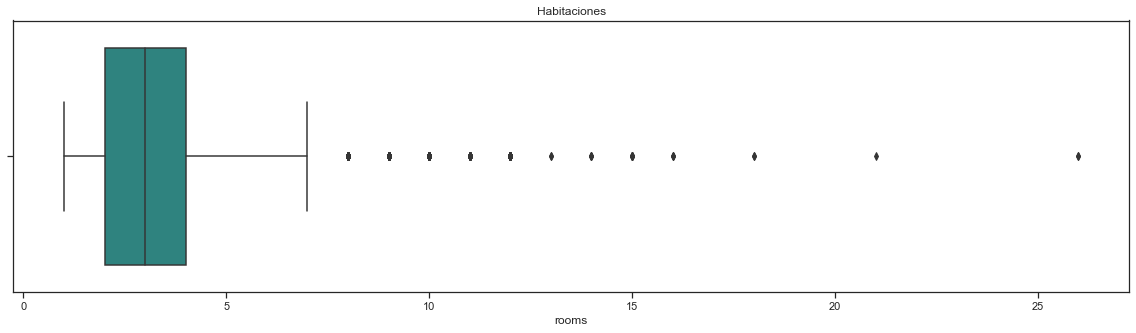

count    79808.000000
mean         2.995026
std          1.287356
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         26.000000
Name: rooms, dtype: float64

In [216]:
# Ahora voy a estudiar la distribución de valores para la variable rooms (habitaciones)
plt.figure(figsize=(20,5)) 
sns.boxplot(data = filtrado_6, x = 'rooms', palette = "viridis")
plt.title('Habitaciones')
plt.show()
filtrado_6.rooms.describe()

Como se puede ver en el gráfico hay 12 outliers con valores superiores a 7 habiataciones así que tomaré este valor como valor de corte. 

count    77226.000000
mean         2.963277
std          1.185855
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: rooms, dtype: float64

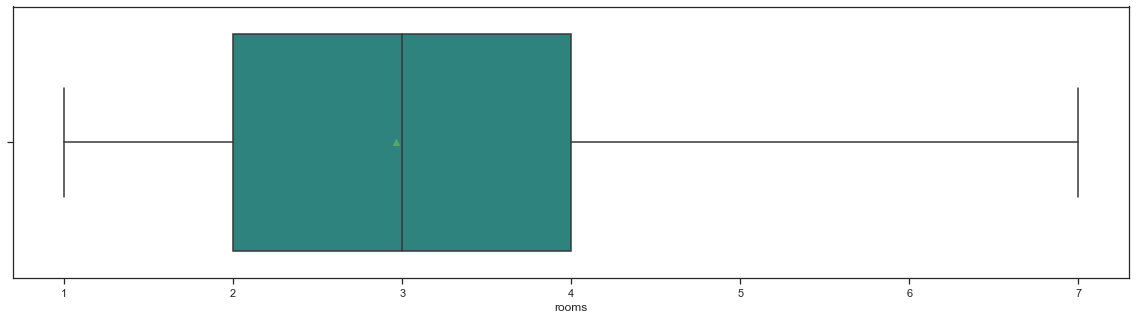

In [217]:
filtro_7= filtro_6[(filtro_6['rooms'] <= 7)]

plt.figure(figsize=(20,5))

sns.boxplot(data=filtro_7, x='rooms', showmeans=True, palette = "viridis")

filtro_7.rooms.describe()

**Dormitorios**

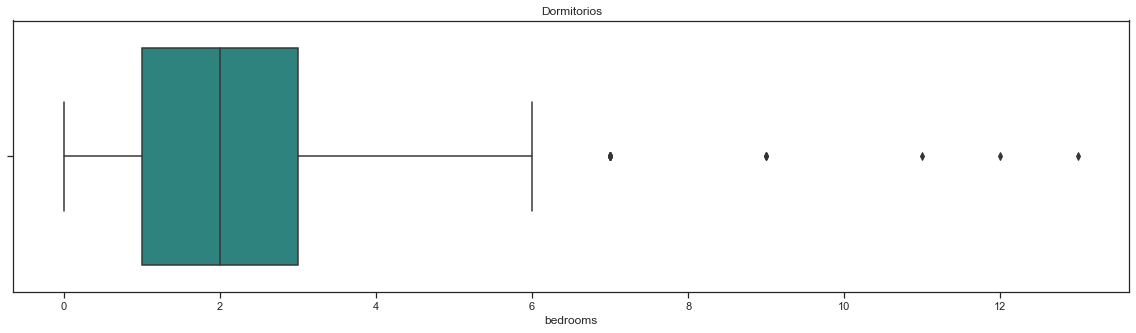

count    77226.000000
mean         1.972445
std          0.977542
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: bedrooms, dtype: float64

In [218]:
# Ahora voy a estudiar la distribución de valores para la variable bedrooms (dormitorios)
plt.figure(figsize=(20,5)) 
sns.boxplot(data =filtro_7, x = 'bedrooms', palette = "viridis")
plt.title('Dormitorios')
plt.show()
filtro_7.bedrooms.describe()

Como se puede ver en el gráfico hay 5 outliers con valores superiores a 6 dormitorios así que tomaré este valor como valor de corte. Por otro lado, es importante destacar que el valor más extremo de los outliers (15) no es suficientemente extremo como para aplastar el gráfico hacia la izquierda. A continuación voy a filtrar los datos outliers. 

count    77208.00000
mean         1.97100
std          0.97264
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max          6.00000
Name: bedrooms, dtype: float64

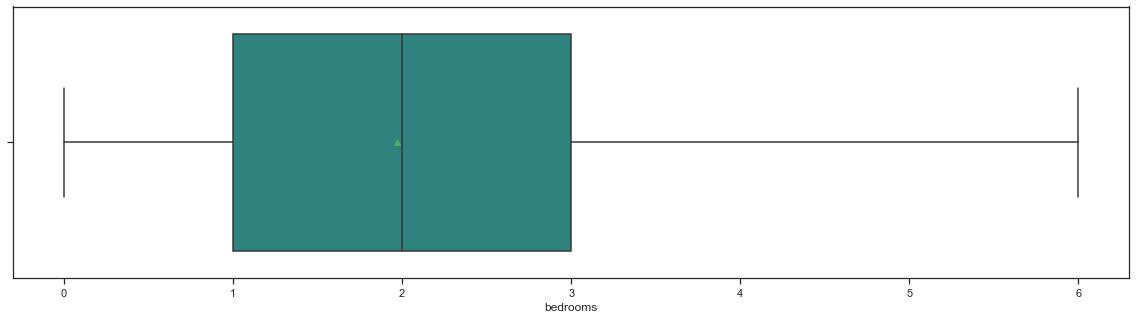

In [219]:
filtro_8= filtro_7[(filtro_7['bedrooms'] <= 6)]

plt.figure(figsize=(20,5))

sns.boxplot(data=filtro_8, x='bedrooms', showmeans=True, palette = "viridis")

filtro_8.bedrooms.describe()

**Baños**

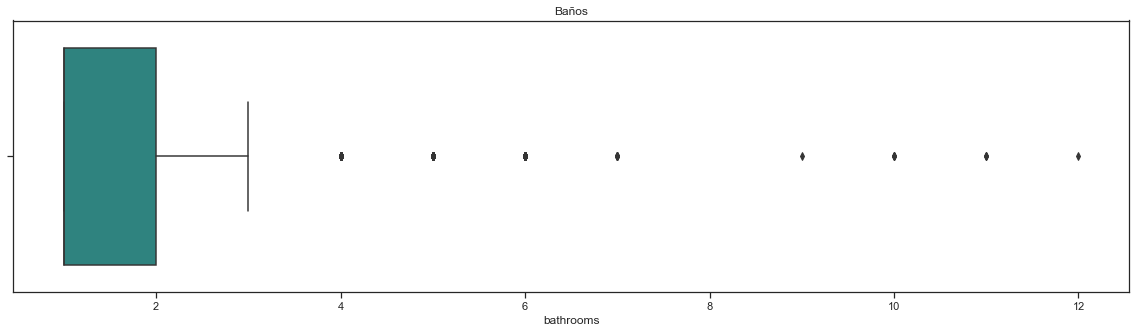

count    76403.000000
mean         1.535071
std          0.815840
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         12.000000
Name: bathrooms, dtype: float64

In [220]:
# Ahora voy a estudiar la distribución de valores para la variable bathrooms (baños)
plt.figure(figsize=(20,5)) 
sns.boxplot(data = filtro_8, x = 'bathrooms', palette = "viridis")
plt.title('Baños')
plt.show()
filtro_8.bathrooms.describe()

Como se puede ver en el gráfico hay 8 outliers con valores superiores a 3 baños así que tomaré este valor como valor de corte. Por otro lado, es importante destacar que el valor más extremo de los outliers (14) no es suficientemente extremo como para aplastar el gráfico hacia la izquierda. A continuación voy a filtrar los datos outliers. 

count    73988.000000
mean         1.445180
std          0.646342
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: bathrooms, dtype: float64

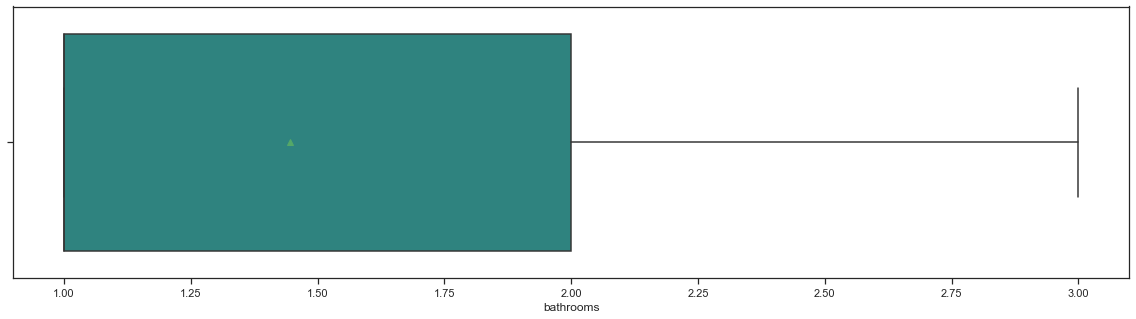

In [221]:
filtro_9= filtro_8[(filtro_8['bathrooms'] <= 3)]

plt.figure(figsize=(20,5))

sns.boxplot(data=filtro_9, x='bathrooms', showmeans=True, palette = "viridis")

filtro_9.bathrooms.describe()

**Porcentaje de reducción del dataset "checkpoint":8,68%**

**A continuación voy a eliminar las columnas con datos categóricos**

In [222]:
filtro_9.head(2)

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type,Sup_correg
1,2019-10-17,2019-11-21,2019-10-17,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,PH,Venta,12.0
2,2019-10-17,2019-11-01,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,PH,Venta,0.0


In [223]:
filtro_9.drop(['start_date', 'end_date', 'created_on', 'l2', 'l3', 'currency', 'property_type',	'operation_type', 'Sup_correg' ], axis=1, inplace=True)

C:\Users\Gabriel\miniconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [292]:
filtro_9.head(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0


In [294]:
filtro_9.to_csv (r'C:\Users\Gabriel\OneDrive\Documentos\OneDrive\DATA SCIENCE\PROYECTOS\PROYECTO 1\proyecto1_dataframe.csv', index = False, header=True)

In [295]:
Instancias_duplicadas = filtro_9[filtro_9.duplicated()]
print('Nº de instancias duplicadas:', Instancias_duplicadas.shape) # Chequeo que ya no tengo instancias duplidadas 

Nº de instancias duplicadas: (35874, 6)


In [296]:
filtro_9.shape

(73988, 6)

## **MODELOS DE BENCHMARK**

### **El objetivo de esta parte del proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.**

**En esta sección, voy a entrenar dos modelos de Machine Learning - uno de árboles de decisión y otro de vecinos más cercanos- para predecir el precio de las propiedades tipo Departamento, PH y Casa en la Ciudad Autónoma de Buenos Aires (Capital Federal).** 
Dado que la etiqueta a predecir es de valores contínuos (no categóricos), los modelos serán de regresión y la métrica que voy a utilizar, para los modelos de benchmark, será el **R2 ajustado** o coeficiente de determinación ajustado, el cual me permitirá comprar el desempeño de los modelos.

Con estos modelos de benchmark voy deperminar:

- **Mejor hiperparámetro**: Graficaré el R2 ajustado en función del valor del hiperparámetro. 

- **Mejor/es variables prodedictoras**: Según el análisis de importancia de variables predictoras para el modelo de clasificación árbol de decisión, en la sección de análsis exploratorio, las mejores variables predictoras son "Superficie total", "Baños" y Superficie cubierta" en ese orden de prioridad. Voy a empezar solo con la mejor variable predictora y observar el resultado de la métrica del modelo, si la métrica es baja voy a ir agregando más variales predictoras.


# **Métricas**

**Coeficiente de determinación o R2**

Se utiliza para evaluar el rendimiento de un modelo de regresión. Es la cantidad de variación en el atributo dependiente que es predecible a partir de la variable o variables independientes. Se utiliza para verificar qué tan bien se reproducen los resultados observados por el modelo, dependiendo de la relación de desviación total de los resultados descrita por el modelo. R² es una métrica relativa, por lo que puede ser usada para comparar con otros modelos entrenados con los mismos datos. También, puede usarse para tener una idea aproximada del rendimiento de un modelo, en general.

La definición más general de R2 es la siguiente:

R2= 1 - SSres/SStot

Donde SSres es la suma del cuadrado de los errores y SStot es la suma de todas las diferencias al cuadrado entre las observaciones y su media general.
En el mejor de los casos, los valores modelados coinciden exactamente con los valores observados, lo que da como resultado SSres= 0 y R2 = 1. Un modelo de referencia, que siempre predice el mismo valor para valores entrada diferentes, tendrá un R2 = 0 . Los modelos que tienen peores predicciones que esta línea de base tendrán un R2 negativo. 

**R2 ajustado**

Para evaluar los modelos utilizaré el R2 ajustado. Esta métrica penaliza el R2 por la cantidad de variables predictoras utilizadas. 

Es una versión modificada del R², ajustada por el número de variables predictoras (VPs). Penaliza por agregar VPs innecesarias y permite una comparación de modelos de regresión con un número diferente de VPs.

# **Árboles de decisión de regresión**
Lo primero que voy a hacer es entrenar un árbol de decisión y evaluar su performance con la mejor variable predictora seleccionada en la sección 2.  

A continuación **entrenaré** el regresor con el conjunto de training y realizaré la predicción sobre el grupo de testeo. 

In [225]:
#Para empezar vamoy a separar el dataset en un conjunto de entrenamiento (70%) y un conjunto de test (30%) y selecciónar la mejor variable predictora y la variable dependiente o a predecir.

X = filtro_9.drop(['price', 'rooms', 'bathrooms', 'bedrooms', 'surface_covered' ], axis=1)
y = filtro_9['price']

# Realizo la separación
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [226]:
# Cargo el regresor y realizo el entrenamiento
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import tree
dtree = tree.DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

**En este caso el modelo toma un valor default de profundidad de árbol infinito**

---



Con el modelo entrenado **se realiza la predicción** sobre el conjunto de test `X_test` y guardo el resultado en una variable `y_pred`.

In [227]:
# Acá realizo la predicción
y_pred = dtree.predict(X_test)

**Performance del modelo**

In [228]:
print('R2 ajustado del grupo de datos de entrenamiento:', 1-(1-dtree.score(X,y))*(len(y)-1)/(len(y)-X.shape[1]-1))

R2 ajustado del grupo de datos de entrenamiento: 0.5757477712014899


**Conclusión:** La performance del modelo es baja.  Como se muestra en la Sección 2 (análisis exploratorio) al aumentar él número de variables predictoras mejora la performance del modelo (árbol de clasificación). A continuación evaluaré si suscede los mismo en el modelo de regresión y si el R2 ajustado peneliza o no cuando aumento el número de variables. 

**Calculo el R2 ajustado para las 3 mejores variables predictoras**

In [229]:
#Para empezar vamoy a separar el dataset en un conjunto de entrenamiento (70%) y un conjunto de test (30%) y selecciónar las 3 mejores variables predictoras y la variable dependiente o a predecir.

X = filtro_9.drop(['price', 'rooms', 'bedrooms' ], axis=1)
y = filtro_9['price']

# Realizo la separación
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cargo el regresor y realizo el entrenamiento
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import tree
dtree = tree.DecisionTreeRegressor()
dtree.fit(X_train,y_train)

# Acá realizo la predicción
y_pred = dtree.predict(X_test)

**Performance del modelo**

In [230]:
print('R2 ajustado del grupo de datos de entrenamiento:', 1-(1-dtree.score(X,y))*(len(y)-1)/(len(y)-X.shape[1]-1))

R2 ajustado del grupo de datos de entrenamiento: 0.8197962927444739


**Conclusiones:** La performance del modelo mejora notablemente. A continuación evaluaré el modelo para todas las variables predictoras. 

**Calculo el R2 ajustado para un modelo con todas sus variables predictoras**

In [231]:
#Para empezar vamoy a separar el dataset en un conjunto de entrenamiento (70%) y un conjunto de test (30%) y selecciónar todas variables predictoras y la variable dependiente o a predecir.

X = filtro_9.drop(['price'], axis=1)
y = filtro_9['price']

# Realizo la separación
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cargo el regresor y realizo el entrenamiento
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import tree
dtree = tree.DecisionTreeRegressor()
dtree.fit(X_train,y_train)
# Acá realizo la predicción
y_pred = dtree.predict(X_test)

**Performance del modelo**

In [232]:
print('R2 ajustado del grupo de datos de entrenamiento:', 1-(1-dtree.score(X,y))*(len(y)-1)/(len(y)-X.shape[1]-1))

R2 ajustado del grupo de datos de entrenamiento: 0.8723313138738511


**Conclusión:** Como vemos, la métrica del modelo sigue mejorando, osea que, el modelo mejora sin penalizar por cantidad de variables predictoras, al menos para esta cantidad de variables, dataset y modelo. 

**Resumen resultados en la performance del modelo de benchmark árbol de decisión evaluado con más de una variable predictora**

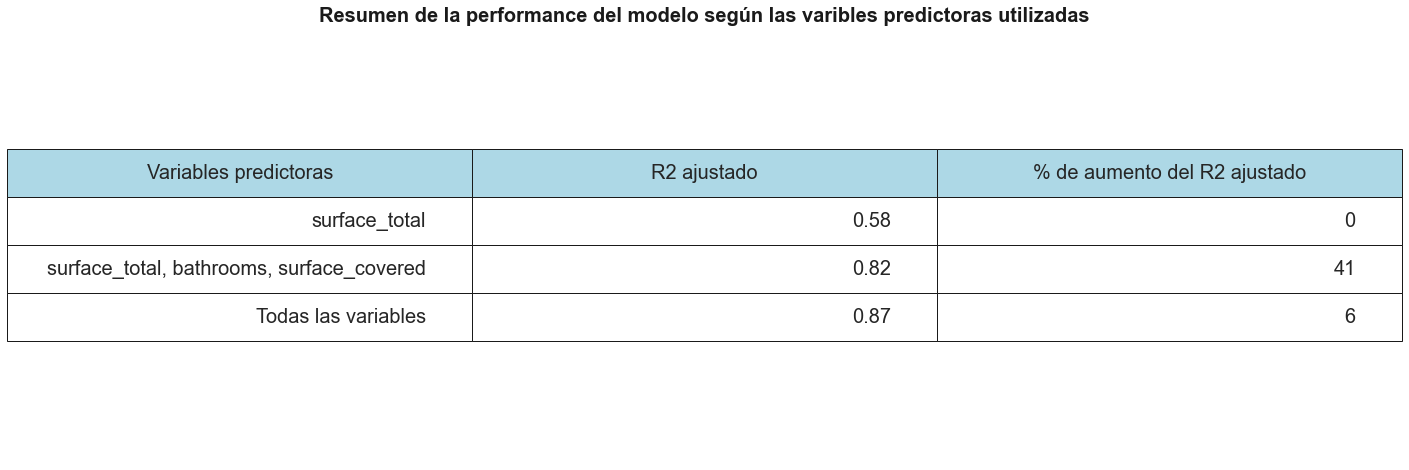

In [233]:
import pandas as pd
import matplotlib.pyplot as plt

N=10
fig, ax = plt.subplots(figsize=(25,8))

data=[['surface_total',0.58,0],
      ['surface_total, bathrooms, surface_covered',0.82,41],
      ['Todas las variables',0.87,6]]
column_labels=["Variables predictoras", "R2 ajustado", "% de aumento del R2 ajustado"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values,
        colLabels=df.columns,       
        colColours =["lightblue"] * 3,
        loc="center")

table.scale(1, 4)
table.set_fontsize(20)
ax.axis('off')
title = "Resumen de la performance del modelo según las varibles predictoras utilizadas"
ax.set_title(f'{title}', weight='bold', size=20, color='k')

plt.savefig("demo_table.png", dpi=200, bbox_inches='tight')
plt.show()

**Conclusiones sobre el número de variables predictoras (VPs) en modelo de árbol de decisión por regresión:** 

Como se ve en la tabla, el incremento de VPs mejora significativamente la performance del modelo. Este incremento es mucho mayor (41%) para las VPs más importantes seleccionadas con el modelo de clasificación por árbol en la sección 2. De hecho, cuando utilizo el total de VPs (5) el modelo mejora en un 6% respeto al modelo evaluado con las 3 VPs más importantes. De todas formas voy a seguir evaluando los modelos con las 5 VPs ya que el R2 ajustado no penaliza el incremento de VPs.  

## **Evaluación de los hiperparámetros**

**Voy analizar el cambio en el R2 ajustado a medida que es más profundo el árbol de decisión, tanto en training como en testing.**

Para esto, **iteraré** de 5 en 5 en el parámetro max_depth y **observaré** como impacta en el R2 ajustado. 

Creo dos arreglos R2_ajustado_train y R2_ajustado_test para ir guardando los **R2 ajustados** de cada profundidad

In [234]:
def Carga_R2_ajustado_train():
        # Initialize 
    R2_ajustado_train = []
    for i in range(1,50, 5):
        dtree = tree.DecisionTreeRegressor(max_depth=i)
        dtree.fit(X_train,y_train)
        y_pred_train = dtree.predict(X_train)
        R2_ajustado= 1-(1-dtree.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
        R2_ajustado_train.append(R2_ajustado)
    return R2_ajustado_train

In [235]:
 R2_ajustado_train=Carga_R2_ajustado_train()

In [236]:
 R2_ajustado_train

[0.34098870533107684,
 0.6716479117406438,
 0.820236233329803,
 0.9067660604978108,
 0.9373622407037722,
 0.9410352435078521,
 0.9411417216469585,
 0.941141908592332,
 0.941141908592332,
 0.941141908592332]

In [237]:
def Carga_R2_ajustado_test():
        # Initialize 
    R2_ajustado_test = []
    for i in range(1,50, 5):
        dtree = tree.DecisionTreeRegressor(max_depth=i)
        dtree.fit(X_train,y_train)
        y_pred_test = dtree.predict(X_test)
        R2_ajustado= 1-(1-dtree.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        R2_ajustado_test.append(R2_ajustado)
    return R2_ajustado_test

In [238]:
R2_ajustado_test=Carga_R2_ajustado_test()

In [239]:
R2_ajustado_test

[0.3459313501974378,
 0.636973266264297,
 0.734986983525966,
 0.7142983480227142,
 0.7125701132351521,
 0.7172709656278118,
 0.7145994617016866,
 0.7136927801478258,
 0.707380997779878,
 0.7187859011157394]

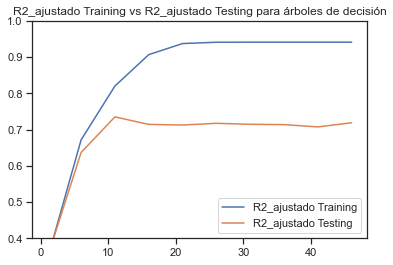

In [240]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,50, 5), R2_ajustado_train, label='R2_ajustado Training')
plt.plot(range(1,50, 5), R2_ajustado_test, label='R2_ajustado Testing')
plt.ylim((0.4, 1))
plt.legend(loc="best")
plt.title("R2_ajustado Training vs R2_ajustado Testing para árboles de decisión")
plt.show()

**Hago un zoom en la cresta de la curva para determinar mejor el mejor hiperparámetro.**

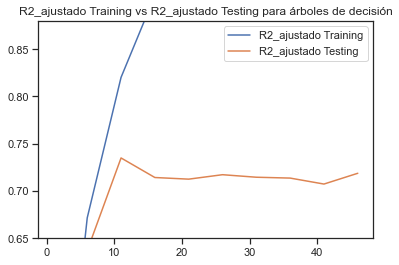

In [241]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,50, 5), R2_ajustado_train, label='R2_ajustado Training')
plt.plot(range(1,50, 5), R2_ajustado_test, label='R2_ajustado Testing')
plt.ylim((0.65, 0.88))
plt.legend(loc="best")
plt.title("R2_ajustado Training vs R2_ajustado Testing para árboles de decisión")
plt.show()

**Es dificil deperminar el mejor valor para la profundidad de árbol utilizando como métrica el R2 ajustado. Sin embargo, el mejor valor pareciera ser max_depth=12.
Voy a utilizar la raíz cuadrada del error cuadrático medio o RMSE para tratar de determinar este valor.** 

In [242]:
def Carga_RMSE_train():
        # Initialize 
    rmses_train = []
    for i in range(1,50, 5):
        dtree = tree.DecisionTreeRegressor(max_depth=i)
        dtree.fit(X_train,y_train)
        y_pred_train = dtree.predict(X_train)
        rmses= np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
        rmses_train.append(rmses)
    return rmses_train

In [243]:
rmses_train=Carga_RMSE_train()

In [244]:
rmses_train

[178405.4085345379,
 125930.65975834725,
 93177.84609807869,
 67104.03031159773,
 55002.15354389726,
 53365.16321201331,
 53316.958223487105,
 53316.873550889955,
 53316.873550889955,
 53316.873550889955]

**Veo que el error se reduce significativamente, en el grupo de datos entrenados, a medida que aumento la profundidad del árbol. Ahora voy a ver el comportamiento del grupo testeado**

In [245]:
def Carga_RMSE_test():
        # Initialize 
    rmses_test = []
    for i in range(1,50, 5):
        dtree = tree.DecisionTreeRegressor(max_depth=i)
        dtree.fit(X_train,y_train)
        y_pred_test = dtree.predict(X_test)
        rmses= np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
        rmses_test.append(rmses)
    return rmses_test

In [246]:
rmses_test=Carga_RMSE_test()

In [247]:
rmses_test

[180008.25682829955,
 134106.57272258433,
 114505.984037976,
 119302.69678556516,
 118845.94416471563,
 120264.26084888373,
 117340.14558621889,
 118291.4608075018,
 119196.2850814536,
 118841.51469271886]

**En este caso el error también se reduce significativamente, sin embargo, no en la misma magnitud que en el caso del grupo entrenado. Para verlo más claramente voy a graficar los valores que guardé en los arreglos rmses_train y rmses_test en función de la profundidad del arbol.**

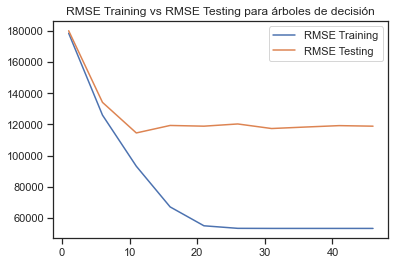

In [248]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,50, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,50, 5), rmses_test, label='RMSE Testing')
plt.ylim()
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

**Hago un zoom en la cresta de la curva para determinar mejor el mejor hiperparámetro.**

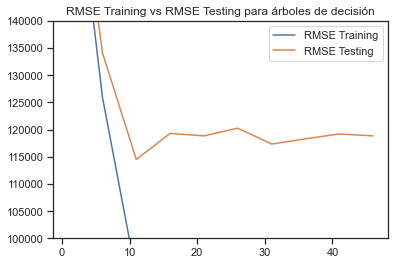

In [249]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,50, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,50, 5), rmses_test, label='RMSE Testing')
plt.ylim((100000,140000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

**Conclusión**: Del análisis del RMSE para el grupo de datos entrenado y testeado observo que la máxima reducción del error para el grupo testeado coincide con una profundidad de arbol de aproximadamente 12, valor que aproxima al máximo de R2 ajustado (ver más arriba). Para valores más altos de este hiperparámetro los grupos se separan aún más y es muy probable que se de un sobreajuste del modelo. De este análisis selecciono como **mejor hiperparámetro un max_depth=15**

# **Vecinos más cercanos (KNN) de regresión**. 

## **Evaluación de los hiperparámetros**

In [250]:
#Para empezar vamoy a separar el dataset en un conjunto de entrenamiento (70%) y un conjunto de test (30%) y selecciónar todas variables predictoras y la variable dependiente o a predecir.

X = filtro_9.drop(['price'], axis=1)
y = filtro_9['price']

# Realizo la separación
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [251]:
from sklearn.neighbors import KNeighborsRegressor

# En esta celda cargo el regresor y realizo el entrenamiento
from sklearn import metrics
from sklearn import tree

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

**En este caso el modelo toma un valor default de 5 vecinos**

In [252]:
# Realizo la predicción
y_pred = knn.predict(X_test)

In [253]:
print('R2 ajustado del grupo de datos de entrenamiento:', 1-(1-knn.score(X,y))*(len(y)-1)/(len(y)-X.shape[1]-1))

R2 ajustado del grupo de datos de entrenamiento: 0.7669759716982048


**Voy analizar el cambio en el RMSE a medida que aumento el número de vecinos, tanto en training como en testing.**

In [254]:
def Carga_R2_ajustado_train():
        # Initialize 
    R2_ajustado_train = []
    for i in range(1,30, 1):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train,y_train)
        y_pred_train = knn.predict(X_train)
        R2_ajustado= 1-(1-knn.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
        R2_ajustado_train.append(R2_ajustado)
    return R2_ajustado_train

In [255]:
 R2_ajustado_train=Carga_R2_ajustado_train()

In [256]:
R2_ajustado_train

[0.864337394737722,
 0.8653107329377938,
 0.8384638280719012,
 0.8144199751167336,
 0.7963911466837672,
 0.7795875691014387,
 0.7651671690889457,
 0.7539131283343098,
 0.7450470703965859,
 0.7366844640540968,
 0.7286423962193056,
 0.7217160015452269,
 0.7173968663458421,
 0.7105412839926231,
 0.7050695303049234,
 0.7006383520212173,
 0.6952857174279901,
 0.6909187631056172,
 0.6863519231807851,
 0.6824486113733044,
 0.6796717886769915,
 0.6767893464738988,
 0.6746073971997211,
 0.6716489767058897,
 0.6687653361062753,
 0.6668343289727544,
 0.6645075338337917,
 0.662211662330281,
 0.6596830286655087]

In [257]:
def Carga_R2_ajustado_test():
        # Initialize 
    R2_ajustado_test = []
    for i in range(1,30, 1):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)
        y_pred_test = knn.predict(X_test)
        R2_ajustado= 1-(1-knn.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        R2_ajustado_test.append(R2_ajustado)
    return R2_ajustado_test

R2_ajustado_test=Carga_R2_ajustado_test()

In [258]:
R2_ajustado_test

[0.6237805764253919,
 0.6789222425448257,
 0.7008884921759018,
 0.7052413882846765,
 0.7000133876450998,
 0.6945477191476219,
 0.6882866758299087,
 0.6867129364723381,
 0.6848240444660986,
 0.6820173327162852,
 0.6782037059000685,
 0.6731499247562223,
 0.6708788771156373,
 0.6648708493233724,
 0.6622100969294107,
 0.6595581931265113,
 0.6561501192992187,
 0.6527927016614835,
 0.6487152011548978,
 0.6444208294247715,
 0.6416120909251825,
 0.6396242651894175,
 0.6381210775273577,
 0.6361629919073033,
 0.6361674555061464,
 0.6352466858119779,
 0.6331046866965327,
 0.6319780993105599,
 0.6308952348344004]

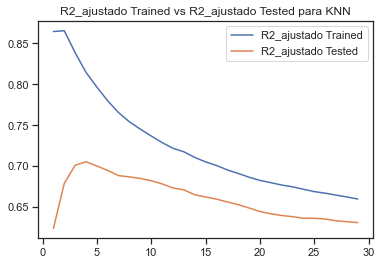

In [259]:
plt.plot(range(1,30, 1), R2_ajustado_train, label='R2_ajustado Trained')
plt.plot(range(1,30, 1), R2_ajustado_test, label='R2_ajustado Tested')
plt.ylim()
plt.legend(loc="best")
plt.title("R2_ajustado Trained vs R2_ajustado Tested para KNN")
plt.show()


**Hago un zoom para determinar mejor el mejor hiperparámetro.**

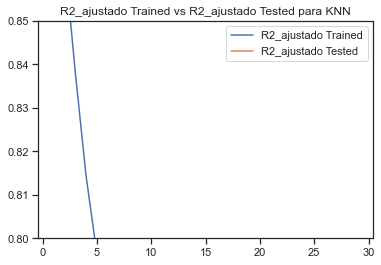

In [260]:
plt.plot(range(1,30, 1), R2_ajustado_train, label='R2_ajustado Trained')
plt.plot(range(1,30, 1), R2_ajustado_test, label='R2_ajustado Tested')
plt.ylim((0.80,0.85))
plt.legend(loc="best")
plt.title("R2_ajustado Trained vs R2_ajustado Tested para KNN")
plt.show()

**Selección de hiperparámetro para KNN por regresión:** Se observa en el gráfico para un **número de vecinos igual a 5** se máximiza el valor de R2 ajustado y se reduce las diferencias entre el grupo entrenado y testeado, minimizando un sobre- o sub- ajuste. De todas maneras, al igual que con el modelo de árbol de decisión voy a comparar estos resultados con la evaluación de hiperparmátro en función del RMSE. 

**Voy analizar el cambio en el RMSE a medida que aumento el número de vecinos, tanto en training como en testing.**

In [261]:
def Carga_RMSE_train():
        # Initialize 
    rmses_train = []
    for i in range(1,30, 1):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train,y_train)
        y_pred_train = knn.predict(X_train)
        rmses= np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
        rmses_train.append(rmses)
    return rmses_train

rmses_train=Carga_RMSE_train()
rmses_train

[80945.30500161945,
 80654.4032270385,
 88327.61028918714,
 94673.23158893026,
 99165.34253655438,
 103176.22395455775,
 106497.88773158578,
 109019.90770826604,
 110966.42399463043,
 112771.62258671025,
 114480.78140709798,
 115932.63440910207,
 116828.842518118,
 118237.40866214327,
 119349.72112412486,
 120242.96252988186,
 121313.18159344594,
 122179.37750559089,
 123078.7003873801,
 123842.1820307727,
 124382.4713871006,
 124940.83986979078,
 125361.85944760643,
 125930.45553871595,
 126482.21926639942,
 126850.36180678668,
 127292.54611592981,
 127727.35327107499,
 128204.53596833361]

In [262]:
def Carga_RMSE_test():
        # Initialize 
    rmses_test = []
    for i in range(1,30, 1):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train,y_train)
        y_pred_test = knn.predict(X_test)
        rmses= np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
        rmses_test.append(rmses)
    return rmses_test

rmses_test=Carga_RMSE_test()
rmses_test

[136521.5990397614,
 126120.5540875268,
 121729.91552175321,
 120840.91658193477,
 121907.85685141635,
 123013.4066640587,
 124267.75223373284,
 124581.05106064916,
 124956.05300293802,
 125511.20049009302,
 126261.59717393035,
 127249.19810827007,
 127690.51471631105,
 128850.72380971182,
 129361.21665450821,
 129868.01514465682,
 130516.43375364081,
 131152.07990121562,
 131919.93785452945,
 132723.8331331847,
 133246.99829420578,
 133616.01959471108,
 133894.39702650387,
 134256.15199669992,
 134255.3284583718,
 134425.1045362007,
 134819.22976244742,
 135026.05882502426,
 135224.56267050968]

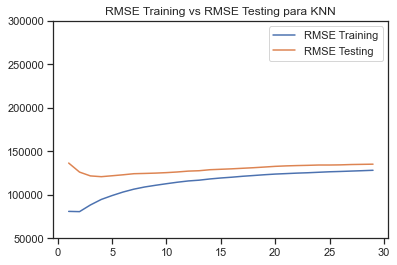

In [263]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((50000, 300000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Conclusiones:** En este último gráfico se puede ver que el hiperparámetro seleccionado para este modelo utilizando la mética R2 ajustado es el correcto, ya que para este valor se reduce la diferencia entre el grupo entrenado y testeado y se obtiene una buena performance para el modelo. 

**Una vez determinado cuales son las mejores  variables predictoras y los mejores hiperparámetros (no para árbol de decisión, ver más abajo) voy a evaluar la performance del modelo con el siguiente análisis:**

### **PREDICHOS vs REALES e HISTOGRAMAS DE RESIDUOS**

**Histogramas de residuos**

Los residuos en un modelo estadístico o de aprendizaje automático son las diferencias entre los valores de datos observados y predichos.
Una de las suposiciones en la regresión lineal es que el residuo debe estar distribuido normalmente, si el residuo de un modelo no está distribuido normalmente, no tendrá una curva en forma de campana, lo que indica que el modelo está sesgado y, en este caso, la regresión de su conjunto de datos puede no ser una elección adecuada.

**Gráfico de de valores predichos vs reales.**

A partir de diagramas de dispersión de los valores de salida o outputs los valores predichos (y_pred) vs los reales (y), se puede saber qué tan bien está funcionando el modelo. Para el modelo ideal, los puntos deben estar más cerca de la línea diagonal.

**A modo de benchmark voy a comparar con un modelo de regresión lineal.** 

In [264]:
X = filtro_9.drop(['price'], axis=1)
y = filtro_9['price']

# Realizo la separación
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [265]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=12, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [266]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

Modelo: Regresión lineal
R2 ajustado en Trained: 0.5778782113512708
R2 ajustado en Tested: 0.5807384479943178


C:\Users\Gabriel\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gabriel\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


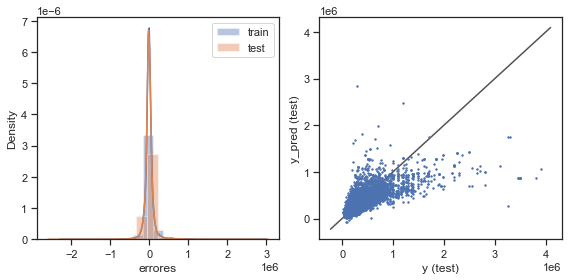

Modelo: Árbol de Decisión
R2 ajustado en Trained: 0.8425568165727721
R2 ajustado en Tested: 0.7303170717205096


C:\Users\Gabriel\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gabriel\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


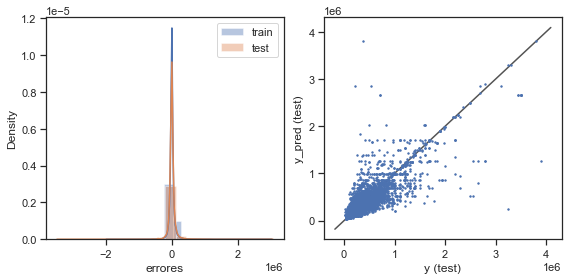

Modelo: Vecinos más cercanos
R2 ajustado en Trained: 0.7963911466837672
R2 ajustado en Tested: 0.7000133876450998


C:\Users\Gabriel\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gabriel\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


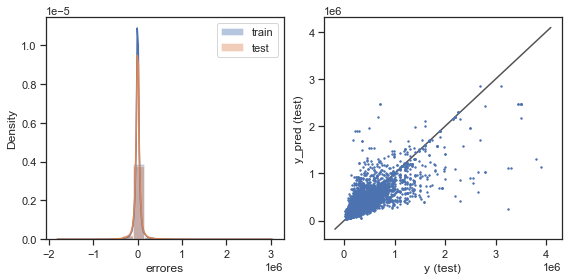

In [267]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    R2_ajustado_train = 1-(1-model.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    R2_ajustado_test = 1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print(f'R2 ajustado en Trained: {R2_ajustado_train}')
    print(f'R2 ajustado en Tested: {R2_ajustado_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**Conclusiones del análisis del gráfico de Reales vs Predichos e Histogramas de residuos:** 

De los gráficos de histogramas vemos que los errores tienen distribución normal y están centrados en cero. Podemos concluir que los modelos de regresión evaluados no tienen sesgo en predicción de valores. 

Comparando la performance de los 3 modelos análizados, el mejor desempeño lo tienen el de árbol de decisión, si comparamos los gráficos de datos Predichos vs Reales, se puede observar una mayor concentración de datos sobre la recta, sobre todo en el rango de precios que van de 500 mil a 2 millones de dolares. Sin embargo, **si analizamos la diferencia en el valor del R2 ajustado para el grupo de datos entrenado y testeado vemos que el modelo de árbol genera un sobre ajuste.** 

Por último, se observa que la mayoría de los datos se concentra en el rango de precios entre 33 mil (ver limite inferior impuesto por filtrado) y 1 millón de dolares, en consecuencia para precios fuera de ese rango es probable que el modelo no prediga bien. 

**CONCLUSIONES GENERALES SOBRE LOS MODELOS DE BENCHMARK:** 

Del análisis de los modelos de benchmark definí lo siguiente:

Variables predictoras para modelo de predicción: **'rooms', 'bathrooms', 'bedrooms', 'surface_covered' y 'surface_total'**

Hiperparámetros

**DecisionTreeRegressor: max_depth=12**

**KNN: n_neighbors=5**

**Precios: hasta 2 millones de dolares**

En ambos modelos de benchmark se observa una mejora significativa de su performance, utilizando todas las variables predictoras, respecto a la performance obtenida con la mejor variable predictora (obtenida en del análisis exploratorio de datos). 

EL modelo de DecisionTreeRegressor generar mayor sobreajuste que el modeo KNN. 

Estos modelos tienen tienen un mejor desempeño que el modelo de regresión lineal (tener en cuenta que no se ajustaron los hiperparámetros para este modelo). 



## **EVALUACIÓN DE MODELOS DE REGRESIÓN**

## **Regresión lineal**

A modo de benchmark voy a incorporar al análisis del modelo de regresión lineal para comparar su performance con los otros dos modelos solicitados en el proyecto. 

**R2 ajustado** 

In [268]:
from sklearn.linear_model import LinearRegression
import pandas as pd

#fit regression model
Lineal_regr = LinearRegression()
X, y = filtro_9.drop(['price'], axis=1),filtro_9['price']
Lineal_regr.fit(X, y)

#display adjusted R-squared
1 - (1-Lineal_regr.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.5788723870950843

## **Árbol de decisión**

**R2 ajustado**

In [269]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

#fit regression model
tree_regres = DecisionTreeRegressor(max_depth=12)
X, y = filtro_9.drop(['price'], axis=1), filtro_9['price']
tree_regres.fit(X, y)

#display adjusted R-squared
1 - (1-tree_regres.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8451376070184324

## **Vecinos más cercanos**

**R2 ajustado**

In [270]:
from sklearn.neighbors import KNeighborsRegressor
#fit regression model
knn_regres = KNeighborsRegressor(n_neighbors=5)
X, y = filtro_9.drop(['price'], axis=1), filtro_9['price']
knn_regres.fit(X, y)

#display adjusted R-squared
1 - (1-knn_regres.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8094108485920289

### **TEST DE PREDICCIÓN DE LOS MODELOS**

**Voy a predecir el precio de las tres primeras propiedades que aparecen en el dataframe.** Notar que la instancia 0 tiene el doble de superficie cubierta que la instancia 1 y casi 3 veces la superficie de la instancia 2, sin embargo el precio es similar. Sin dudas hay un error o por algún motivo está subvaluada. 

In [271]:
filtro_9.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
6,2.0,1.0,1.0,70.0,70.0,159500.0


**Voy a constatar la observación hecha sobre la instancia cero del dataframe**

In [272]:
# Selección de instancias basadas en una condición
sup140 = filtro_9[(filtro_9['surface_covered'] >= 140.0) & (filtro_9['surface_covered'] <= 140.0) & (filtro_9['surface_total'] >= 140.0) & (filtro_9['surface_total'] <= 140.0)]  
sup140.head(40)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1943,5.0,4.0,2.0,140.0,140.0,279000.0
2882,5.0,4.0,2.0,140.0,140.0,249000.0
2926,5.0,4.0,2.0,140.0,140.0,490000.0
3145,4.0,3.0,1.0,140.0,140.0,200000.0
3662,5.0,4.0,2.0,140.0,140.0,279000.0
4563,5.0,3.0,3.0,140.0,140.0,410000.0
6121,4.0,3.0,1.0,140.0,140.0,219000.0
8047,4.0,3.0,1.0,140.0,140.0,140000.0
9223,5.0,4.0,2.0,140.0,140.0,249000.0
12116,3.0,2.0,3.0,140.0,140.0,770000.0


In [273]:
sup140.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,92.000000,92.000000,92.000000,92.0,92.0,92.000000
mean,4.239130,3.184783,1.967391,140.0,140.0,319365.217391
std,0.918307,0.783474,0.582739,0.0,0.0,156294.930022
min,2.000000,1.000000,1.000000,140.0,140.0,95000.000000
25%,4.000000,3.000000,2.000000,140.0,140.0,238250.000000
50%,4.000000,3.000000,2.000000,140.0,140.0,249000.000000
75%,5.000000,4.000000,2.000000,140.0,140.0,390000.000000
max,6.000000,4.000000,3.000000,140.0,140.0,890000.000000


Como podemos ver el 75% de las propiedades con una superficie total y cubierta de 140 mtrs2 tiene un precio de **390 mil dolares** y el **promedio da un precio de aprox. 319 mil dolares confirmando la sospecha de que el precio de la instancia cero está subvaluado**. A continuación voy a realizar el mismo análisis para las propiedades de las instancia s 1 y 2** 

**Propiedad de 58 mtrs2 cubiertos y 70 mtrs2 totales**

In [274]:
# Selección de instancias basadas en una condición 
sup58 = filtro_9[(filtro_9['surface_covered'] >= 58.0) & (filtro_9['surface_covered'] <= 58.0) & (filtro_9['surface_total'] >= 70.0) & (filtro_9['surface_total'] <= 70.0)]  
sup58.head(20)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,2.0,1.0,2.0,70.0,58.0,159000.0
6391,3.0,2.0,1.0,70.0,58.0,199000.0
8860,2.0,1.0,2.0,70.0,58.0,185000.0
8861,2.0,1.0,2.0,70.0,58.0,175000.0
12937,3.0,2.0,1.0,70.0,58.0,263200.0
12943,3.0,2.0,1.0,70.0,58.0,241000.0
12944,3.0,2.0,1.0,70.0,58.0,250600.0
13597,2.0,1.0,2.0,70.0,58.0,157000.0
17774,3.0,2.0,2.0,70.0,58.0,173000.0
17775,3.0,2.0,2.0,70.0,58.0,185000.0


In [275]:
sup58.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,42.000000,42.000000,42.000000,42.0,42.0,42.000000
mean,2.785714,1.761905,1.547619,70.0,58.0,180837.142857
std,0.415300,0.431081,0.503761,0.0,0.0,34381.077984
min,2.000000,1.000000,1.000000,70.0,58.0,110000.000000
25%,3.000000,2.000000,1.000000,70.0,58.0,159000.000000
50%,3.000000,2.000000,2.000000,70.0,58.0,185000.000000
75%,3.000000,2.000000,2.000000,70.0,58.0,185000.000000
max,3.000000,2.000000,2.000000,70.0,58.0,263200.000000


Como podemos ver el 75% de las propiedades con una superficie total de 70 mtrs2 y cubierta de 58 mtrs2 tiene un precio de **185 mil dolares** y el **promedio da un precio de aprox. 181 mil dolares**.

**Propiedad de 45 mtrs2 cubiertos y totales**

In [276]:
# Selección de instancias basadas en una condición
sup45 = filtro_9[(filtro_9['surface_covered'] >= 45.0) & (filtro_9['surface_covered'] <= 45.0) & (filtro_9['surface_total'] >= 45.0) & (filtro_9['surface_total'] <= 45.0)]  
sup45.head(20)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
2,2.0,1.0,1.0,45.0,45.0,125000.0
22,2.0,1.0,1.0,45.0,45.0,95000.0
23,2.0,1.0,1.0,45.0,45.0,95000.0
79,2.0,1.0,1.0,45.0,45.0,95000.0
124,2.0,1.0,1.0,45.0,45.0,95000.0
565,2.0,1.0,1.0,45.0,45.0,95000.0
569,2.0,1.0,1.0,45.0,45.0,95000.0
571,2.0,1.0,1.0,45.0,45.0,95000.0
684,2.0,1.0,1.0,45.0,45.0,110000.0
717,2.0,1.0,1.0,45.0,45.0,195000.0


In [277]:
sup45.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,412.000000,412.000000,412.000000,412.0,412.0,412.000000
mean,2.150485,1.220874,1.033981,45.0,45.0,119651.657767
std,0.518912,0.426895,0.181399,0.0,0.0,36322.128389
min,1.000000,1.000000,1.000000,45.0,45.0,48000.000000
25%,2.000000,1.000000,1.000000,45.0,45.0,95000.000000
50%,2.000000,1.000000,1.000000,45.0,45.0,115000.000000
75%,2.000000,1.000000,1.000000,45.0,45.0,135225.000000
max,4.000000,3.000000,2.000000,45.0,45.0,265000.000000


Como podemos ver el 75% de las propiedades con una superficie total y cubierta de 45 mtrs2 tiene un precio de **136 mil dolares** y el **promedio da un precio de aprox. 120 mil dolares**.

**Genero arreglos con las caracteristicas de las instancias 0 (prueba1), 1  (prueba2) y 2 (prueba3)**

In [278]:
prueba1 = np.array([5.0,4.0,2.0,140,140]).reshape(1,-1)

In [279]:
prueba2 = np.array([2.0,1.0,2.0,70,58]).reshape(1,-1)

In [280]:
prueba3 = np.array([2.0,1.0,1.0, 45,45]).reshape(1,-1)

### **Prueba del modelo DecisionTreeRegressor**

**PRUEBA 1**

In [281]:
print(tree_regres.predict(prueba1))

[272836.9047619]


Precio en el dataset para esta propiedad con estas características= USD **279,000**

 75% de las propiedes del dataset= USD **390,000** 
 
 Promedio del dataset= USD **319,000**.

**PRUEBA 2**

In [282]:
print(tree_regres.predict(prueba2))

[218749.52380952]


Precio en el dataset para esta propiedad con estas características= USD **159,000**

 75% de las propiedes del dataset= USD **185,000** 
 
 Promedio del dataset= USD **180,000**.

**PRUEBA 3**

In [283]:
print(tree_regres.predict(prueba3))

[120378.67857143]


Precio en el dataset para esta propiedad con estas características= USD **125,000**

 75% de las propiedes del dataset= USD **136,000** 
 
 Promedio del dataset= USD **120,000**.

**Conclusión:** El modelo predice muy bien los precios. En ninguno de los casos predice exactamente el precio de la propiedad con las caracteristicas cargadas, esto indica que no hay sobreajuste a los datos del dataset, sin embargo, la predicción se acerca al precio real de esa propiedad o al precio promedio para propiedades con esa superficie cubierta. 

### **Prueba del modelo KNeighborsRegressor**

En el caso de este modelo también evalué como el número de vecinos afectaba a la predicción y concluí que el hiperparámetro seleccionado anteriormente era el mejor para predecir precios. 

**PRUEBA 1**

In [284]:
print(knn_regres.predict(prueba1))

[303200.]


Precio en el dataset para esta propiedad con estas características= USD **279,000**

 75% de las propiedes del dataset= USD **390,000** 
 
 Promedio del dataset= USD **319,000**.

**PRUEBA 2**

In [285]:
print(knn_regres.predict(prueba2))

[171440.]


Precio en el dataset para esta propiedad con estas características= USD **159,000**

 75% de las propiedes del dataset= USD **185,000** 
 
 Promedio del dataset= USD **180,000**.

**PRUEBA 3**

In [286]:
print(knn_regres.predict(prueba3))

[134700.]


Precio en el dataset para esta propiedad con estas características= USD **125,000**

 75% de las propiedes del dataset= USD **136,000** 
 
 Promedio del dataset= USD **120,000**.

**Conclusión:** Este modelo predice bastante bien los precios. Predice mejor el precio para la prueba 2 pero peor para las pruebas 1 y 3 comparado con el modelo de árbol. 

### **Prueba del modelo LinearRegression**

**PRUEBA 1**

In [287]:
print(Lineal_regr.predict(prueba1))

[382335.57422148]


Precio en el dataset para esta propiedad con estas características= USD **279,000**

 75% de las propiedes del dataset= USD **390,000** 
 
 Promedio del dataset= USD **319,000**.

**PRUEBA 2**

In [288]:
print(Lineal_regr.predict(prueba2))

[267956.0562568]


Precio en el dataset para esta propiedad con estas características= USD **159,000**

 75% de las propiedes del dataset= USD **185,000** 
 
 Promedio del dataset= USD **180,000**.

**PRUEBA 3**

In [289]:
print(Lineal_regr.predict(prueba3))

[149346.45064085]


Precio en el dataset para esta propiedad con estas características= USD **125,000**

 75% de las propiedes del dataset= USD **136,000** 
 
 Promedio del dataset= USD **120,000**.

**Conclusión:** Este modelo ya predice bastante mal los precios. Predice mejor el precio para la prueba 1 acercandose al  75% de las propiedes del dataset pero para las pruebas 2 y 3 se aleja mucho del precio real y de los estadísticos. 

### **RESUMEN DE RESULTADOS**

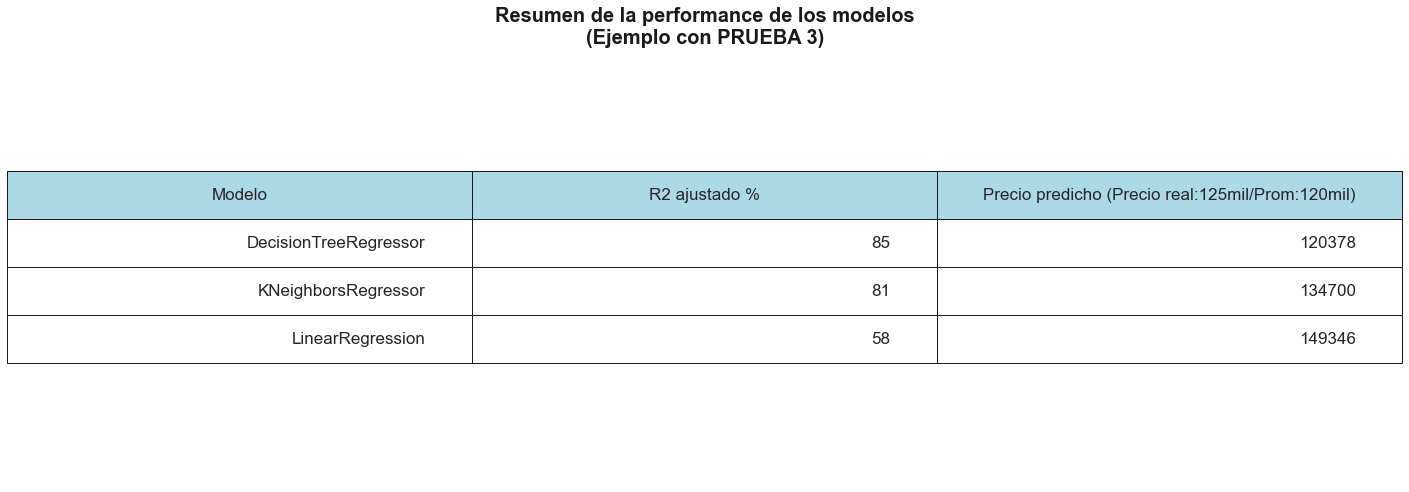

In [290]:
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(25,8))

data=[['DecisionTreeRegressor', 85, 120378],
      ['KNeighborsRegressor', 81, 134700],
      ['LinearRegression', 58, 149346]]
column_labels=['Modelo', 'R2 ajustado %','Precio predicho (Precio real:125mil/Prom:120mil)']
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values,
        colLabels=df.columns,       
        colColours =["lightblue"] * 3,
        loc="center")

table.scale(1, 4)
table.set_fontsize(20)
ax.axis('off')
title = "Resumen de la performance de los modelos"
subtitle = "Ejemplo con PRUEBA 3"
ax.set_title(f'{title}\n({subtitle})', weight='bold', size=20, color='k')

plt.savefig("demo_table.png", dpi=200, bbox_inches='tight')
plt.show()

### **CONCLUSIONES FINALES**

Como se puede ver en la tabla de resultados **la mejor performance es para el modelo DecisionTreeRegressor** con las variables predictoras 'rooms','bathrooms', 'bedrooms', 'surface_covered' y 'surface_total', con el hiperparámetro max_depth=12 y para precios entre 33 mil y 2 millones de dolares con una superficie entre 13 y 1000 mtrs2. El hiperparámetro seleccionado es igual seleccionado para modelos de clasificación en la sección de análisis exploratorio (12) modelo de benchmark.   

El modelo KNeighborsRegressor con un hiperparámetro de n_neighbors=5 aproxima bastante bien aunque tiene una performance más baja. 

**Finalmente puedo concluir que el mejor modelo para predecir es el DecisionTreeRegressor**

Por último, voy a refleccionar sobre estas preguntas ¿Qué información no estás usando que podría ayudar al modelo?:

Pordría incorporar como variable el tipo de propiedad para predecir el precio de una propiedad X. Para esto debería pasar esta variable catagórica a numérica.

Otras variables que aportarían información útil al modelo serían Latitud y Longitud, ya que, el precio está directamente relacionado a la ubicación de la propiedad. 

¿Qué información puede estar demás o repetida?:

De las correlaciones observadas en los mapas de calor podemos deducir que las variables Rooms/bedrooms y surface_total/surface_covered aportan información redundante. En la mayoría de lo casos con una correlación superior al 80% y para algunos tipos de propiedades superior al 90%.  

